#Import Library

In [ ]:
!pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from PIL import Image, ImageDraw, ImageFont
from skimage import img_as_ubyte
import numpy as np

In [ ]:
import cv2
import keras
import json
import tensorflow as tf 
from keras.layers import Input
from keras import Sequential
from keras.layers import Dense, LSTM,Flatten, TimeDistributed, Conv2D, Dropout
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16

In [ ]:
pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.15.1
astropy                       5.2.2
astunparse                    1.6.3
attrs                         22.2.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
beautifulsoup4                4.11.2
bleach                        6.0.0
blis                          0.7.9
blosc2                        2.0.0
bokeh                         2.4.3
branca                        0.6.0
CacheControl                  0.12.11
cached-property               1.5.2
cachetools                    5.3.0
cata

In [ ]:
import random
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import xgboost 

from numpy.core import multiarray
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.models import load_model

from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.layers import BatchNormalization, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.2)
from keras.layers import PReLU
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from copy import copy


from numpy import hstack
from numpy import array
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers.convolutional import Conv1D
from tensorflow.keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling1D

from scipy import stats
from scipy.stats import spearmanr

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

torch.backends.cudnn.enabled = False
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

from PIL import Image, ImageDraw, ImageFont
from skimage import img_as_ubyte

import copy
import time

%load_ext autoreload
%autoreload 2
%matplotlib inline
warnings.filterwarnings("ignore")
%config InlineBackend.figure_format = 'retina'

#Import Data from Kaggle

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download cdminix/us-drought-meteorological-data

100% 899M/901M [00:07<00:00, 117MB/s]
100% 901M/901M [00:07<00:00, 119MB/s]


In [ ]:
!unzip us-drought-meteorological-data.zip

Archive:  us-drought-meteorological-data.zip
  inflating: soil_data.csv           
  inflating: test_timeseries/test_timeseries.csv  
  inflating: train_timeseries/train_timeseries.csv  
  inflating: validation_timeseries/validation_timeseries.csv  


In [ ]:
#train = pd.read_csv('/content/train_timeseries/train_timeseries.csv')
#soil = pd.read_csv('/content/soil_data.csv')
validation = pd.read_csv('/content/validation_timeseries/validation_timeseries.csv')
test = pd.read_csv('/content/test_timeseries/test_timeseries.csv')
pd.set_option('display.max_columns', None)

#Choosing 9 regions of the United States Based on 9 Climate Regions in the United States

There are 9 climate regions in the United States:
1. Northeast
2. Upper Midwest
3. Ohio Valley
4. Southeast
5. Northern Rockies and Plains
6. South
7. Southwest
8. Northwest
9. West

Then, we will choose 1 state from each of the climate regions, there are:
1. New York County, New York (36061), dari Northeast 
2. Dakota County, Minnesota (27037), dari Upper Midwest
3. Jasper County, Missouri (29097), dari Ohio Valley
4. St. Lucie County, Florida (12111), dari Southeast
5. Holt County, Nebraska (31089), dari Northern Rockies and Plains
6. Clark County, Kansas (20025), dari South
7. Coconino County, Arizona (04005), dari Southwest
8. Crook County, Oregon (41013), dari Northwest
9. Los Angeles County, California (06037), dari West

Each notebook contains 3 different states for different models(MLP-and-LSTM and CNN-LSTM)

##New York, New York

###train

In [ ]:
new_york = train[train['fips']==36031]

#using interpolation to fill in the NaN values
new_york = new_york.interpolate().fillna(method='bfill')
new_york.score[new_york.score <0.5] = 0
new_york.score[(new_york.score >=0.5)&(new_york.score<1.5)] = 1
new_york.score[(new_york.score >=1.5)&(new_york.score<2.5)] = 2
new_york.score[(new_york.score >=2.5)&(new_york.score<3.5)] = 3
new_york.score[(new_york.score >=3.5)&(new_york.score<4.5)] = 4
new_yor.score[(new_york.score >=4.5)&(new_york.score<5.5)] = 5
new_york

###validation

In [ ]:
ny_val = validation[validation['fips']==36031]

#using interpolation to fill in the NaN values
ny_val = ny_val.interpolate().fillna(method='bfill')
ny_val.score[ny_val.score <0.5] = 0
ny_val.score[(ny_val.score >=0.5)&(ny_val.score<1.5)] = 1
ny_val.score[(ny_val.score >=1.5)&(ny_val.score<2.5)] = 2
ny_val.score[(ny_val.score >=2.5)&(ny_val.score<3.5)] = 3
ny_val.score[(ny_val.score >=3.5)&(ny_val.score<4.5)] = 4
ny_val.score[(ny_val.score >=4.5)&(ny_val.score<5.5)] = 5

ny_val['date'] = pd.to_datetime(ny_val['date'], format='%Y.%m.%d')
ny_val['tahun'] = ny_val['date'].dt.year
ny_val['bulan'] = ny_val['date'].dt.month
ny_val['tanggal'] = ny_val['date'].dt.day
ny_val

fips       date  PRECTOT     PS  QV2M   T2M  T2MDEW  T2MWET  \
1320570  36031 2017-01-01     0.29  96.65  2.62 -3.77   -5.50   -5.47   
1320571  36031 2017-01-02     0.01  97.81  2.42 -4.65   -6.22   -6.20   
1320572  36031 2017-01-03     9.28  96.26  3.49 -1.07   -1.75   -1.75   
1320573  36031 2017-01-04     3.27  94.45  3.15 -2.37   -3.63   -3.61   
1320574  36031 2017-01-05     0.51  95.47  1.76 -7.95  -10.14  -10.06   
...        ...        ...      ...    ...   ...   ...     ...     ...   
1321295  36031 2018-12-27     0.12  98.18  1.37 -9.87  -13.51  -12.56   
1321296  36031 2018-12-28    10.76  96.19  4.13  0.51    0.51    0.10   
1321297  36031 2018-12-29     0.76  96.32  2.76 -3.32   -4.87   -5.90   
1321298  36031 2018-12-30     0.37  96.93  1.81 -7.62  -10.24   -9.99   
1321299  36031 2018-12-31     7.38  96.85  3.08 -2.79   -3.34   -3.40   

         T2M_MAX  T2M_MIN  T2M_RANGE     TS  WS10M  WS10M_MAX  WS10M_MIN  \
1320570    -0.52    -8.19       7.67  -4.54   3.34       4.53       1.85   
1320571     1.18    -8.24       9.43  -5.32   2.03       2.75       1.12   
1320572     0.50    -4.02       4.52  -1.22   3.14       4.40       1.42   
1320573     1.38    -8.07       9.45  -2.67   3.78       6.35       0.39   
1320574    -6.70    -8.83       2.13  -8.15   4.37       5.85       2.58   
...          ...      ...        ...    ...    ...        ...        ...   
1321295    -5.72   -14.87       9.15 -10.44   1.82       3.29       0.34   
1321296     3.53    -7.12      10.65   0.32   4.17       6.19       2.60   
1321297     4.28   -12.05      16.33  -3.51   4.20       5.50       1.67   
1321298    -3.32   -12.54       9.22  -8.12   1.57       2.26       0.47   
1321299     0.43    -6.47       6.90  -3.01   2.64       4.71       1.73   

         WS10M_RANGE  WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE  score  tahun  \
1320570         2.67   6.25       8.52       3.54         4.98    2.0   2017   
1320571         1.63   4.06       6.12       1.63         4.49    2.0   2017   
1320572         2.98   5.62       7.27       3.08         4.19    2.0   2017   
1320573         5.96   6.81      10.79       0.72        10.06    2.0   2017   
1320574         3.27   7.83      10.44       4.81         5.63    2.0   2017   
...              ...    ...        ...        ...          ...    ...    ...   
1321295         2.94   3.15       5.36       0.39         4.97    0.0   2018   
1321296         3.59   7.67      10.24       5.75         4.48    0.0   2018   
1321297         3.83   7.14      10.02       2.84         7.18    0.0   2018   
1321298         1.79   2.92       4.84       0.74         4.10    0.0   2018   
1321299         2.98   4.75       7.71       3.52         4.19    0.0   2018   

         bulan  tanggal  
1320570      1        1  
1320571      1        2  
1320572      1        3  
1320573      1        4  
1320574      1        5  
...        ...      ...  
1321295     12       27  
1321296     12       28  
1321297     12       29  
1321298     12       30  
1321299     12       31  

[730 rows x 24 columns]

In [ ]:
ny_val['score'].value_counts()

0.0    474
2.0    139
1.0    117
Name: score, dtype: int64

In [ ]:
ny_val = ny_val.round(4)

In [ ]:
X = ny_val[['PRECTOT', 'PS','QV2M','T2M','T2MDEW','T2MWET', 'T2M_MAX', 'T2M_MIN','T2M_RANGE','TS',
        'WS10M','WS10M_MAX','WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 
        'WS50M_RANGE']]
y = ny_val['score']

###test

In [ ]:
ny_test = test[test['fips']==36031]

#using interpolation to fill in the NaN values
ny_test = ny_test.interpolate().fillna(method='bfill')
ny_test.score[ny_test.score <0.5] = 0
ny_test.score[(ny_test.score >=0.5)&(ny_test.score<1.5)] = 1
ny_test.score[(ny_test.score >=1.5)&(ny_test.score<2.5)] = 2
ny_test.score[(ny_test.score >=2.5)&(ny_test.score<3.5)] = 3
ny_test.score[(ny_test.score >=3.5)&(ny_test.score<4.5)] = 4
ny_test.score[(ny_test.score >=4.5)&(ny_test.score<5.5)] = 5

ny_test['date'] = pd.to_datetime(ny_test['date'], format='%Y.%m.%d')
ny_test['tahun'] = ny_test['date'].dt.year
ny_test['bulan'] = ny_test['date'].dt.month
ny_test['tanggal'] = ny_test['date'].dt.day
ny_test[0:31]
ny_test.head()

fips       date  PRECTOT     PS  QV2M    T2M  T2MDEW  T2MWET  \
1322379  36031 2019-01-01     4.15  95.77  2.93  -3.41   -4.19   -5.11   
1322380  36031 2019-01-02     0.50  97.14  1.24 -10.16  -14.88  -13.75   
1322381  36031 2019-01-03     3.48  96.00  2.54  -4.65   -6.00   -5.80   
1322382  36031 2019-01-04     0.31  95.75  3.21  -2.06   -2.95   -2.94   
1322383  36031 2019-01-05     0.34  95.33  3.47  -1.30   -1.95   -1.95   

         T2M_MAX  T2M_MIN  T2M_RANGE     TS  WS10M  WS10M_MAX  WS10M_MIN  \
1322379     3.55   -14.11      17.66  -3.65   5.04       6.69       2.45   
1322380    -4.66   -14.93      10.28 -10.84   1.59       2.73       0.63   
1322381    -1.71    -7.60       5.89  -4.88   2.50       3.27       1.58   
1322382     2.22    -4.62       6.85  -2.29   2.86       3.96       2.01   
1322383     2.87    -4.12       6.99  -1.92   1.65       2.71       0.53   

         WS10M_RANGE  WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE  score  tahun  \
1322379         4.24   8.31      11.10       3.87         7.23    0.0   2019   
1322380         2.10   2.77       4.78       1.13         3.65    0.0   2019   
1322381         1.69   4.70       5.53       3.85         1.68    0.0   2019   
1322382         1.95   5.46       6.90       3.73         3.17    0.0   2019   
1322383         2.18   3.13       5.26       0.85         4.41    0.0   2019   

         bulan  tanggal  
1322379      1        1  
1322380      1        2  
1322381      1        3  
1322382      1        4  
1322383      1        5

In [ ]:
ny_test = ny_test.round(4)
ny_test

fips       date  PRECTOT     PS  QV2M    T2M  T2MDEW  T2MWET  \
1322379  36031 2019-01-01     4.15  95.77  2.93  -3.41   -4.19   -5.11   
1322380  36031 2019-01-02     0.50  97.14  1.24 -10.16  -14.88  -13.75   
1322381  36031 2019-01-03     3.48  96.00  2.54  -4.65   -6.00   -5.80   
1322382  36031 2019-01-04     0.31  95.75  3.21  -2.06   -2.95   -2.94   
1322383  36031 2019-01-05     0.34  95.33  3.47  -1.30   -1.95   -1.95   
...        ...        ...      ...    ...   ...    ...     ...     ...   
1323105  36031 2020-12-27     0.26  96.84  2.17  -4.71   -7.91   -6.31   
1323106  36031 2020-12-28     1.63  96.37  3.13  -1.33   -3.18   -2.25   
1323107  36031 2020-12-29     0.09  97.47  1.47  -8.90  -12.76  -10.83   
1323108  36031 2020-12-30     1.45  96.87  2.08  -6.22   -8.50   -7.36   
1323109  36031 2020-12-31     0.65  96.65  2.93  -2.06   -4.03   -3.04   

         T2M_MAX  T2M_MIN  T2M_RANGE     TS  WS10M  WS10M_MAX  WS10M_MIN  \
1322379     3.55   -14.11      17.66  -3.65   5.04       6.69       2.45   
1322380    -4.66   -14.93      10.28 -10.84   1.59       2.73       0.63   
1322381    -1.71    -7.60       5.89  -4.88   2.50       3.27       1.58   
1322382     2.22    -4.62       6.85  -2.29   2.86       3.96       2.01   
1322383     2.87    -4.12       6.99  -1.92   1.65       2.71       0.53   
...          ...      ...        ...    ...    ...        ...        ...   
1323105    -1.91    -7.01       5.10  -4.83   2.23       3.15       0.73   
1323106     2.74    -4.17       6.91  -1.52   4.67       5.94       2.95   
1323107    -2.74   -13.26      10.52  -9.30   3.42       4.57       2.11   
1323108    -0.59   -13.13      12.55  -6.62   3.60       5.66       1.47   
1323109     0.62    -7.53       8.15  -2.42   3.54       4.73       1.69   

         WS10M_RANGE  WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE  score  tahun  \
1322379         4.24   8.31      11.10       3.87         7.23    0.0   2019   
1322380         2.10   2.77       4.78       1.13         3.65    0.0   2019   
1322381         1.69   4.70       5.53       3.85         1.68    0.0   2019   
1322382         1.95   5.46       6.90       3.73         3.17    0.0   2019   
1322383         2.18   3.13       5.26       0.85         4.41    0.0   2019   
...              ...    ...        ...        ...          ...    ...    ...   
1323105         2.42   4.07       5.30       1.76         3.54    1.0   2020   
1323106         2.99   8.14       9.76       5.73         4.03    1.0   2020   
1323107         2.45   5.99       7.45       4.20         3.25    1.0   2020   
1323108         4.19   6.15       9.46       3.03         6.43    1.0   2020   
1323109         3.04   6.68       8.56       3.37         5.19    1.0   2020   

         bulan  tanggal  
1322379      1        1  
1322380      1        2  
1322381      1        3  
1322382      1        4  
1322383      1        5  
...        ...      ...  
1323105     12       27  
1323106     12       28  
1323107     12       29  
1323108     12       30  
1323109     12       31  

[731 rows x 24 columns]

In [ ]:
ny_test['score'].value_counts()

0.0    515
1.0    208
2.0      8
Name: score, dtype: int64

In [ ]:
X_test = ny_test[['PRECTOT', 'PS','QV2M','T2M','T2MDEW','T2MWET', 'T2M_MAX', 'T2M_MIN','T2M_RANGE','TS',
        'WS10M','WS10M_MAX','WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 
        'WS50M_RANGE']]
y_test = ny_test['score']

In [ ]:
X = np.array(X)
X_test = np.array(X_test)

In [ ]:
y = np.array(y)
y_test = np.array(y_test)

###Xgboost feature importance


In [ ]:
X_train = new_york[['PRECTOT', 'PS','QV2M','T2M','T2MDEW','T2MWET', 'T2M_MAX', 'T2M_MIN','T2M_RANGE','TS',
        'WS10M','WS10M_MAX','WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 
        'WS50M_RANGE']]
y_train = new_york['score']

In [ ]:
X_val = ny_val[['PRECTOT', 'PS','QV2M','T2M','T2MDEW','T2MWET', 'T2M_MAX', 'T2M_MIN','T2M_RANGE','TS',
        'WS10M','WS10M_MAX','WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 
        'WS50M_RANGE']]
y_val = ny_val['score']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [ ]:
model = xgboost.XGBRegressor()
model.fit(X_train_scaled,y_train)

In [ ]:
predicted_y = model.predict(X_val_scaled)

In [ ]:
predicted_y_train = model.predict(X_train_scaled)

In [ ]:
print(metrics.r2_score(y_val, predicted_y))
print(metrics.mean_squared_error(y_train,predicted_y_train))
print(metrics.mean_squared_error(y_val, predicted_y))

In [ ]:
model.get_booster().get_score(importance_type='gain')

In [ ]:
import pandas as pd
f_importance = model.get_booster().get_score(importance_type='gain')

importance_df = pd.DataFrame.from_dict(data=f_importance, 
                                       orient='index')

In [ ]:
f_importance

In [ ]:
importance_df

In [ ]:
importance_df = importance_df.sort_values(0, ascending=False)
importance_df.plot.bar()

From the highest to the lowest of the xgoost feature importance rank:
1. T2MWET
2. T2M
3. TS
4. WS50M_MAX
5. T2M_MAX
6. QV2M
7. T2MDEW
8. WS10M_RANGE
9. T2M_MIN
10. PS
11. T2M_MAX
12. WS50M_MIN
13. WS50M_RANGE
14. PRECTOT
15. WS10M_MIN
16. WS50M
17. WS10M_MAX
18. WS10M

###CNN-LSTM With SuperTML Method 

###no feature importance

In [ ]:
#Function to turn tabular data into image data
def data_to_image(data):
    data_images = []
    font = ImageFont.truetype("arial.ttf", size=25)
    for dat in data:
        background = np.array([[0 for _ in range(224)] for _ in range(224)], dtype='uint8')
        image = Image.fromarray(background)
        draw = ImageDraw.Draw(image)
        draw.text((10, 10), str(dat[0]), fill='white', font=font)
        draw.text((10, 45), str(dat[1]), fill='white', font=font)
        draw.text((10, 80), str(dat[2]), fill='white', font=font)
        draw.text((10, 115), str(dat[3]), fill='white', font=font)
        draw.text((10, 150), str(dat[4]), fill='white', font=font)
        draw.text((10, 185), str(dat[5]), fill='white', font=font)
        draw.text((90, 10), str(dat[6]), fill='white', font=font)
        draw.text((90, 45), str(dat[7]), fill='white', font=font)
        draw.text((90, 80), str(dat[8]), fill='white', font=font)
        draw.text((90, 115), str(dat[9]), fill='white', font=font)
        draw.text((90, 150), str(dat[10]), fill='white', font=font)
        draw.text((90, 185), str(dat[11]), fill='white', font=font)
        draw.text((170, 10), str(dat[12]), fill='white', font=font)
        draw.text((170, 45), str(dat[13]), fill='white', font=font)
        draw.text((170, 80), str(dat[14]), fill='white', font=font)
        draw.text((170, 115), str(dat[15]), fill='white', font=font)
        draw.text((170, 150), str(dat[16]), fill='white', font=font)
        draw.text((170, 185), str(dat[17]), fill='white', font=font) 
        rgb = [np.array(image, dtype='uint8') for _ in range(3)]
        data_images.append(rgb)
    return np.array(data_images) / 255

(584, 3, 224, 224)
(146, 3, 224, 224)
(731, 3, 224, 224)


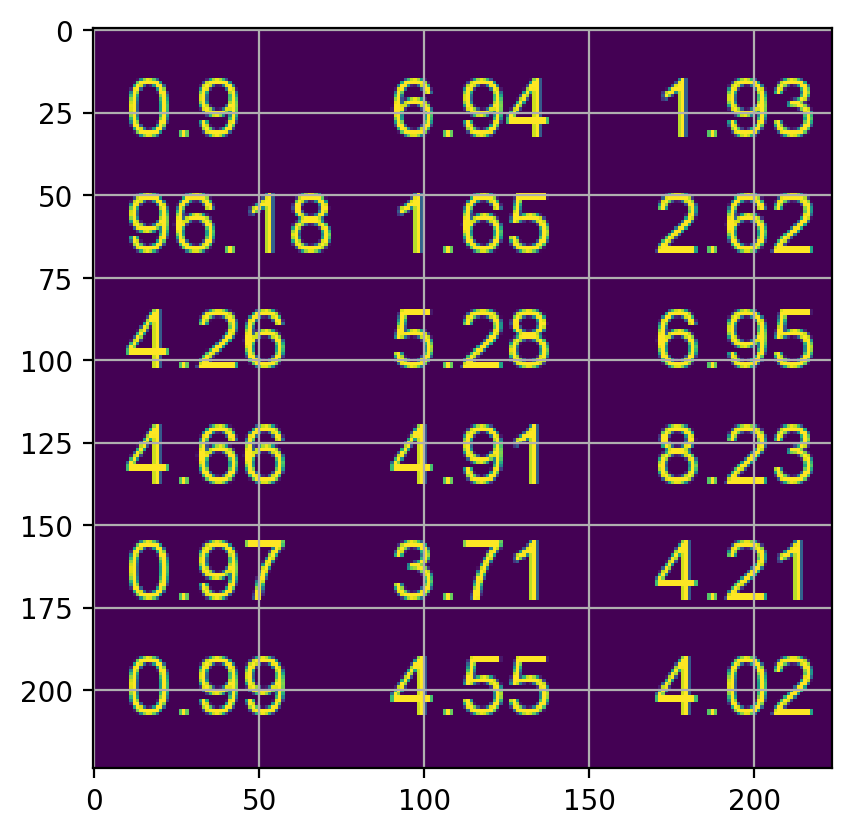

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
X_test, y_test = X_test, y_test

train_images = data_to_image(X_train)
val_images = data_to_image(X_val)
test_images = data_to_image(X_test)

print(train_images.shape)
print(val_images.shape)
print(test_images.shape)
plt.grid()
plt.imshow(train_images[0][0, :, :])

In [ ]:
 X_train = np.asarray(train_images)

In [ ]:
X_train = np.transpose(X_train, (0, 2, 3, 1))
X_train.shape

(584, 224, 224, 3)

In [ ]:
 X_val = np.asarray(val_images)

In [ ]:
X_val = np.transpose(X_val, (0, 2, 3, 1))
X_val.shape

(146, 224, 224, 3)

In [ ]:
 X_test = np.asarray(test_images)

In [ ]:
X_test = np.transpose(X_test, (0, 2, 3, 1))
X_test.shape

(731, 224, 224, 3)

In [ ]:
X_train_copy = X_train.reshape((584,1,224,224,3))
X_val_copy = X_val.reshape((146,1,224,224,3))
X_test_copy = X_test.reshape((731,1,224,224,3))

In [ ]:
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

####ResNet50

In [ ]:
resnet50=tf.keras.applications.ResNet50(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in resnet50.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(resnet50, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 7, 7, 2048)    23587712  
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 100352)        0         
 tributed)                                                       
                                                                 
 lstm (LSTM)                 (None, 256)               103023616 
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 21s 217ms/step - loss: 142.9831 - root_mean_squared_error: 11.9576 - val_loss: 0.7646 - val_root_mean_squared_error: 0.8744
Epoch 2/50
37/37 [==============================] - 5s 144ms/step - loss: 1.5178 - root_mean_squared_error: 1.2320 - val_loss: 0.8017 - val_root_mean_squared_error: 0.8954
Epoch 3/50
37/37 [==============================] - 5s 141ms/step - loss: 0.8977 - root_mean_squared_error: 0.9475 - val_loss: 0.8620 - val_root_mean_squared_error: 0.9284
Epoch 4/50
37/37 [==============================] - 5s 137ms/step - loss: 0.7468 - root_mean_squared_error: 0.8642 - val_loss: 0.6741 - val_root_mean_squared_error: 0.8210
Epoch 5/50
37/37 [==============================] - 5s 145ms/step - loss: 0.6825 - root_mean_squared_error: 0.8261 - val_loss: 0.6229 - val_root_mean_squared_error: 0.7892
Epoch 6/50
37/37 [==============================] - 6s 161ms/step - loss: 0.6489 - root_mean_squared_error: 0.8056 - val_loss: 0.6186 - 

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 6s 128ms/step


predictions  actuals
0       0.463817      0.0
1       0.231888      0.0
2       1.305114      0.0
3       0.190992      0.0
4       0.063738      0.0
..           ...      ...
726     0.221193      1.0
727     0.767132      1.0
728     0.175818      1.0
729     0.105487      1.0
730     0.067038      1.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            1.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      1.0
727          1.0      1.0
728          0.0      1.0
729          0.0      1.0
730          0.0      1.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            1.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      1.0
727          1.0      1.0
728          0.0      1.0
729          0.0      1.0
730          0.0      1.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.71      0.83      0.76       515
         1.0       0.28      0.17      0.21       208
         2.0       0.00      0.00      0.00         8

    accuracy                           0.63       731
   macro avg       0.33      0.33      0.33       731
weighted avg       0.58      0.63      0.60       731



<AxesSubplot:>

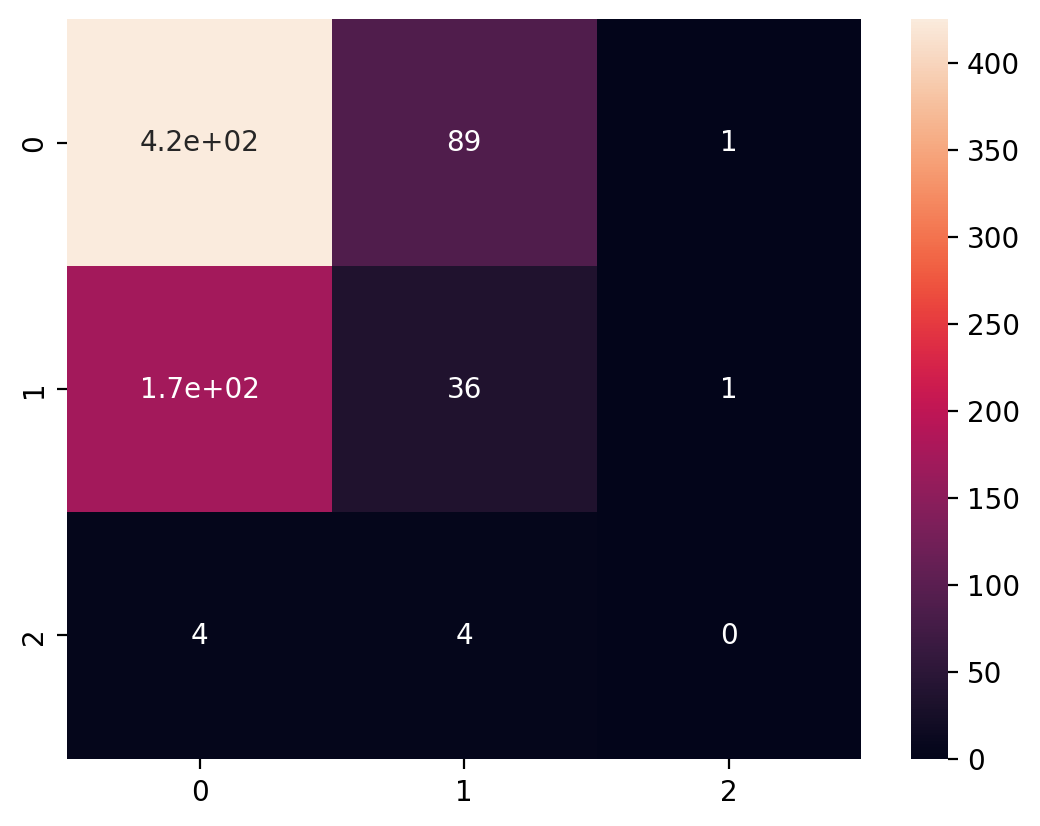

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####InceptionResNet V2

In [ ]:
inceptionresnet=tf.keras.applications.InceptionResNetV2(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in inceptionresnet.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(inceptionresnet, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_8 (TimeDis  (None, 1, 5, 5, 1536)    54336736  
 tributed)                                                       
                                                                 
 time_distributed_9 (TimeDis  (None, 1, 38400)         0         
 tributed)                                                       
                                                                 
 lstm_4 (LSTM)               (None, 256)               39584768  
                                                                 
 dense_8 (Dense)             (None, 64)                16448     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 39s 419ms/step - loss: 8.4883 - root_mean_squared_error: 2.9135 - val_loss: 0.7065 - val_root_mean_squared_error: 0.8405
Epoch 2/50
37/37 [==============================] - 8s 224ms/step - loss: 0.7434 - root_mean_squared_error: 0.8622 - val_loss: 0.7045 - val_root_mean_squared_error: 0.8393
Epoch 3/50
37/37 [==============================] - 8s 217ms/step - loss: 0.7066 - root_mean_squared_error: 0.8406 - val_loss: 0.7735 - val_root_mean_squared_error: 0.8795
Epoch 4/50
37/37 [==============================] - 8s 230ms/step - loss: 0.6846 - root_mean_squared_error: 0.8274 - val_loss: 0.6594 - val_root_mean_squared_error: 0.8120
Epoch 5/50
37/37 [==============================] - 9s 238ms/step - loss: 0.6935 - root_mean_squared_error: 0.8328 - val_loss: 0.6477 - val_root_mean_squared_error: 0.8048
Epoch 6/50
37/37 [==============================] - 10s 283ms/step - loss: 0.6196 - root_mean_squared_error: 0.7872 - val_loss: 0.6770 - va

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 13s 216ms/step


predictions  actuals
0       0.284775      0.0
1       0.250464      0.0
2       0.711570      0.0
3       0.461129      0.0
4       0.205669      0.0
..           ...      ...
726     0.671955      1.0
727     0.372226      1.0
728     0.617473      1.0
729     0.205669      1.0
730     0.205669      1.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            1.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          1.0      1.0
727          0.0      1.0
728          1.0      1.0
729          0.0      1.0
730          0.0      1.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            1.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          1.0      1.0
727          0.0      1.0
728          1.0      1.0
729          0.0      1.0
730          0.0      1.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.74      0.61      0.67       515
         1.0       0.33      0.49      0.40       208
         2.0       0.00      0.00      0.00         8

    accuracy                           0.57       731
   macro avg       0.36      0.37      0.36       731
weighted avg       0.62      0.57      0.59       731



<AxesSubplot:>

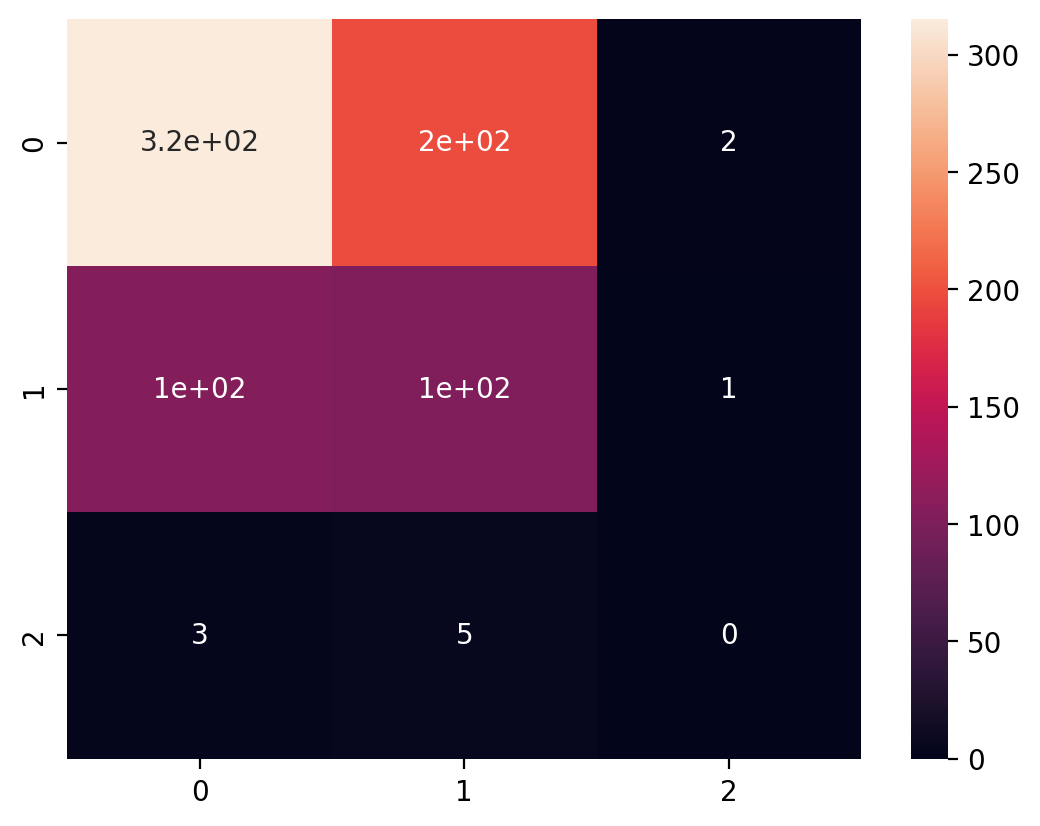

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####VGG16

In [ ]:
vgg16=tf.keras.applications.VGG16(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in vgg16.layers[:-4]:                                                       
    layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model = Sequential()
model.add(TimeDistributed(vgg16, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_10 (TimeDi  (None, 1, 7, 7, 512)     14714688  
 stributed)                                                      
                                                                 
 time_distributed_11 (TimeDi  (None, 1, 25088)         0         
 stributed)                                                      
                                                                 
 lstm_5 (LSTM)               (None, 256)               25953280  
                                                                 
 dense_10 (Dense)            (None, 64)                16448     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 12s 191ms/step - loss: 12.7520 - root_mean_squared_error: 3.5710 - val_loss: 0.9319 - val_root_mean_squared_error: 0.9653
Epoch 2/50
37/37 [==============================] - 5s 125ms/step - loss: 0.7939 - root_mean_squared_error: 0.8910 - val_loss: 0.6341 - val_root_mean_squared_error: 0.7963
Epoch 3/50
37/37 [==============================] - 5s 125ms/step - loss: 0.6931 - root_mean_squared_error: 0.8326 - val_loss: 0.7101 - val_root_mean_squared_error: 0.8427
Epoch 4/50
37/37 [==============================] - 5s 123ms/step - loss: 0.7160 - root_mean_squared_error: 0.8462 - val_loss: 0.6334 - val_root_mean_squared_error: 0.7958
Epoch 5/50
37/37 [==============================] - 4s 122ms/step - loss: 0.6754 - root_mean_squared_error: 0.8218 - val_loss: 0.6373 - val_root_mean_squared_error: 0.7983
Epoch 6/50
37/37 [==============================] - 5s 128ms/step - loss: 0.6546 - root_mean_squared_error: 0.8091 - val_loss: 0.6307 - va

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 9s 278ms/step


predictions  actuals
0       0.197669      0.0
1       0.197669      0.0
2       0.444486      0.0
3       0.197669      0.0
4       0.426271      0.0
..           ...      ...
726     0.507185      1.0
727     0.330007      1.0
728     0.197669      1.0
729     0.374636      1.0
730     0.197669      1.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            0.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          1.0      1.0
727          0.0      1.0
728          0.0      1.0
729          0.0      1.0
730          0.0      1.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            0.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          1.0      1.0
727          0.0      1.0
728          0.0      1.0
729          0.0      1.0
730          0.0      1.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.71      0.91      0.80       515
         1.0       0.33      0.11      0.16       208
         2.0       0.00      0.00      0.00         8

    accuracy                           0.67       731
   macro avg       0.35      0.34      0.32       731
weighted avg       0.60      0.67      0.61       731



<AxesSubplot:>

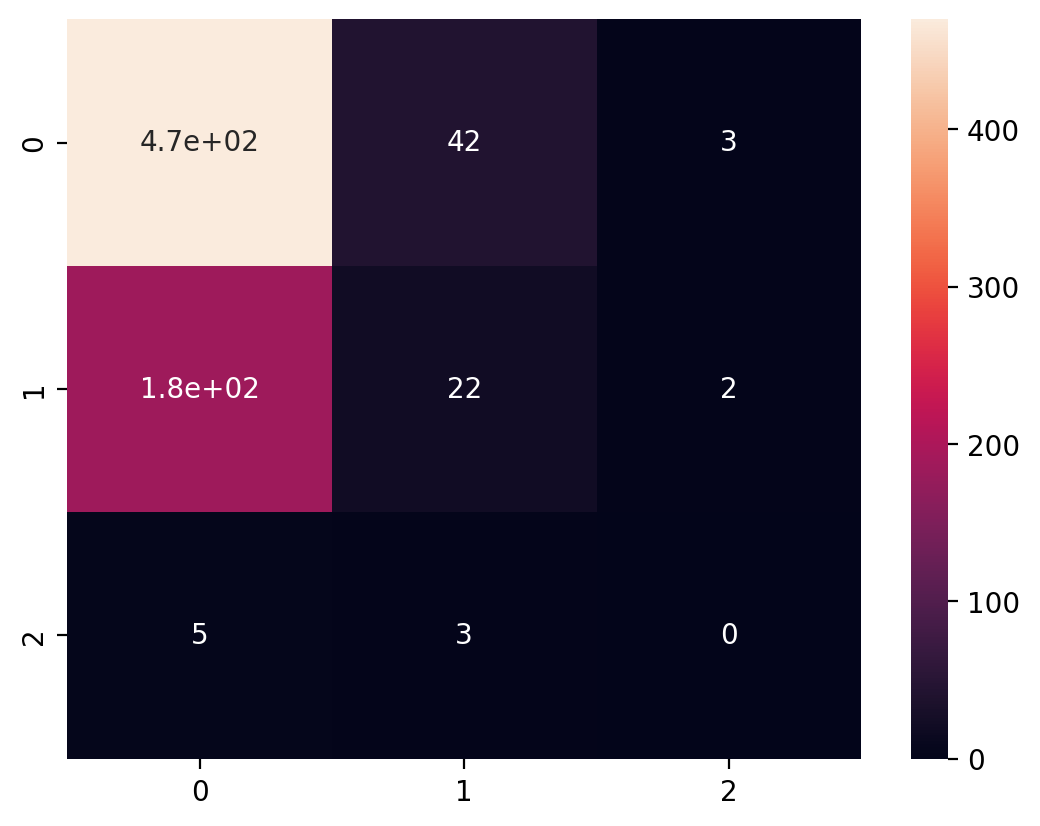

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

###Oversampling 1 : 1 (no feature importance)

In [ ]:
#Function to turn tabular data into image data
def data_to_image(data):
    data_images = []
    font = ImageFont.truetype("arial.ttf", size=25)
    for dat in data:
        background = np.array([[0 for _ in range(224)] for _ in range(224)], dtype='uint8')
        image = Image.fromarray(background)
        draw = ImageDraw.Draw(image)
        draw.text((10, 10), str(dat[0]), fill='white', font=font)
        draw.text((10, 45), str(dat[1]), fill='white', font=font)
        draw.text((10, 80), str(dat[2]), fill='white', font=font)
        draw.text((10, 115), str(dat[3]), fill='white', font=font)
        draw.text((10, 150), str(dat[4]), fill='white', font=font)
        draw.text((10, 185), str(dat[5]), fill='white', font=font)
        draw.text((90, 10), str(dat[6]), fill='white', font=font)
        draw.text((90, 45), str(dat[7]), fill='white', font=font)
        draw.text((90, 80), str(dat[8]), fill='white', font=font)
        draw.text((90, 115), str(dat[9]), fill='white', font=font)
        draw.text((90, 150), str(dat[10]), fill='white', font=font)
        draw.text((90, 185), str(dat[11]), fill='white', font=font)
        draw.text((170, 10), str(dat[12]), fill='white', font=font)
        draw.text((170, 45), str(dat[13]), fill='white', font=font)
        draw.text((170, 80), str(dat[14]), fill='white', font=font)
        draw.text((170, 115), str(dat[15]), fill='white', font=font)
        draw.text((170, 150), str(dat[16]), fill='white', font=font)
        draw.text((170, 185), str(dat[17]), fill='white', font=font) 
        rgb = [np.array(image, dtype='uint8') for _ in range(3)]
        data_images.append(rgb)
    return np.array(data_images) / 255

####oversampling

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
X_test, y_test = X_test, y_test

In [ ]:
#ratio 1 : 1
sm1 = SMOTE(sampling_strategy={0:474,1:474,2:474},random_state=42,k_neighbors=5)
X_train, y_train = sm1.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

After OverSampling, the shape of train_X: (1422, 18)
After OverSampling, the shape of train_y: (1422,) 



In [ ]:
X_train = X_train.round(4)
X_train

array([[9.00000e-01, 9.61800e+01, 4.26000e+00, ..., 8.23000e+00,
        4.21000e+00, 4.02000e+00],
       [2.00000e-02, 9.66500e+01, 9.58000e+00, ..., 4.71000e+00,
        1.80000e+00, 2.90000e+00],
       [1.08400e+01, 9.58300e+01, 3.66000e+00, ..., 1.00000e+01,
        3.90000e+00, 6.10000e+00],
       ...,
       [7.01700e-01, 9.65002e+01, 1.38610e+01, ..., 4.62450e+00,
        6.33300e-01, 3.99120e+00],
       [1.83000e-02, 9.72123e+01, 1.02671e+01, ..., 4.70850e+00,
        1.49640e+00, 3.21370e+00],
       [4.64800e-01, 9.67044e+01, 1.27508e+01, ..., 5.45920e+00,
        2.90310e+00, 2.56570e+00]])

(1422, 3, 224, 224)
(146, 3, 224, 224)
(731, 3, 224, 224)


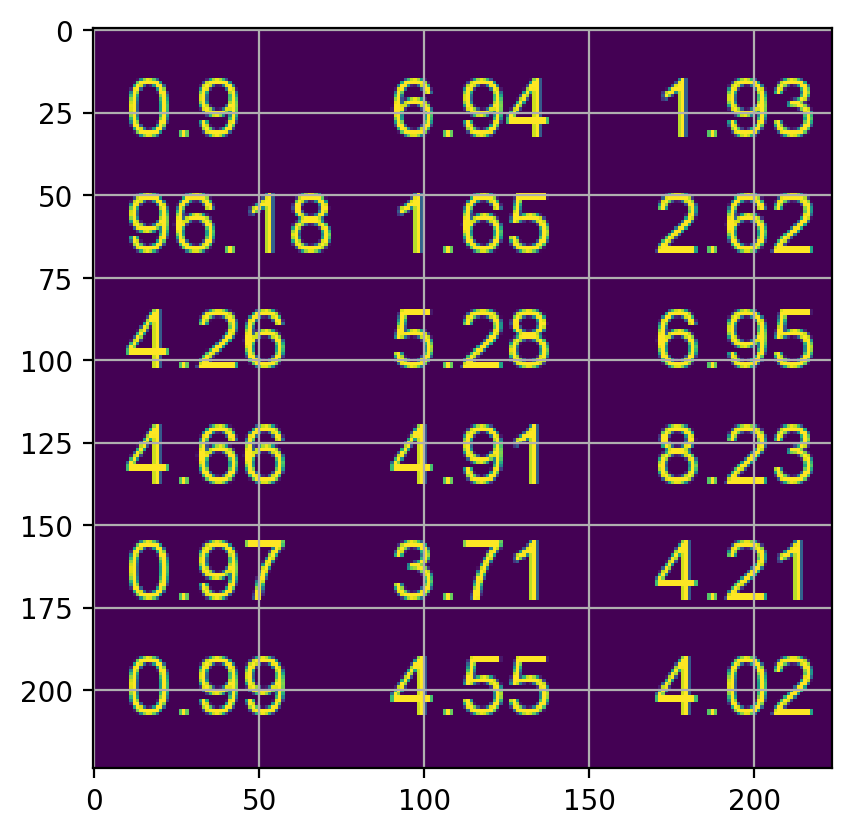

In [ ]:
train_images = data_to_image(X_train)
val_images = data_to_image(X_val)
test_images = data_to_image(X_test)

print(train_images.shape)
print(val_images.shape)
print(test_images.shape)
plt.grid()
plt.imshow(train_images[0][0, :, :])

In [ ]:
 X_train = np.asarray(train_images)

In [ ]:
X_train = np.transpose(X_train, (0, 2, 3, 1))
X_train.shape

(1422, 224, 224, 3)

In [ ]:
 X_val = np.asarray(val_images)

In [ ]:
X_val = np.transpose(X_val, (0, 2, 3, 1))
X_val.shape

(146, 224, 224, 3)

In [ ]:
 X_test = np.asarray(test_images)

In [ ]:
X_test = np.transpose(X_test, (0, 2, 3, 1))
X_test.shape

(731, 224, 224, 3)

In [ ]:
X_train_copy = X_train.reshape((1422,1,224,224,3))
X_val_copy = X_val.reshape((146,1,224,224,3))
X_test_copy = X_test.reshape((731,1,224,224,3))

In [ ]:
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

####ResNet50

In [ ]:
resnet50=tf.keras.applications.ResNet50(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in resnet50.layers[:-4]:                                                       
    layer.trainable = False

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
model = Sequential()
model.add(TimeDistributed(resnet50, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 7, 7, 2048)    23587712  
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 100352)        0         
 tributed)                                                       
                                                                 
 lstm (LSTM)                 (None, 256)               103023616 
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
89/89 [==============================] - 31s 156ms/step - loss: 30.5890 - root_mean_squared_error: 5.5307 - val_loss: 0.6311 - val_root_mean_squared_error: 0.7944
Epoch 2/50
89/89 [==============================] - 11s 126ms/step - loss: 0.7560 - root_mean_squared_error: 0.8695 - val_loss: 0.6249 - val_root_mean_squared_error: 0.7905
Epoch 3/50
89/89 [==============================] - 11s 128ms/step - loss: 0.6995 - root_mean_squared_error: 0.8364 - val_loss: 0.7081 - val_root_mean_squared_error: 0.8415
Epoch 4/50
89/89 [==============================] - 11s 129ms/step - loss: 0.7010 - root_mean_squared_error: 0.8372 - val_loss: 0.6259 - val_root_mean_squared_error: 0.7911
Epoch 5/50
89/89 [==============================] - 12s 129ms/step - loss: 0.6384 - root_mean_squared_error: 0.7990 - val_loss: 0.6214 - val_root_mean_squared_error: 0.7883
Epoch 6/50
89/89 [==============================] - 12s 129ms/step - loss: 0.6518 - root_mean_squared_error: 0.8073 - val_loss: 0.6157

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 6s 140ms/step


predictions  actuals
0       0.521028      0.0
1       0.636216      0.0
2       1.664598      0.0
3       0.434677      0.0
4       0.367903      0.0
..           ...      ...
726     0.681605      1.0
727     0.538174      1.0
728     0.500736      1.0
729     0.467477      1.0
730     0.471394      1.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results

predictions  actuals
0            1.0      0.0
1            1.0      0.0
2            2.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          1.0      1.0
727          1.0      1.0
728          1.0      1.0
729          0.0      1.0
730          0.0      1.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results

predictions  actuals
0            1.0      0.0
1            1.0      0.0
2            2.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          1.0      1.0
727          1.0      1.0
728          1.0      1.0
729          0.0      1.0
730          0.0      1.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.72      0.49      0.58       515
         1.0       0.29      0.52      0.38       208
         2.0       0.00      0.00      0.00         8

    accuracy                           0.50       731
   macro avg       0.34      0.34      0.32       731
weighted avg       0.59      0.50      0.52       731



<Axes: >

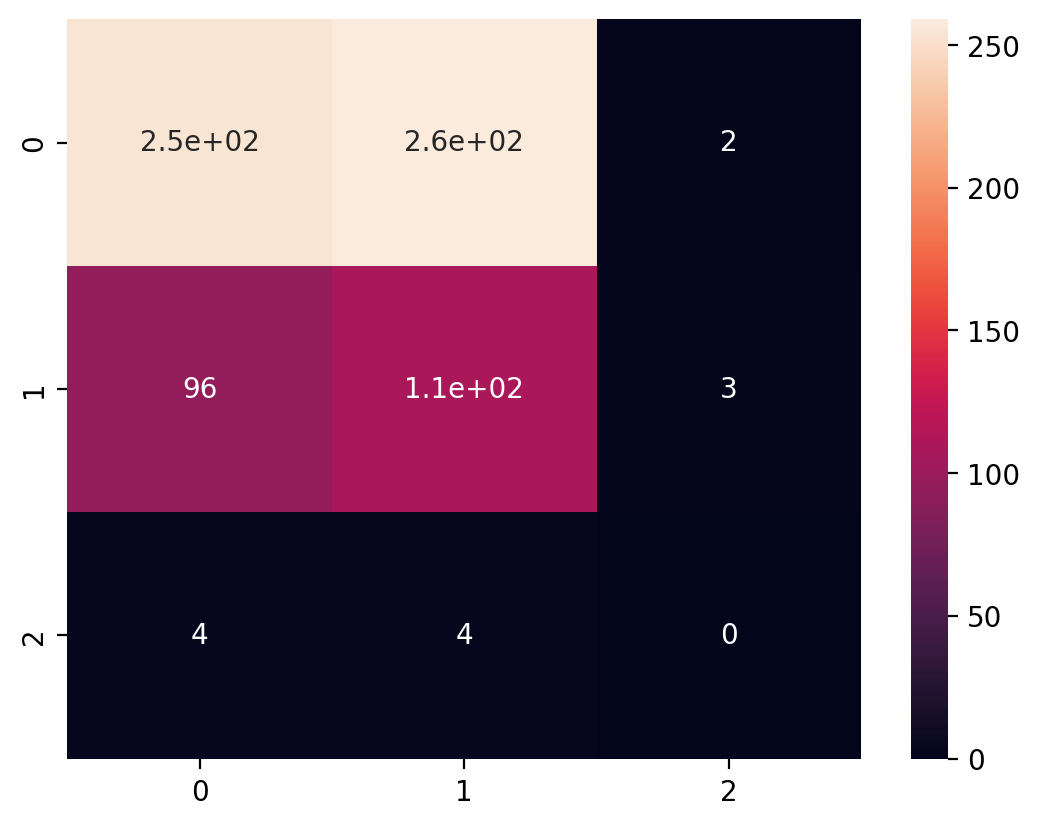

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####InceptionResNet V2

In [ ]:
inceptionresnet=tf.keras.applications.InceptionResNetV2(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in inceptionresnet.layers[:-4]:                                                       
    layer.trainable = False

219055592/219055592 [==============================] - 8s 0us/step


In [ ]:
model = Sequential()
model.add(TimeDistributed(inceptionresnet, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_4 (TimeDis  (None, 1, 5, 5, 1536)    54336736  
 tributed)                                                       
                                                                 
 time_distributed_5 (TimeDis  (None, 1, 38400)         0         
 tributed)                                                       
                                                                 
 lstm_2 (LSTM)               (None, 256)               39584768  
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
89/89 [==============================] - 44s 286ms/step - loss: 13.8744 - root_mean_squared_error: 3.7248 - val_loss: 0.6527 - val_root_mean_squared_error: 0.8079
Epoch 2/50
89/89 [==============================] - 18s 203ms/step - loss: 0.9109 - root_mean_squared_error: 0.9544 - val_loss: 0.6594 - val_root_mean_squared_error: 0.8120
Epoch 3/50
89/89 [==============================] - 18s 201ms/step - loss: 0.7823 - root_mean_squared_error: 0.8845 - val_loss: 0.7075 - val_root_mean_squared_error: 0.8411
Epoch 4/50
89/89 [==============================] - 18s 199ms/step - loss: 0.7323 - root_mean_squared_error: 0.8557 - val_loss: 0.6486 - val_root_mean_squared_error: 0.8054
Epoch 5/50
89/89 [==============================] - 18s 205ms/step - loss: 0.7569 - root_mean_squared_error: 0.8700 - val_loss: 0.6670 - val_root_mean_squared_error: 0.8167
Epoch 6/50
89/89 [==============================] - 18s 207ms/step - loss: 0.7158 - root_mean_squared_error: 0.8461 - val_loss: 0.6421

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 12s 234ms/step


predictions  actuals
0       0.485545      0.0
1       0.361091      0.0
2       1.361138      0.0
3       0.529630      0.0
4       0.372511      0.0
..           ...      ...
726     0.469188      1.0
727     0.521286      1.0
728     0.700801      1.0
729     0.500856      1.0
730     0.756679      1.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            1.0      0.0
3            1.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      1.0
727          1.0      1.0
728          1.0      1.0
729          1.0      1.0
730          1.0      1.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            1.0      0.0
3            1.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      1.0
727          1.0      1.0
728          1.0      1.0
729          1.0      1.0
730          1.0      1.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.78      0.44      0.56       515
         1.0       0.32      0.62      0.42       208
         2.0       0.02      0.12      0.04         8

    accuracy                           0.49       731
   macro avg       0.38      0.39      0.34       731
weighted avg       0.64      0.49      0.52       731



<Axes: >

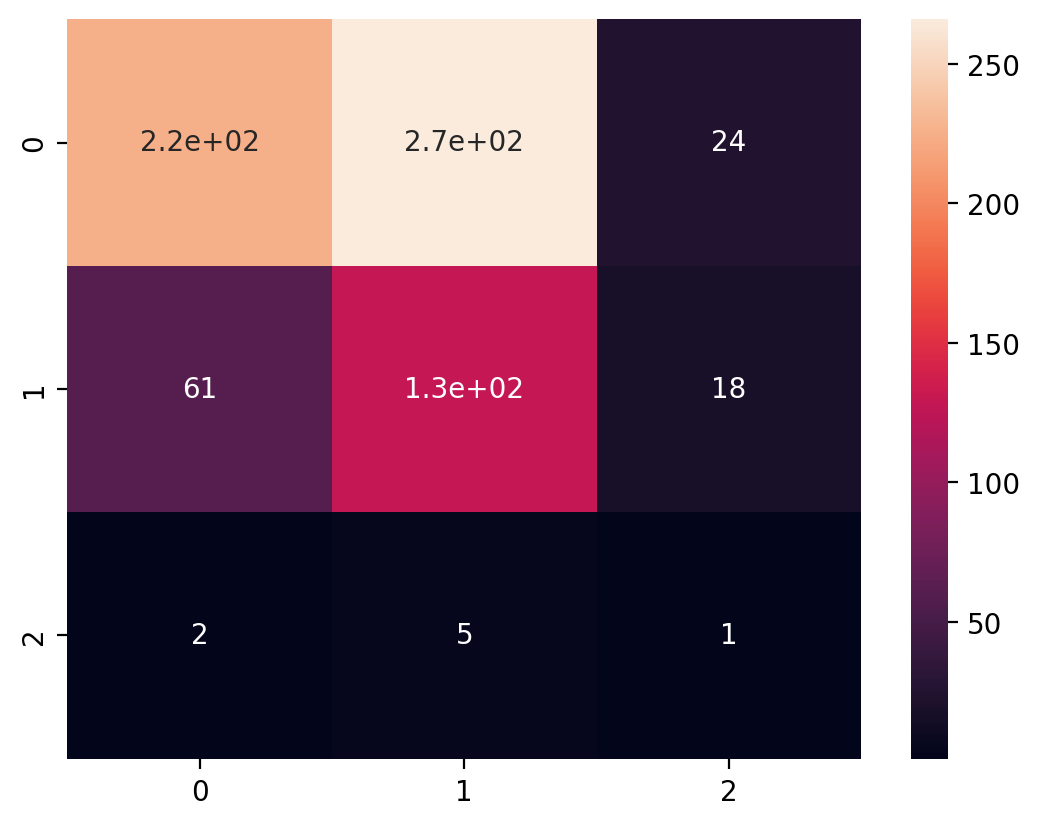

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####VGG16

In [ ]:
vgg16=tf.keras.applications.VGG16(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in vgg16.layers[:-4]:                                                       
    layer.trainable = False

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
model = Sequential()
model.add(TimeDistributed(vgg16, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_6 (TimeDis  (None, 1, 7, 7, 512)     14714688  
 tributed)                                                       
                                                                 
 time_distributed_7 (TimeDis  (None, 1, 25088)         0         
 tributed)                                                       
                                                                 
 lstm_3 (LSTM)               (None, 256)               25953280  
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
89/89 [==============================] - 18s 134ms/step - loss: 2.1790 - root_mean_squared_error: 1.4761 - val_loss: 0.6778 - val_root_mean_squared_error: 0.8233
Epoch 2/50
89/89 [==============================] - 8s 95ms/step - loss: 1.1784 - root_mean_squared_error: 1.0855 - val_loss: 0.8445 - val_root_mean_squared_error: 0.9190
Epoch 3/50
89/89 [==============================] - 8s 95ms/step - loss: 0.6845 - root_mean_squared_error: 0.8273 - val_loss: 0.6827 - val_root_mean_squared_error: 0.8262
Epoch 4/50
89/89 [==============================] - 8s 94ms/step - loss: 0.6185 - root_mean_squared_error: 0.7865 - val_loss: 0.6318 - val_root_mean_squared_error: 0.7948
Epoch 5/50
89/89 [==============================] - 8s 92ms/step - loss: 0.6056 - root_mean_squared_error: 0.7782 - val_loss: 0.6517 - val_root_mean_squared_error: 0.8073
Epoch 6/50
89/89 [==============================] - 8s 92ms/step - loss: 1.2806 - root_mean_squared_error: 1.1316 - val_loss: 0.6420 - val_root

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 11s 303ms/step


predictions  actuals
0       0.027599      0.0
1       0.529881      0.0
2       1.016493      0.0
3       0.225217      0.0
4       0.270783      0.0
..           ...      ...
726     0.785984      1.0
727     0.350367      1.0
728     1.330948      1.0
729     0.205459      1.0
730    -0.040027      1.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results

predictions  actuals
0            0.0      0.0
1            1.0      0.0
2            1.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          1.0      1.0
727          0.0      1.0
728          1.0      1.0
729          0.0      1.0
730          0.0      1.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results

predictions  actuals
0            0.0      0.0
1            1.0      0.0
2            1.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          1.0      1.0
727          0.0      1.0
728          1.0      1.0
729          0.0      1.0
730          0.0      1.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.73      0.69      0.71       515
         1.0       0.29      0.28      0.29       208
         2.0       0.00      0.00      0.00         8

    accuracy                           0.57       731
   macro avg       0.34      0.32      0.33       731
weighted avg       0.59      0.57      0.58       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels = np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.73      0.69      0.71       515
         1.0       0.29      0.28      0.29       208
         2.0       0.00      0.00      0.00         8

    accuracy                           0.57       731
   macro avg       0.34      0.32      0.33       731
weighted avg       0.59      0.57      0.58       731



<Axes: >

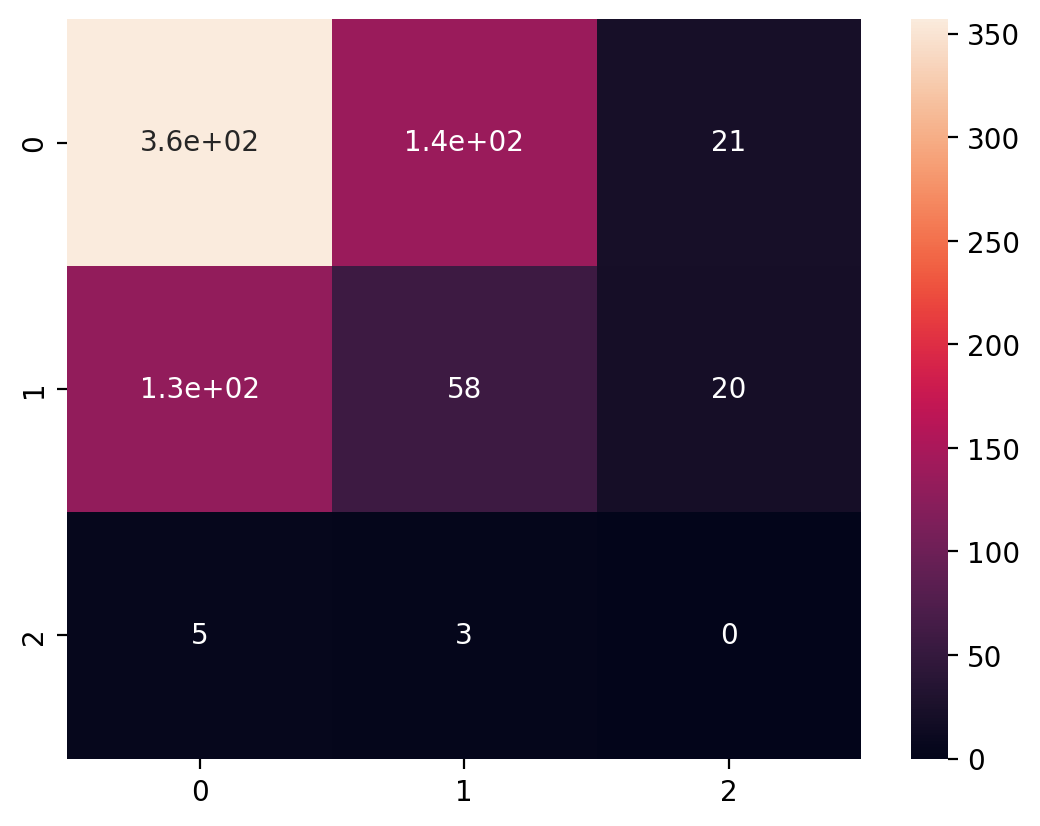

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

###with feature importance (xgboost feature importance)

In [ ]:
#Function to turn tabular data into image data
def data_to_image3(data):
    data_images = []
    font1 = ImageFont.truetype("arial.ttf", size=30)
    font2 = ImageFont.truetype("arial.ttf", size=25)
    font3 = ImageFont.truetype("arial.ttf", size=20)
    font4 = ImageFont.truetype("arial.ttf", size=15)
    font5 = ImageFont.truetype("arial.ttf", size=10)
    for dat in data:
        background = np.array([[0 for _ in range(224)] for _ in range(224)], dtype='uint8')
        image = Image.fromarray(background)
        draw = ImageDraw.Draw(image)
        draw.text((10, 10), str(dat[5]), fill='white', font=font1)
        draw.text((10, 45), str(dat[3]), fill='white', font=font2)
        draw.text((10, 80), str(dat[9]), fill='white', font=font3)
        draw.text((10, 115), str(dat[15]), fill='white', font=font3)
        draw.text((10, 150), str(dat[6]), fill='white', font=font3)
        draw.text((10, 185), str(dat[2]), fill='white', font=font3)
        draw.text((90, 10), str(dat[4]), fill='white', font=font3)
        draw.text((90, 45), str(dat[13]), fill='white', font=font4)
        draw.text((90, 80), str(dat[7]), fill='white', font=font4)
        draw.text((90, 115), str(dat[1]), fill='white', font=font4)
        draw.text((90, 150), str(dat[8]), fill='white', font=font5)
        draw.text((90, 185), str(dat[16]), fill='white', font=font5)
        draw.text((170, 10), str(dat[17]), fill='white', font=font5)
        draw.text((170, 45), str(dat[0]), fill='white', font=font5)
        draw.text((170, 80), str(dat[12]), fill='white', font=font5)
        draw.text((170, 115), str(dat[14]), fill='white', font=font5)
        draw.text((170, 150), str(dat[11]), fill='white', font=font5)
        draw.text((170, 185), str(dat[10]), fill='white', font=font5)
        rgb = [np.array(image, dtype='uint8') for _ in range(3)]
        data_images.append(rgb)
    return np.array(data_images) / 255

(584, 3, 224, 224)
(146, 3, 224, 224)
(731, 3, 224, 224)


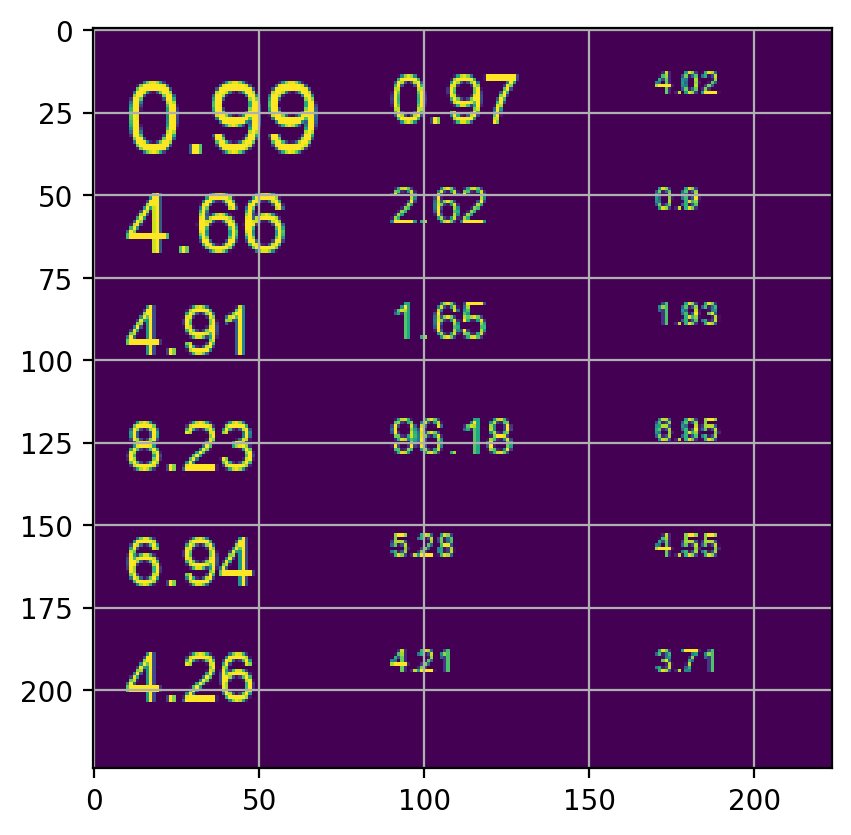

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
X_test, y_test = X_test, y_test

train_images3 = data_to_image3(X_train)
val_images3 = data_to_image3(X_val)
test_images3 = data_to_image3(X_test)

print(train_images3.shape)
print(val_images3.shape)
print(test_images3.shape)
plt.grid()
plt.imshow(train_images3[0][0, :, :])

In [ ]:
 X_train = np.asarray(train_images3)

In [ ]:
X_train = np.transpose(X_train, (0, 2, 3, 1))
X_train.shape

(584, 224, 224, 3)

In [ ]:
 X_val = np.asarray(val_images3)

In [ ]:
X_val = np.transpose(X_val, (0, 2, 3, 1))
X_val.shape

(146, 224, 224, 3)

In [ ]:
 X_test = np.asarray(test_images3)

In [ ]:
X_test = np.transpose(X_test, (0, 2, 3, 1))
X_test.shape

(731, 224, 224, 3)

In [ ]:
X_train_copy = X_train.reshape((584,1,224,224,3))
X_val_copy = X_val.reshape((146,1,224,224,3))
X_test_copy = X_test.reshape((731,1,224,224,3))

In [ ]:
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

####ResNet50

In [ ]:
resnet50=tf.keras.applications.ResNet50(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in resnet50.layers[:-4]:                                                       
    layer.trainable = False

94765736/94765736 [==============================] - 4s 0us/step


In [ ]:
model = Sequential()
model.add(TimeDistributed(resnet50, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 7, 7, 2048)    23587712  
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 100352)        0         
 tributed)                                                       
                                                                 
 lstm (LSTM)                 (None, 256)               103023616 
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 21s 206ms/step - loss: 40.2502 - root_mean_squared_error: 6.3443 - val_loss: 0.8310 - val_root_mean_squared_error: 0.9116
Epoch 2/50
37/37 [==============================] - 5s 132ms/step - loss: 0.7229 - root_mean_squared_error: 0.8503 - val_loss: 0.6325 - val_root_mean_squared_error: 0.7953
Epoch 3/50
37/37 [==============================] - 5s 135ms/step - loss: 0.6821 - root_mean_squared_error: 0.8259 - val_loss: 0.6490 - val_root_mean_squared_error: 0.8056
Epoch 4/50
37/37 [==============================] - 5s 134ms/step - loss: 0.6949 - root_mean_squared_error: 0.8336 - val_loss: 0.6392 - val_root_mean_squared_error: 0.7995
Epoch 5/50
37/37 [==============================] - 5s 134ms/step - loss: 0.6884 - root_mean_squared_error: 0.8297 - val_loss: 0.6618 - val_root_mean_squared_error: 0.8135
Epoch 6/50
37/37 [==============================] - 5s 136ms/step - loss: 0.6728 - root_mean_squared_error: 0.8202 - val_loss: 0.6430 - va

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 5s 126ms/step


predictions  actuals
0       0.256276      0.0
1       0.792872      0.0
2       0.662938      0.0
3       0.325989      0.0
4       0.563859      0.0
..           ...      ...
726     0.753517      1.0
727     0.411920      1.0
728     0.603107      1.0
729     0.470123      1.0
730     0.341819      1.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results

predictions  actuals
0            0.0      0.0
1            1.0      0.0
2            1.0      0.0
3            0.0      0.0
4            1.0      0.0
..           ...      ...
726          1.0      1.0
727          0.0      1.0
728          1.0      1.0
729          0.0      1.0
730          0.0      1.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results

predictions  actuals
0            0.0      0.0
1            1.0      0.0
2            1.0      0.0
3            0.0      0.0
4            1.0      0.0
..           ...      ...
726          1.0      1.0
727          0.0      1.0
728          1.0      1.0
729          0.0      1.0
730          0.0      1.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.75      0.60      0.66       515
         1.0       0.34      0.51      0.41       208
         2.0       0.00      0.00      0.00         8

    accuracy                           0.57       731
   macro avg       0.36      0.37      0.36       731
weighted avg       0.62      0.57      0.58       731



<Axes: >

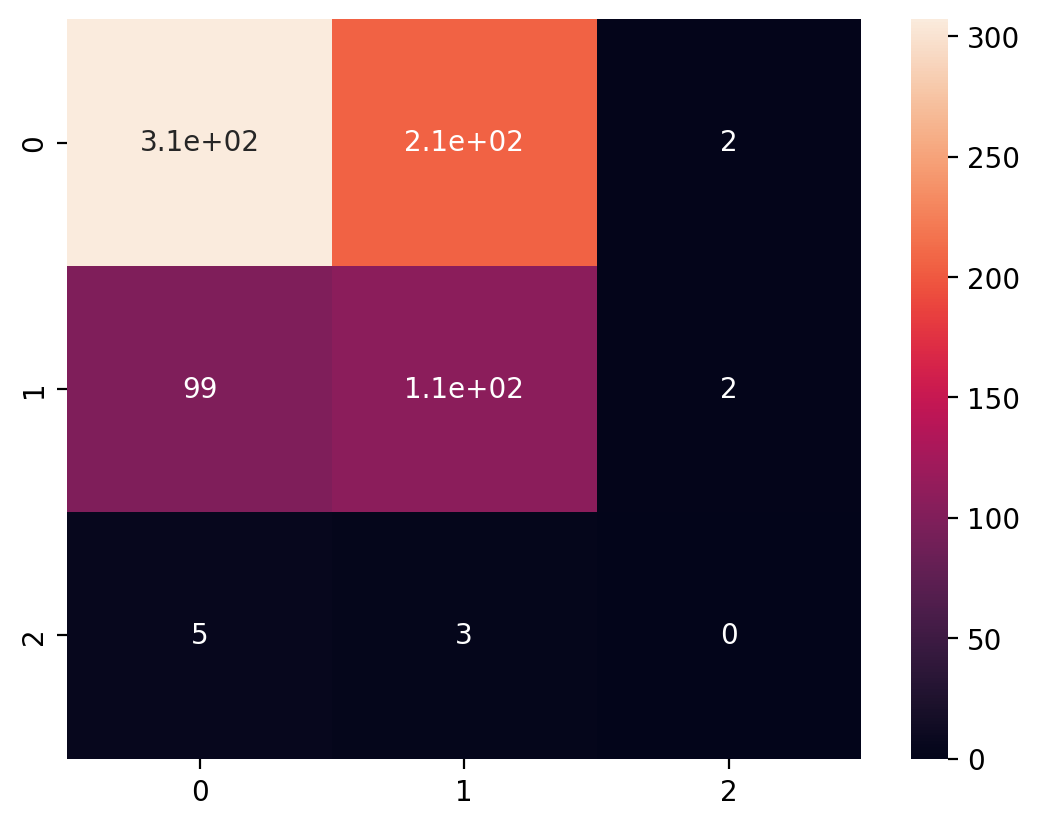

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####InceptionResNet V2

In [ ]:
inceptionresnet=tf.keras.applications.InceptionResNetV2(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in inceptionresnet.layers[:-4]:                                                       
    layer.trainable = False

219055592/219055592 [==============================] - 9s 0us/step


In [ ]:
model = Sequential()
model.add(TimeDistributed(inceptionresnet, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_2 (TimeDis  (None, 1, 5, 5, 1536)    54336736  
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 38400)         0         
 tributed)                                                       
                                                                 
 lstm_1 (LSTM)               (None, 256)               39584768  
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 32s 417ms/step - loss: 8.0577 - root_mean_squared_error: 2.8386 - val_loss: 0.7413 - val_root_mean_squared_error: 0.8610
Epoch 2/50
37/37 [==============================] - 8s 225ms/step - loss: 0.7988 - root_mean_squared_error: 0.8938 - val_loss: 0.8358 - val_root_mean_squared_error: 0.9142
Epoch 3/50
37/37 [==============================] - 8s 224ms/step - loss: 0.7526 - root_mean_squared_error: 0.8675 - val_loss: 0.6571 - val_root_mean_squared_error: 0.8106
Epoch 4/50
37/37 [==============================] - 8s 222ms/step - loss: 0.7325 - root_mean_squared_error: 0.8559 - val_loss: 0.6254 - val_root_mean_squared_error: 0.7908
Epoch 5/50
37/37 [==============================] - 8s 220ms/step - loss: 0.7034 - root_mean_squared_error: 0.8387 - val_loss: 0.6139 - val_root_mean_squared_error: 0.7835
Epoch 6/50
37/37 [==============================] - 8s 218ms/step - loss: 0.6832 - root_mean_squared_error: 0.8266 - val_loss: 0.7225 - val

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 11s 211ms/step


predictions  actuals
0       0.163088      0.0
1       0.123915      0.0
2       0.600769      0.0
3       0.115182      0.0
4       0.079335      0.0
..           ...      ...
726     0.407949      1.0
727     0.314270      1.0
728     1.228455      1.0
729     0.316233      1.0
730     0.123313      1.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            1.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      1.0
727          0.0      1.0
728          1.0      1.0
729          0.0      1.0
730          0.0      1.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            1.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      1.0
727          0.0      1.0
728          1.0      1.0
729          0.0      1.0
730          0.0      1.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.73      0.85      0.79       515
         1.0       0.40      0.24      0.30       208
         2.0       0.00      0.00      0.00         8

    accuracy                           0.67       731
   macro avg       0.37      0.36      0.36       731
weighted avg       0.63      0.67      0.64       731



<Axes: >

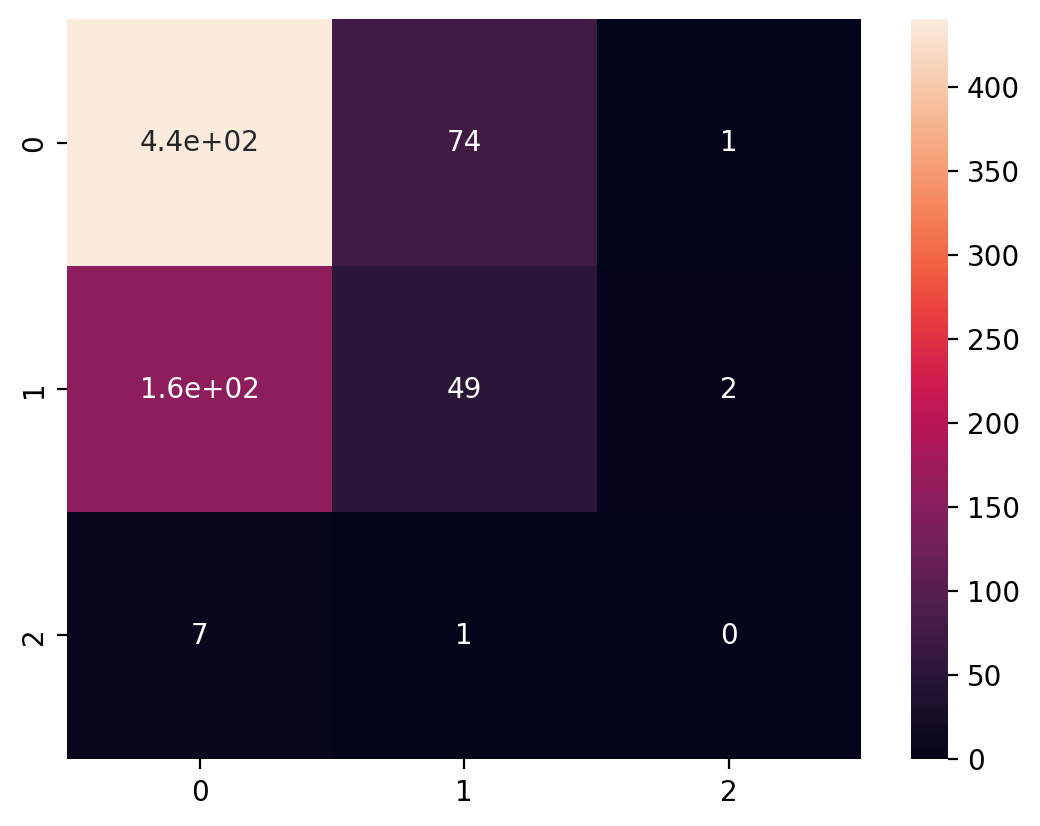

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####VGG16

In [ ]:
vgg16=tf.keras.applications.VGG16(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in vgg16.layers[:-4]:                                                       
    layer.trainable = False

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
model = Sequential()
model.add(TimeDistributed(vgg16, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_4 (TimeDis  (None, 1, 7, 7, 512)     14714688  
 tributed)                                                       
                                                                 
 time_distributed_5 (TimeDis  (None, 1, 25088)         0         
 tributed)                                                       
                                                                 
 lstm_2 (LSTM)               (None, 256)               25953280  
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 10s 185ms/step - loss: 2.7988 - root_mean_squared_error: 1.6729 - val_loss: 0.8928 - val_root_mean_squared_error: 0.9449
Epoch 2/50
37/37 [==============================] - 4s 120ms/step - loss: 0.8487 - root_mean_squared_error: 0.9212 - val_loss: 0.8106 - val_root_mean_squared_error: 0.9003
Epoch 3/50
37/37 [==============================] - 4s 122ms/step - loss: 0.7567 - root_mean_squared_error: 0.8699 - val_loss: 0.6938 - val_root_mean_squared_error: 0.8329
Epoch 4/50
37/37 [==============================] - 5s 122ms/step - loss: 0.6690 - root_mean_squared_error: 0.8179 - val_loss: 0.6362 - val_root_mean_squared_error: 0.7977
Epoch 5/50
37/37 [==============================] - 5s 123ms/step - loss: 0.6488 - root_mean_squared_error: 0.8055 - val_loss: 0.6329 - val_root_mean_squared_error: 0.7956
Epoch 6/50
37/37 [==============================] - 5s 124ms/step - loss: 0.6362 - root_mean_squared_error: 0.7976 - val_loss: 0.6327 - val

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 10s 271ms/step


predictions  actuals
0       0.529166      0.0
1       0.529166      0.0
2       0.529166      0.0
3       0.529166      0.0
4       0.529166      0.0
..           ...      ...
726     0.529166      1.0
727     0.529166      1.0
728     0.529166      1.0
729     0.529166      1.0
730     0.529166      1.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results

predictions  actuals
0            1.0      0.0
1            1.0      0.0
2            1.0      0.0
3            1.0      0.0
4            1.0      0.0
..           ...      ...
726          1.0      1.0
727          1.0      1.0
728          1.0      1.0
729          1.0      1.0
730          1.0      1.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results

predictions  actuals
0            1.0      0.0
1            1.0      0.0
2            1.0      0.0
3            1.0      0.0
4            1.0      0.0
..           ...      ...
726          1.0      1.0
727          1.0      1.0
728          1.0      1.0
729          1.0      1.0
730          1.0      1.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       515
         1.0       0.28      1.00      0.44       208
         2.0       0.00      0.00      0.00         8

    accuracy                           0.28       731
   macro avg       0.09      0.33      0.15       731
weighted avg       0.08      0.28      0.13       731



<Axes: >

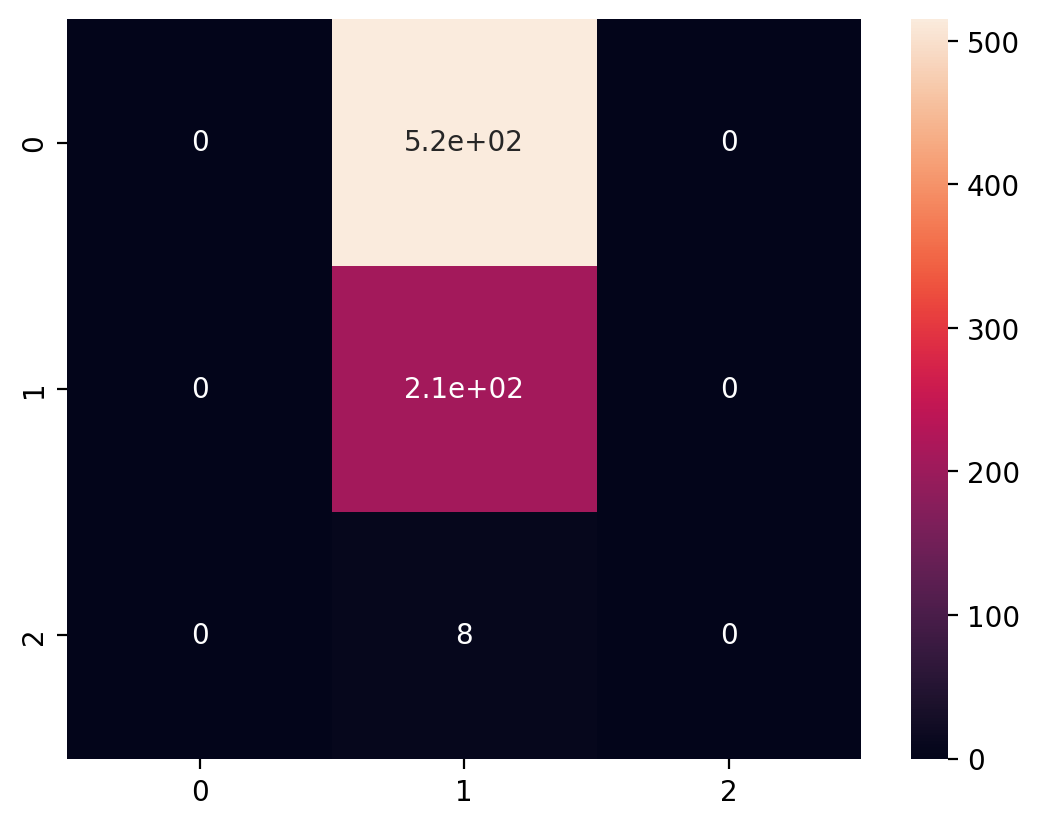

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

###Oversampling 1 : 1 (WITH feature importance)

In [ ]:
#Function to turn tabular data into image data
def data_to_image3(data):
    data_images = []
    font1 = ImageFont.truetype("arial.ttf", size=30)
    font2 = ImageFont.truetype("arial.ttf", size=25)
    font3 = ImageFont.truetype("arial.ttf", size=20)
    font4 = ImageFont.truetype("arial.ttf", size=15)
    font5 = ImageFont.truetype("arial.ttf", size=10)
    for dat in data:
        background = np.array([[0 for _ in range(224)] for _ in range(224)], dtype='uint8')
        image = Image.fromarray(background)
        draw = ImageDraw.Draw(image)
        draw.text((10, 10), str(dat[5]), fill='white', font=font1)
        draw.text((10, 45), str(dat[3]), fill='white', font=font2)
        draw.text((10, 80), str(dat[9]), fill='white', font=font3)
        draw.text((10, 115), str(dat[15]), fill='white', font=font3)
        draw.text((10, 150), str(dat[6]), fill='white', font=font3)
        draw.text((10, 185), str(dat[2]), fill='white', font=font3)
        draw.text((90, 10), str(dat[4]), fill='white', font=font3)
        draw.text((90, 45), str(dat[13]), fill='white', font=font4)
        draw.text((90, 80), str(dat[7]), fill='white', font=font4)
        draw.text((90, 115), str(dat[1]), fill='white', font=font4)
        draw.text((90, 150), str(dat[8]), fill='white', font=font5)
        draw.text((90, 185), str(dat[16]), fill='white', font=font5)
        draw.text((170, 10), str(dat[17]), fill='white', font=font5)
        draw.text((170, 45), str(dat[0]), fill='white', font=font5)
        draw.text((170, 80), str(dat[12]), fill='white', font=font5)
        draw.text((170, 115), str(dat[14]), fill='white', font=font5)
        draw.text((170, 150), str(dat[11]), fill='white', font=font5)
        draw.text((170, 185), str(dat[10]), fill='white', font=font5)
        rgb = [np.array(image, dtype='uint8') for _ in range(3)]
        data_images.append(rgb)
    return np.array(data_images) / 255

####oversampling

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
X_test, y_test = X_test, y_test

In [ ]:
#ratio 1 : 1
sm1 = SMOTE(sampling_strategy={0:474,1:474,2:474},random_state=42,k_neighbors=5)
X_train, y_train = sm1.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

After OverSampling, the shape of train_X: (1422, 18)
After OverSampling, the shape of train_y: (1422,) 



In [ ]:
X_train = X_train.round(4)
X_train

array([[9.00000e-01, 9.61800e+01, 4.26000e+00, ..., 8.23000e+00,
        4.21000e+00, 4.02000e+00],
       [2.00000e-02, 9.66500e+01, 9.58000e+00, ..., 4.71000e+00,
        1.80000e+00, 2.90000e+00],
       [1.08400e+01, 9.58300e+01, 3.66000e+00, ..., 1.00000e+01,
        3.90000e+00, 6.10000e+00],
       ...,
       [7.01700e-01, 9.65002e+01, 1.38610e+01, ..., 4.62450e+00,
        6.33300e-01, 3.99120e+00],
       [1.83000e-02, 9.72123e+01, 1.02671e+01, ..., 4.70850e+00,
        1.49640e+00, 3.21370e+00],
       [4.64800e-01, 9.67044e+01, 1.27508e+01, ..., 5.45920e+00,
        2.90310e+00, 2.56570e+00]])

(1422, 3, 224, 224)
(146, 3, 224, 224)
(731, 3, 224, 224)


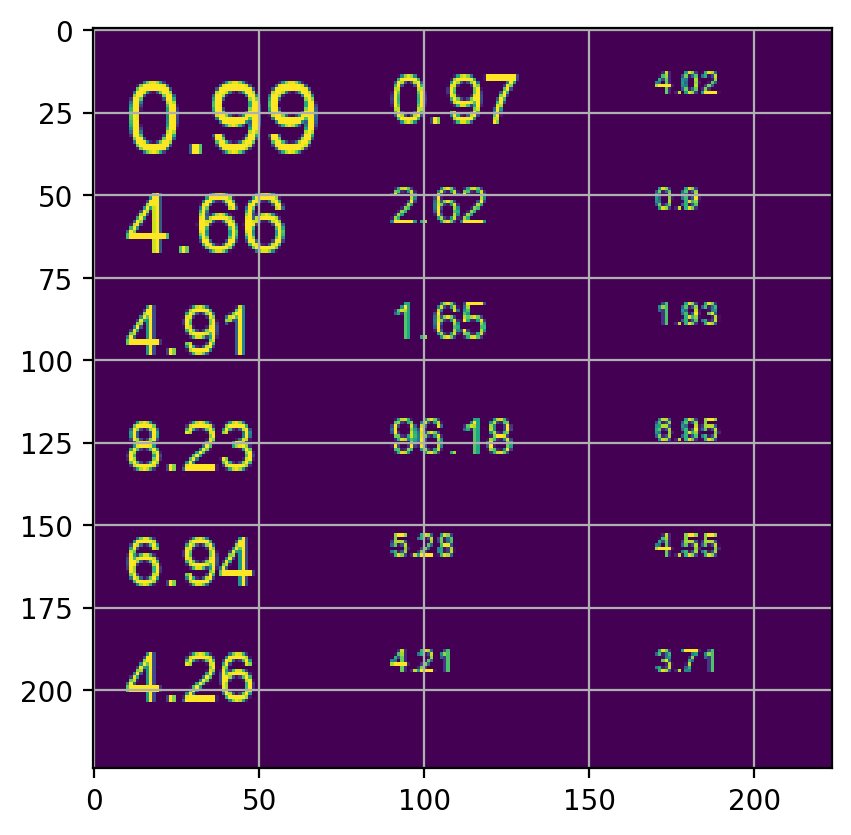

In [ ]:
train_images3 = data_to_image3(X_train)
val_images3 = data_to_image3(X_val)
test_images3 = data_to_image3(X_test)

print(train_images3.shape)
print(val_images3.shape)
print(test_images3.shape)
plt.grid()
plt.imshow(train_images3[0][0, :, :])

In [ ]:
 X_train = np.asarray(train_images3)

In [ ]:
X_train = np.transpose(X_train, (0, 2, 3, 1))
X_train.shape

(1422, 224, 224, 3)

In [ ]:
 X_val = np.asarray(val_images3)

In [ ]:
X_val = np.transpose(X_val, (0, 2, 3, 1))
X_val.shape

(146, 224, 224, 3)

In [ ]:
 X_test = np.asarray(test_images3)

In [ ]:
X_test = np.transpose(X_test, (0, 2, 3, 1))
X_test.shape

(731, 224, 224, 3)

In [ ]:
X_train_copy = X_train.reshape((1422,1,224,224,3))
X_val_copy = X_val.reshape((146,1,224,224,3))
X_test_copy = X_test.reshape((731,1,224,224,3))

In [ ]:
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

####ResNet50

In [ ]:
resnet50=tf.keras.applications.ResNet50(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in resnet50.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(resnet50, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_2 (TimeDis  (None, 1, 7, 7, 2048)    23587712  
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 100352)        0         
 tributed)                                                       
                                                                 
 lstm_1 (LSTM)               (None, 256)               103023616 
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
89/89 [==============================] - 20s 153ms/step - loss: 52.4900 - root_mean_squared_error: 7.2450 - val_loss: 0.6361 - val_root_mean_squared_error: 0.7976
Epoch 2/50
89/89 [==============================] - 12s 138ms/step - loss: 0.6946 - root_mean_squared_error: 0.8334 - val_loss: 0.6284 - val_root_mean_squared_error: 0.7927
Epoch 3/50
89/89 [==============================] - 12s 136ms/step - loss: 0.6660 - root_mean_squared_error: 0.8161 - val_loss: 0.6402 - val_root_mean_squared_error: 0.8001
Epoch 4/50
89/89 [==============================] - 12s 133ms/step - loss: 0.6879 - root_mean_squared_error: 0.8294 - val_loss: 0.6396 - val_root_mean_squared_error: 0.7997
Epoch 5/50
89/89 [==============================] - 12s 132ms/step - loss: 0.6896 - root_mean_squared_error: 0.8304 - val_loss: 0.6432 - val_root_mean_squared_error: 0.8020
Epoch 6/50
89/89 [==============================] - 12s 131ms/step - loss: 0.6518 - root_mean_squared_error: 0.8073 - val_loss: 0.6216

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 4s 100ms/step


predictions  actuals
0       0.258885      0.0
1       0.405792      0.0
2       0.840008      0.0
3       0.298805      0.0
4       0.427678      0.0
..           ...      ...
726     0.969301      1.0
727     0.434038      1.0
728     0.879722      1.0
729     0.575236      1.0
730     0.243239      1.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            1.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          1.0      1.0
727          0.0      1.0
728          1.0      1.0
729          1.0      1.0
730          0.0      1.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            1.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          1.0      1.0
727          0.0      1.0
728          1.0      1.0
729          1.0      1.0
730          0.0      1.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.75      0.58      0.66       515
         1.0       0.34      0.51      0.41       208
         2.0       0.00      0.00      0.00         8

    accuracy                           0.56       731
   macro avg       0.36      0.37      0.36       731
weighted avg       0.63      0.56      0.58       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels = np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.75      0.58      0.66       515
         1.0       0.34      0.51      0.41       208
         2.0       0.00      0.00      0.00         8

    accuracy                           0.56       731
   macro avg       0.36      0.37      0.36       731
weighted avg       0.63      0.56      0.58       731



<Axes: >

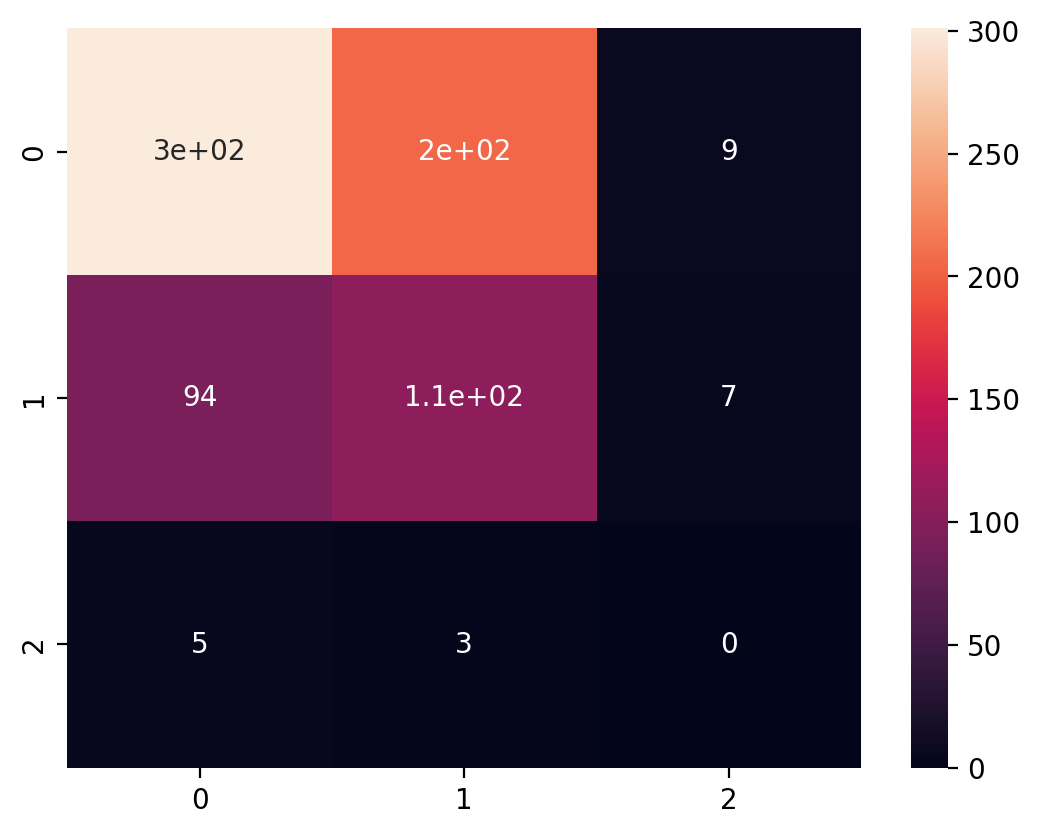

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####InceptionResNet V2

In [ ]:
inceptionresnet=tf.keras.applications.InceptionResNetV2(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in inceptionresnet.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(inceptionresnet, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_8 (TimeDis  (None, 1, 5, 5, 1536)    54336736  
 tributed)                                                       
                                                                 
 time_distributed_9 (TimeDis  (None, 1, 38400)         0         
 tributed)                                                       
                                                                 
 lstm_4 (LSTM)               (None, 256)               39584768  
                                                                 
 dense_8 (Dense)             (None, 64)                16448     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
89/89 [==============================] - 41s 271ms/step - loss: 9.0623 - root_mean_squared_error: 3.0104 - val_loss: 0.7059 - val_root_mean_squared_error: 0.8402
Epoch 2/50
89/89 [==============================] - 18s 205ms/step - loss: 0.7812 - root_mean_squared_error: 0.8839 - val_loss: 0.6388 - val_root_mean_squared_error: 0.7992
Epoch 3/50
89/89 [==============================] - 18s 203ms/step - loss: 0.8138 - root_mean_squared_error: 0.9021 - val_loss: 0.6355 - val_root_mean_squared_error: 0.7972
Epoch 4/50
89/89 [==============================] - 18s 202ms/step - loss: 0.8050 - root_mean_squared_error: 0.8972 - val_loss: 0.6615 - val_root_mean_squared_error: 0.8133
Epoch 5/50
89/89 [==============================] - 18s 203ms/step - loss: 0.7810 - root_mean_squared_error: 0.8837 - val_loss: 0.6359 - val_root_mean_squared_error: 0.7974
Epoch 6/50
89/89 [==============================] - 18s 203ms/step - loss: 0.7381 - root_mean_squared_error: 0.8591 - val_loss: 0.6688 

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 10s 165ms/step


predictions  actuals
0       0.628814      0.0
1       0.803464      0.0
2       1.575134      0.0
3       0.495214      0.0
4       0.460075      0.0
..           ...      ...
726     1.152659      1.0
727     1.303076      1.0
728     0.905816      1.0
729     0.586239      1.0
730     0.339698      1.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            1.0      0.0
1            1.0      0.0
2            2.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          1.0      1.0
727          1.0      1.0
728          1.0      1.0
729          1.0      1.0
730          0.0      1.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            1.0      0.0
1            1.0      0.0
2            2.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          1.0      1.0
727          1.0      1.0
728          1.0      1.0
729          1.0      1.0
730          0.0      1.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.75      0.33      0.46       515
         1.0       0.28      0.63      0.39       208
         2.0       0.00      0.00      0.00         8

    accuracy                           0.41       731
   macro avg       0.35      0.32      0.28       731
weighted avg       0.61      0.41      0.43       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels = np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.75      0.33      0.46       515
         1.0       0.28      0.63      0.39       208
         2.0       0.00      0.00      0.00         8

    accuracy                           0.41       731
   macro avg       0.35      0.32      0.28       731
weighted avg       0.61      0.41      0.43       731



<Axes: >

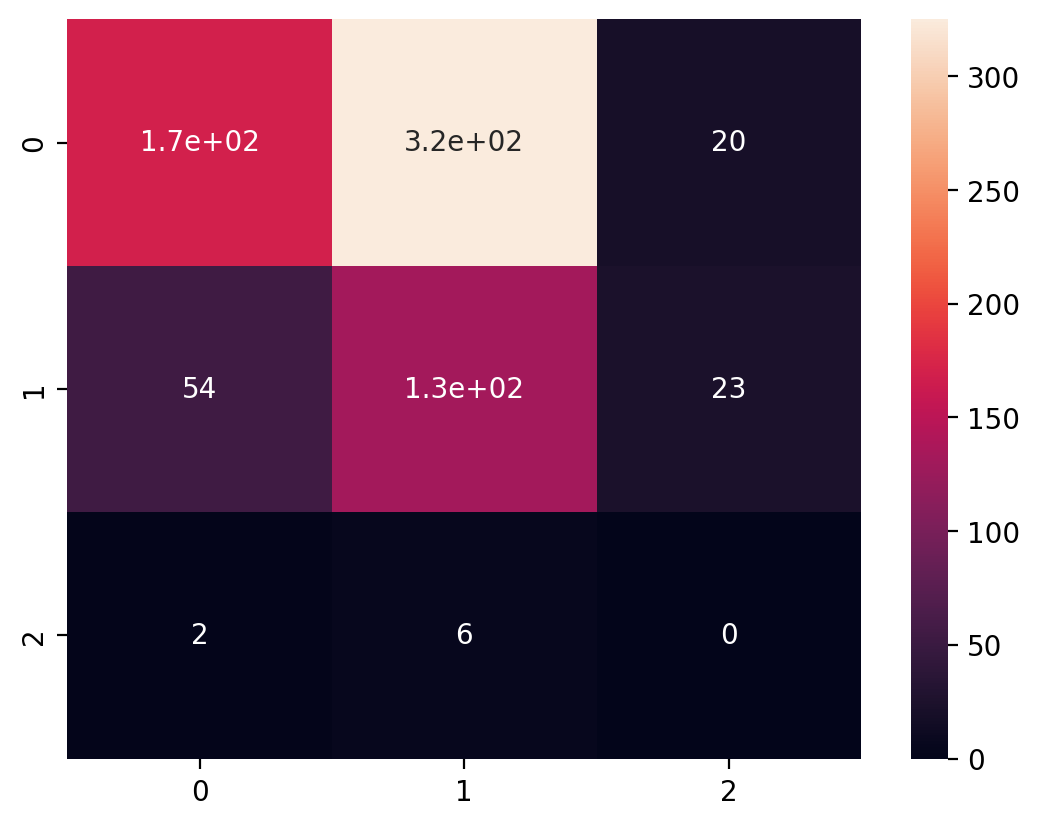

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####VGG16

In [ ]:
vgg16=tf.keras.applications.VGG16(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in vgg16.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(vgg16, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_10 (TimeDi  (None, 1, 7, 7, 512)     14714688  
 stributed)                                                      
                                                                 
 time_distributed_11 (TimeDi  (None, 1, 25088)         0         
 stributed)                                                      
                                                                 
 lstm_5 (LSTM)               (None, 256)               25953280  
                                                                 
 dense_10 (Dense)            (None, 64)                16448     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
89/89 [==============================] - 12s 96ms/step - loss: 11.8787 - root_mean_squared_error: 3.4466 - val_loss: 0.7569 - val_root_mean_squared_error: 0.8700
Epoch 2/50
89/89 [==============================] - 8s 91ms/step - loss: 0.9718 - root_mean_squared_error: 0.9858 - val_loss: 0.7313 - val_root_mean_squared_error: 0.8552
Epoch 3/50
89/89 [==============================] - 8s 92ms/step - loss: 0.7632 - root_mean_squared_error: 0.8736 - val_loss: 0.7872 - val_root_mean_squared_error: 0.8872
Epoch 4/50
89/89 [==============================] - 8s 93ms/step - loss: 0.7600 - root_mean_squared_error: 0.8718 - val_loss: 0.7816 - val_root_mean_squared_error: 0.8841
Epoch 5/50
89/89 [==============================] - 8s 92ms/step - loss: 0.7329 - root_mean_squared_error: 0.8561 - val_loss: 0.7919 - val_root_mean_squared_error: 0.8899
Epoch 6/50
89/89 [==============================] - 8s 91ms/step - loss: 0.7323 - root_mean_squared_error: 0.8558 - val_loss: 0.7869 - val_root

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 3s 126ms/step


predictions  actuals
0       0.993735      0.0
1       0.993735      0.0
2       0.993735      0.0
3       0.993735      0.0
4       0.993735      0.0
..           ...      ...
726     0.993735      1.0
727     0.993735      1.0
728     0.993735      1.0
729     0.993735      1.0
730     0.993735      1.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            1.0      0.0
1            1.0      0.0
2            1.0      0.0
3            1.0      0.0
4            1.0      0.0
..           ...      ...
726          1.0      1.0
727          1.0      1.0
728          1.0      1.0
729          1.0      1.0
730          1.0      1.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            1.0      0.0
1            1.0      0.0
2            1.0      0.0
3            1.0      0.0
4            1.0      0.0
..           ...      ...
726          1.0      1.0
727          1.0      1.0
728          1.0      1.0
729          1.0      1.0
730          1.0      1.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       515
         1.0       0.28      1.00      0.44       208
         2.0       0.00      0.00      0.00         8

    accuracy                           0.28       731
   macro avg       0.09      0.33      0.15       731
weighted avg       0.08      0.28      0.13       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels = np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       515
         1.0       0.28      1.00      0.44       208
         2.0       0.00      0.00      0.00         8

    accuracy                           0.28       731
   macro avg       0.09      0.33      0.15       731
weighted avg       0.08      0.28      0.13       731



<Axes: >

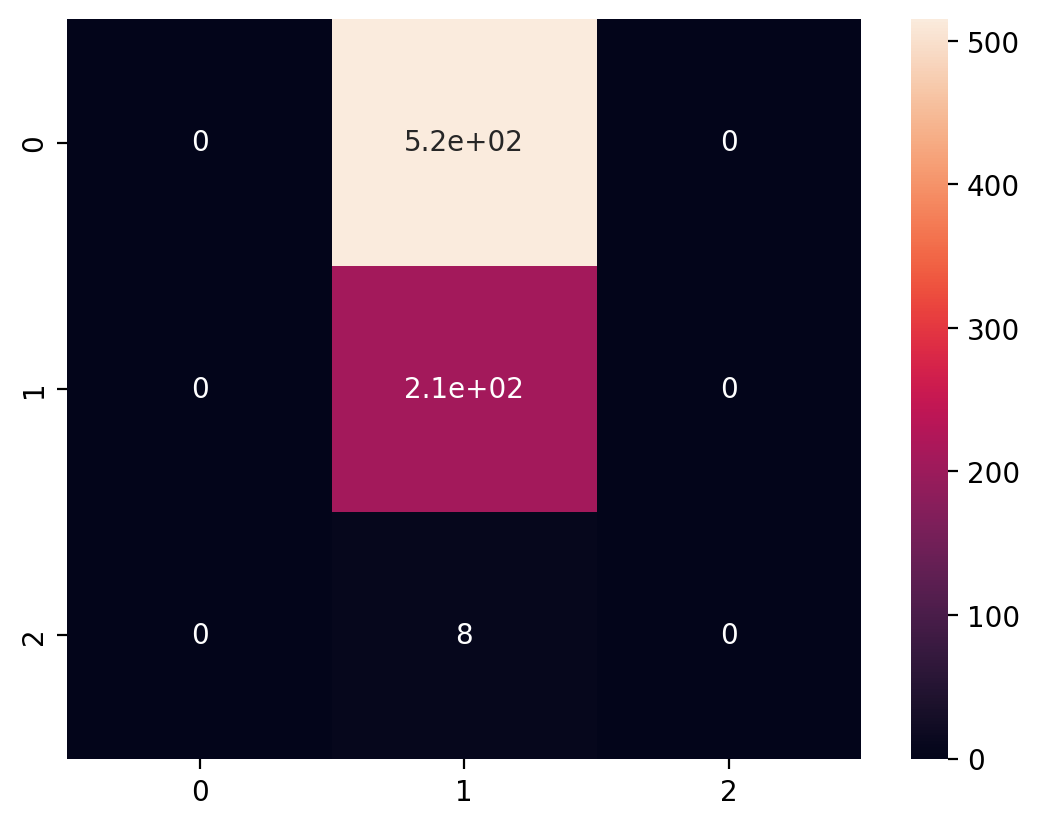

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

##Dakota, Minnesota

###train

In [ ]:
dakota = train[train['fips']==27037]

#using interpolation to fill in the NaN values
dakota = dakota.interpolate().fillna(method='bfill')
dakota.score[dakota.score <0.5] = 0
dakota.score[(dakota.score >=0.5)&(dakota.score<1.5)] = 1
dakota.score[(dakota.score >=1.5)&(dakota.score<2.5)] = 2
dakota.score[(dakota.score >=2.5)&(dakota.score<3.5)] = 3
dakota.score[(dakota.score >=3.5)&(dakota.score<4.5)] = 4
dakota.score[(dakota.score >=4.5)&(dakota.score<5.5)] = 5
dakota

###validation

In [ ]:
mn_val = validation[validation['fips']==27037]

#using interpolation to fill in the NaN values
mn_val = mn_val.interpolate().fillna(method='bfill')
mn_val.score[mn_val.score <0.5] = 0
mn_val.score[(mn_val.score >=0.5)&(mn_val.score<1.5)] = 1
mn_val.score[(mn_val.score >=1.5)&(mn_val.score<2.5)] = 2
mn_val.score[(mn_val.score >=2.5)&(mn_val.score<3.5)] = 3
mn_val.score[(mn_val.score >=3.5)&(mn_val.score<4.5)] = 4
mn_val.score[(mn_val.score >=4.5)&(mn_val.score<5.5)] = 5

mn_val.head()

fips        date  PRECTOT     PS  QV2M    T2M  T2MDEW  T2MWET  \
947540  27037  2017-01-01     0.03  98.07  1.97  -7.26   -8.78   -8.74   
947541  27037  2017-01-02     1.58  98.14  2.73  -3.81   -4.76   -4.75   
947542  27037  2017-01-03     0.08  98.29  1.47 -11.36  -12.76  -12.64   
947543  27037  2017-01-04     0.01  98.63  0.52 -21.40  -22.63  -22.31   
947544  27037  2017-01-05     0.02  98.49  0.47 -22.39  -23.69  -23.30   

        T2M_MAX  T2M_MIN  T2M_RANGE     TS  WS10M  WS10M_MAX  WS10M_MIN  \
947540    -2.34   -12.83      10.49  -7.94   3.68       6.50       1.69   
947541    -1.04    -6.71       5.67  -4.21   4.61       5.81       0.34   
947542    -3.16   -18.31      15.16 -11.61   8.35      10.50       0.80   
947543   -18.01   -25.28       7.26 -21.98   6.82       9.47       3.85   
947544   -18.16   -24.96       6.80 -22.59   4.20       5.33       3.28   

        WS10M_RANGE  WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE  score  
947540         4.80   6.17      10.13       1.97         8.16    0.0  
947541         5.47   6.63       8.22       0.54         7.68    0.0  
947542         9.70  10.67      12.93       1.32        11.61    0.0  
947543         5.63   9.34      12.14       6.51         5.63    0.0  
947544         2.05   6.37       8.13       5.46         2.67    0.0

In [ ]:
mn_val['score'].value_counts()

0.0    709
1.0     21
Name: score, dtype: int64

In [ ]:
mn_val = mn_val.round(4)

In [ ]:
X = mn_val[['PRECTOT', 'PS','QV2M','T2M','T2MDEW','T2MWET', 'T2M_MAX', 'T2M_MIN','T2M_RANGE','TS',
        'WS10M','WS10M_MAX','WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 
        'WS50M_RANGE']]
y = mn_val['score']

###xgboost feature importance

In [ ]:
X_train = dakota[['PRECTOT', 'PS','QV2M','T2M','T2MDEW','T2MWET', 'T2M_MAX', 'T2M_MIN','T2M_RANGE','TS',
        'WS10M','WS10M_MAX','WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 
        'WS50M_RANGE']]
y_train = dakota['score']

In [ ]:
X_val = mn_val[['PRECTOT', 'PS','QV2M','T2M','T2MDEW','T2MWET', 'T2M_MAX', 'T2M_MIN','T2M_RANGE','TS',
        'WS10M','WS10M_MAX','WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 
        'WS50M_RANGE']]
y_val = mn_val['score']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [ ]:
model = xgboost.XGBRegressor()
model.fit(X_train_scaled,y_train)

In [ ]:
predicted_y = model.predict(X_val_scaled)

In [ ]:
predicted_y_train = model.predict(X_train_scaled)

In [ ]:
print(metrics.r2_score(y_val, predicted_y))
print(metrics.mean_squared_error(y_train,predicted_y_train))
print(metrics.mean_squared_error(y_val, predicted_y))

In [ ]:
model.get_booster().get_score(importance_type='gain')

In [ ]:
import pandas as pd
f_importance = model.get_booster().get_score(importance_type='gain')

importance_df = pd.DataFrame.from_dict(data=f_importance, 
                                       orient='index')

In [ ]:
f_importance

In [ ]:
importance_df

In [ ]:
importance_df = importance_df.sort_values(0, ascending=False)
importance_df.plot.bar()

From the highest to the lowest of the xgoost feature importance rank:
1. T2MDEW
2. T2MWET
3. TS
4. T2M_MAX
5. WS50M_RANGE
6. T2M_MIN
7. T2M_RANGE
8. T2M
9. WS50M_MAX
10. WS10M_RANGE
11. WS50M
12. WS10M_MIN 
13. WS10M_MAX
14. WS10M
15. WS50M_MIN
16. QV2M
17. PS
18. PRECTOT

###test

In [ ]:
mn_test = test[test['fips']==27037]

#using interpolation to fill in the NaN values
mn_test = mn_test.interpolate().fillna(method='bfill')
mn_test.score[mn_test.score <0.5] = 0
mn_test.score[(mn_test.score >=0.5)&(mn_test.score<1.5)] = 1
mn_test.score[(mn_test.score >=1.5)&(mn_test.score<2.5)] = 2
mn_test.score[(mn_test.score >=2.5)&(mn_test.score<3.5)] = 3
mn_test.score[(mn_test.score >=3.5)&(mn_test.score<4.5)] = 4
mn_test.score[(mn_test.score >=4.5)&(mn_test.score<5.5)] = 5

mn_test.head()

fips        date  PRECTOT     PS  QV2M    T2M  T2MDEW  T2MWET  \
948838  27037  2019-01-01     0.00  99.37  0.55 -20.91  -24.14  -21.97   
948839  27037  2019-01-02     0.02  98.03  1.33 -12.71  -13.96  -13.85   
948840  27037  2019-01-03     0.00  97.44  2.62  -4.96   -5.41   -5.81   
948841  27037  2019-01-04     0.01  97.29  3.12  -2.41   -3.12   -3.13   
948842  27037  2019-01-05     0.01  97.82  3.10  -2.38   -3.11   -3.17   

        T2M_MAX  T2M_MIN  T2M_RANGE     TS  WS10M  WS10M_MAX  WS10M_MIN  \
948838   -15.74   -26.99      11.25 -22.80   3.48       7.48       0.85   
948839    -6.44   -24.31      17.87 -13.48   4.96       7.87       3.64   
948840     0.97   -11.65      12.61  -5.62   5.42       6.40       3.89   
948841     1.57    -6.00       7.57  -2.96   3.74       5.54       2.68   
948842     1.93    -7.41       9.34  -3.29   4.48       5.45       3.68   

        WS10M_RANGE  WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE  score  
948838         6.63   4.89       9.53       1.05         8.48    0.0  
948839         4.23   7.73       9.76       5.31         4.45    0.0  
948840         2.51   8.23       9.78       6.85         2.94    0.0  
948841         2.86   6.22       8.76       3.03         5.73    0.0  
948842         1.77   7.39       8.30       6.58         1.71    0.0

In [ ]:
mn_test = mn_test.round(4)
mn_test

fips        date  PRECTOT     PS  QV2M    T2M  T2MDEW  T2MWET  \
948838  27037  2019-01-01     0.00  99.37  0.55 -20.91  -24.14  -21.97   
948839  27037  2019-01-02     0.02  98.03  1.33 -12.71  -13.96  -13.85   
948840  27037  2019-01-03     0.00  97.44  2.62  -4.96   -5.41   -5.81   
948841  27037  2019-01-04     0.01  97.29  3.12  -2.41   -3.12   -3.13   
948842  27037  2019-01-05     0.01  97.82  3.10  -2.38   -3.11   -3.17   
...       ...         ...      ...    ...   ...    ...     ...     ...   
949564  27037  2020-12-27     1.47  97.78  1.93  -7.52   -9.33   -8.42   
949565  27037  2020-12-28     0.14  99.12  1.38 -11.31  -13.34  -12.32   
949566  27037  2020-12-29     4.44  98.80  1.62 -10.24  -11.39  -10.82   
949567  27037  2020-12-30     0.44  97.83  1.88  -7.80   -9.62   -8.71   
949568  27037  2020-12-31     0.11  98.68  1.74  -8.99  -10.51   -9.75   

        T2M_MAX  T2M_MIN  T2M_RANGE     TS  WS10M  WS10M_MAX  WS10M_MIN  \
948838   -15.74   -26.99      11.25 -22.80   3.48       7.48       0.85   
948839    -6.44   -24.31      17.87 -13.48   4.96       7.87       3.64   
948840     0.97   -11.65      12.61  -5.62   5.42       6.40       3.89   
948841     1.57    -6.00       7.57  -2.96   3.74       5.54       2.68   
948842     1.93    -7.41       9.34  -3.29   4.48       5.45       3.68   
...         ...      ...        ...    ...    ...        ...        ...   
949564    -4.72   -12.68       7.97  -7.79   4.69       6.53       2.52   
949565    -5.41   -15.01       9.60 -12.55   4.02       5.26       1.11   
949566    -6.48   -17.27      10.78 -11.37   4.37       6.39       1.31   
949567    -5.17   -11.25       6.08  -8.31   5.98       8.51       2.90   
949568    -3.85   -11.87       8.02  -9.84   3.99       5.56       1.86   

        WS10M_RANGE  WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE  score  
948838         6.63   4.89       9.53       1.05         8.48    0.0  
948839         4.23   7.73       9.76       5.31         4.45    0.0  
948840         2.51   8.23       9.78       6.85         2.94    0.0  
948841         2.86   6.22       8.76       3.03         5.73    0.0  
948842         1.77   7.39       8.30       6.58         1.71    0.0  
...             ...    ...        ...        ...          ...    ...  
949564         4.01   6.56       8.61       4.46         4.15    1.0  
949565         4.15   5.67       7.17       1.59         5.58    1.0  
949566         5.07   6.13       8.13       1.86         6.27    1.0  
949567         5.62   8.55      10.69       4.37         6.32    1.0  
949568         3.70   5.87       8.28       2.51         5.76    1.0  

[731 rows x 21 columns]

In [ ]:
mn_test['score'].value_counts()

0.0    689
1.0     42
Name: score, dtype: int64

In [ ]:
X_test = mn_test[['PRECTOT', 'PS','QV2M','T2M','T2MDEW','T2MWET', 'T2M_MAX', 'T2M_MIN','T2M_RANGE','TS',
        'WS10M','WS10M_MAX','WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 
        'WS50M_RANGE']]
y_test = mn_test['score']

In [ ]:
X = np.array(X)
X_test = np.array(X_test)

In [ ]:
y = np.array(y)
y_test = np.array(y_test)

###CNN-LSTM With SuperTML Method

###with no feature importance

In [ ]:
#Function to turn tabular data into image data
def data_to_image(data):
    data_images = []
    font = ImageFont.truetype("arial.ttf", size=25)
    for dat in data:
        background = np.array([[0 for _ in range(224)] for _ in range(224)], dtype='uint8')
        image = Image.fromarray(background)
        draw = ImageDraw.Draw(image)
        draw.text((10, 10), str(dat[0]), fill='white', font=font)
        draw.text((10, 45), str(dat[1]), fill='white', font=font)
        draw.text((10, 80), str(dat[2]), fill='white', font=font)
        draw.text((10, 115), str(dat[3]), fill='white', font=font)
        draw.text((10, 150), str(dat[4]), fill='white', font=font)
        draw.text((10, 185), str(dat[5]), fill='white', font=font)
        draw.text((90, 10), str(dat[6]), fill='white', font=font)
        draw.text((90, 45), str(dat[7]), fill='white', font=font)
        draw.text((90, 80), str(dat[8]), fill='white', font=font)
        draw.text((90, 115), str(dat[9]), fill='white', font=font)
        draw.text((90, 150), str(dat[10]), fill='white', font=font)
        draw.text((90, 185), str(dat[11]), fill='white', font=font)
        draw.text((170, 10), str(dat[12]), fill='white', font=font)
        draw.text((170, 45), str(dat[13]), fill='white', font=font)
        draw.text((170, 80), str(dat[14]), fill='white', font=font)
        draw.text((170, 115), str(dat[15]), fill='white', font=font)
        draw.text((170, 150), str(dat[16]), fill='white', font=font)
        draw.text((170, 185), str(dat[17]), fill='white', font=font) 
        rgb = [np.array(image, dtype='uint8') for _ in range(3)]
        data_images.append(rgb)
    return np.array(data_images) / 255

(584, 3, 224, 224)
(146, 3, 224, 224)


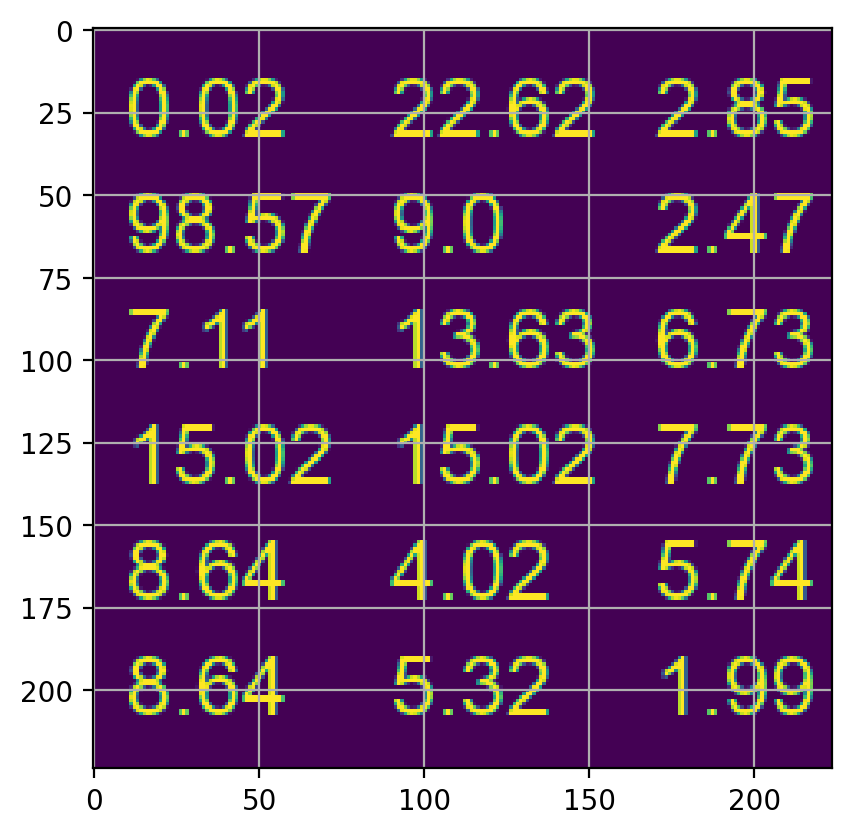

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

train_images = data_to_image(X_train)
val_images = data_to_image(X_val)

print(train_images.shape)
print(val_images.shape)
plt.grid()
plt.imshow(train_images[0][0, :, :])

In [ ]:
 X_train = np.asarray(train_images)

In [ ]:
X_train = np.transpose(X_train, (0, 2, 3, 1))
X_train.shape

(584, 224, 224, 3)

In [ ]:
 X_val = np.asarray(val_images)

In [ ]:
X_val = np.transpose(X_val, (0, 2, 3, 1))
X_val.shape

(146, 224, 224, 3)

In [ ]:
 X_test = np.asarray(test_images)

In [ ]:
X_test = np.transpose(X_test, (0, 2, 3, 1))
X_test.shape

(731, 224, 224, 3)

In [ ]:
X_train_copy = X_train.reshape((584,1,224,224,3))
X_val_copy = X_val.reshape((146,1,224,224,3))
X_test_copy = X_test.reshape((731,1,224,224,3))

In [ ]:
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

####ResNet50

In [ ]:
resnet50=tf.keras.applications.ResNet50(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in resnet50.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(resnet50, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_12 (TimeDi  (None, 1, 7, 7, 2048)    23587712  
 stributed)                                                      
                                                                 
 time_distributed_13 (TimeDi  (None, 1, 100352)        0         
 stributed)                                                      
                                                                 
 lstm_6 (LSTM)               (None, 256)               103023616 
                                                                 
 dense_12 (Dense)            (None, 64)                16448     
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 14s 245ms/step - loss: 19.5395 - root_mean_squared_error: 4.4203 - val_loss: 0.1185 - val_root_mean_squared_error: 0.3442
Epoch 2/50
37/37 [==============================] - 5s 148ms/step - loss: 0.0590 - root_mean_squared_error: 0.2428 - val_loss: 0.0284 - val_root_mean_squared_error: 0.1685
Epoch 3/50
37/37 [==============================] - 6s 154ms/step - loss: 0.0307 - root_mean_squared_error: 0.1751 - val_loss: 0.0278 - val_root_mean_squared_error: 0.1666
Epoch 4/50
37/37 [==============================] - 5s 148ms/step - loss: 0.0280 - root_mean_squared_error: 0.1673 - val_loss: 0.0273 - val_root_mean_squared_error: 0.1653
Epoch 5/50
37/37 [==============================] - 6s 150ms/step - loss: 0.0283 - root_mean_squared_error: 0.1682 - val_loss: 0.0272 - val_root_mean_squared_error: 0.1649
Epoch 6/50
37/37 [==============================] - 6s 151ms/step - loss: 0.0273 - root_mean_squared_error: 0.1651 - val_loss: 0.0266 - va

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 5s 105ms/step


predictions  actuals
0       0.027131      0.0
1       0.027131      0.0
2       0.027131      0.0
3       0.027131      0.0
4       0.027131      0.0
..           ...      ...
726     0.027131      1.0
727     0.027131      1.0
728     0.027131      1.0
729     0.027131      1.0
730     0.027131      1.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            0.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      1.0
727          0.0      1.0
728          0.0      1.0
729          0.0      1.0
730          0.0      1.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            0.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      1.0
727          0.0      1.0
728          0.0      1.0
729          0.0      1.0
730          0.0      1.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       689
         1.0       0.00      0.00      0.00        42

    accuracy                           0.94       731
   macro avg       0.47      0.50      0.49       731
weighted avg       0.89      0.94      0.91       731



<AxesSubplot:>

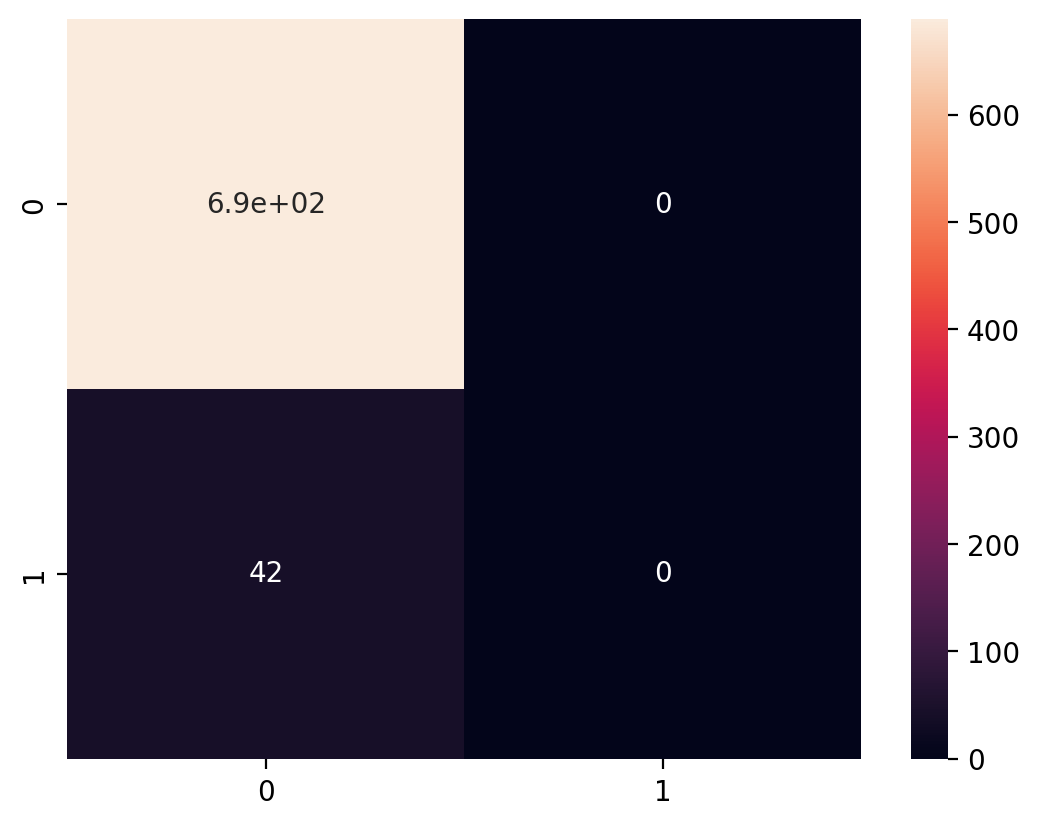

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####InceptionResNet V2

In [ ]:
inceptionresnet=tf.keras.applications.InceptionResNetV2(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in inceptionresnet.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(inceptionresnet, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_14 (TimeDi  (None, 1, 5, 5, 1536)    54336736  
 stributed)                                                      
                                                                 
 time_distributed_15 (TimeDi  (None, 1, 38400)         0         
 stributed)                                                      
                                                                 
 lstm_7 (LSTM)               (None, 256)               39584768  
                                                                 
 dense_14 (Dense)            (None, 64)                16448     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 33s 400ms/step - loss: 7.2302 - root_mean_squared_error: 2.6889 - val_loss: 0.0354 - val_root_mean_squared_error: 0.1882
Epoch 2/50
37/37 [==============================] - 9s 239ms/step - loss: 0.0574 - root_mean_squared_error: 0.2396 - val_loss: 0.0265 - val_root_mean_squared_error: 0.1627
Epoch 3/50
37/37 [==============================] - 9s 246ms/step - loss: 0.0323 - root_mean_squared_error: 0.1797 - val_loss: 0.0266 - val_root_mean_squared_error: 0.1631
Epoch 4/50
37/37 [==============================] - 8s 226ms/step - loss: 0.0301 - root_mean_squared_error: 0.1734 - val_loss: 0.0267 - val_root_mean_squared_error: 0.1635
Epoch 5/50
37/37 [==============================] - 9s 235ms/step - loss: 0.0285 - root_mean_squared_error: 0.1688 - val_loss: 0.0268 - val_root_mean_squared_error: 0.1636
Epoch 6/50
37/37 [==============================] - 8s 228ms/step - loss: 0.0287 - root_mean_squared_error: 0.1695 - val_loss: 0.0268 - val

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 11s 173ms/step


predictions  actuals
0       0.013461      0.0
1       0.008812      0.0
2       0.000163      0.0
3       0.021935      0.0
4       0.015678      0.0
..           ...      ...
726     0.005214      1.0
727     0.008895      1.0
728     0.009724      1.0
729     0.014114      1.0
730     0.011504      1.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            0.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      1.0
727          0.0      1.0
728          0.0      1.0
729          0.0      1.0
730          0.0      1.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            0.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      1.0
727          0.0      1.0
728          0.0      1.0
729          0.0      1.0
730          0.0      1.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       689
         1.0       0.00      0.00      0.00        42

    accuracy                           0.94       731
   macro avg       0.47      0.50      0.49       731
weighted avg       0.89      0.94      0.91       731



<AxesSubplot:>

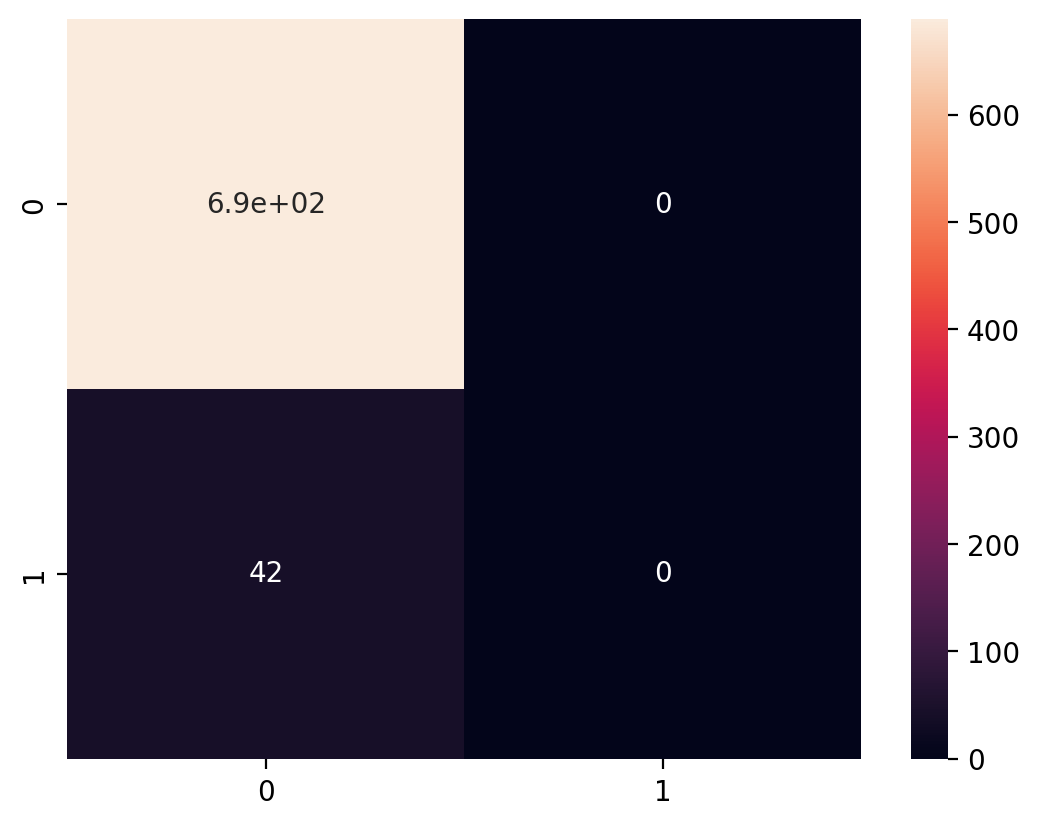

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####VGG16

In [ ]:
vgg16=tf.keras.applications.VGG16(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in vgg16.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(vgg16, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_16 (TimeDi  (None, 1, 7, 7, 512)     14714688  
 stributed)                                                      
                                                                 
 time_distributed_17 (TimeDi  (None, 1, 25088)         0         
 stributed)                                                      
                                                                 
 lstm_8 (LSTM)               (None, 256)               25953280  
                                                                 
 dense_16 (Dense)            (None, 64)                16448     
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 8s 141ms/step - loss: 1.2571 - root_mean_squared_error: 1.1212 - val_loss: 0.0277 - val_root_mean_squared_error: 0.1663
Epoch 2/50
37/37 [==============================] - 4s 116ms/step - loss: 0.0292 - root_mean_squared_error: 0.1708 - val_loss: 0.0271 - val_root_mean_squared_error: 0.1645
Epoch 3/50
37/37 [==============================] - 4s 115ms/step - loss: 0.0286 - root_mean_squared_error: 0.1691 - val_loss: 0.0268 - val_root_mean_squared_error: 0.1636
Epoch 4/50
37/37 [==============================] - 4s 119ms/step - loss: 0.0284 - root_mean_squared_error: 0.1685 - val_loss: 0.0267 - val_root_mean_squared_error: 0.1633
Epoch 5/50
37/37 [==============================] - 4s 121ms/step - loss: 0.0285 - root_mean_squared_error: 0.1689 - val_loss: 0.0267 - val_root_mean_squared_error: 0.1633
Epoch 6/50
37/37 [==============================] - 4s 117ms/step - loss: 0.0284 - root_mean_squared_error: 0.1684 - val_loss: 0.0267 - val_

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 5s 156ms/step


predictions  actuals
0       0.027878      0.0
1       0.027878      0.0
2       0.027878      0.0
3       0.027878      0.0
4       0.027878      0.0
..           ...      ...
726     0.027878      1.0
727     0.027878      1.0
728     0.027878      1.0
729     0.027878      1.0
730     0.027878      1.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            0.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      1.0
727          0.0      1.0
728          0.0      1.0
729          0.0      1.0
730          0.0      1.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            0.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      1.0
727          0.0      1.0
728          0.0      1.0
729          0.0      1.0
730          0.0      1.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       689
         1.0       0.00      0.00      0.00        42

    accuracy                           0.94       731
   macro avg       0.47      0.50      0.49       731
weighted avg       0.89      0.94      0.91       731



<AxesSubplot:>

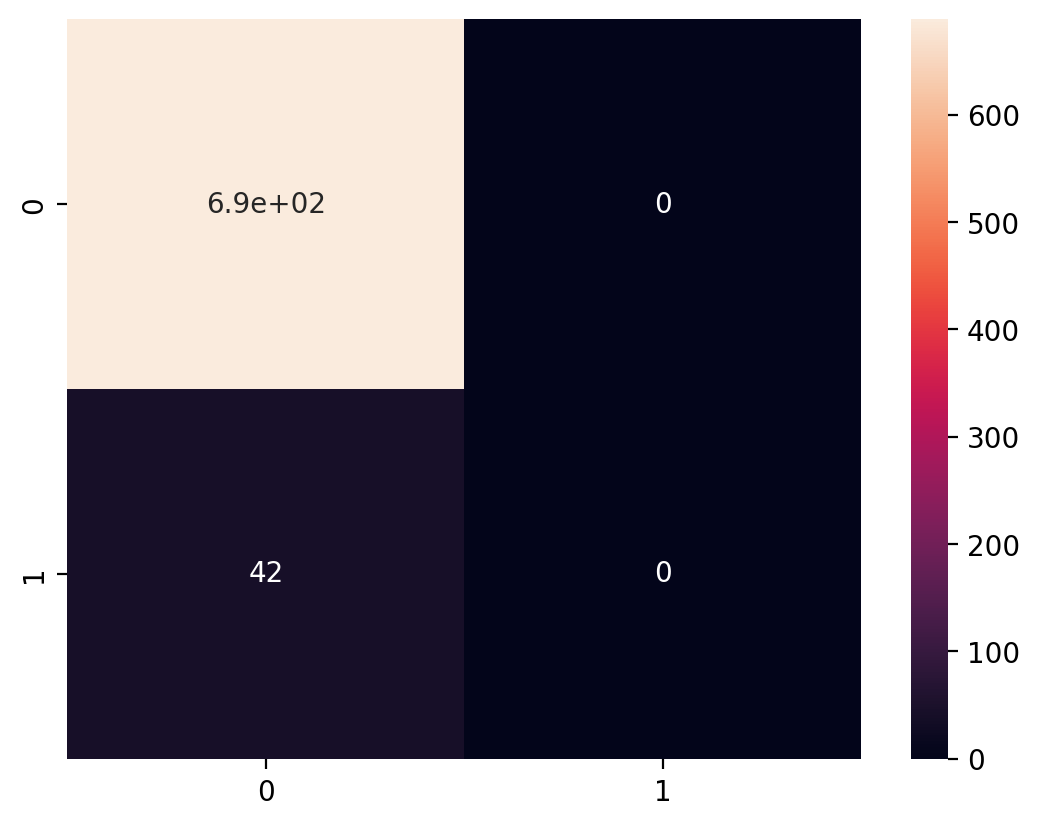

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

###Oversampling 1 : 1 (no feature importance)

In [ ]:
#Function to turn tabular data into image data
def data_to_image(data):
    data_images = []
    font = ImageFont.truetype("arial.ttf", size=25)
    for dat in data:
        background = np.array([[0 for _ in range(224)] for _ in range(224)], dtype='uint8')
        image = Image.fromarray(background)
        draw = ImageDraw.Draw(image)
        draw.text((10, 10), str(dat[0]), fill='white', font=font)
        draw.text((10, 45), str(dat[1]), fill='white', font=font)
        draw.text((10, 80), str(dat[2]), fill='white', font=font)
        draw.text((10, 115), str(dat[3]), fill='white', font=font)
        draw.text((10, 150), str(dat[4]), fill='white', font=font)
        draw.text((10, 185), str(dat[5]), fill='white', font=font)
        draw.text((90, 10), str(dat[6]), fill='white', font=font)
        draw.text((90, 45), str(dat[7]), fill='white', font=font)
        draw.text((90, 80), str(dat[8]), fill='white', font=font)
        draw.text((90, 115), str(dat[9]), fill='white', font=font)
        draw.text((90, 150), str(dat[10]), fill='white', font=font)
        draw.text((90, 185), str(dat[11]), fill='white', font=font)
        draw.text((170, 10), str(dat[12]), fill='white', font=font)
        draw.text((170, 45), str(dat[13]), fill='white', font=font)
        draw.text((170, 80), str(dat[14]), fill='white', font=font)
        draw.text((170, 115), str(dat[15]), fill='white', font=font)
        draw.text((170, 150), str(dat[16]), fill='white', font=font)
        draw.text((170, 185), str(dat[17]), fill='white', font=font) 
        rgb = [np.array(image, dtype='uint8') for _ in range(3)]
        data_images.append(rgb)
    return np.array(data_images) / 255

####oversampling

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
X_test, y_test = X_test, y_test

In [ ]:
#ratio 1 : 1 (train, val)
sm1 = SMOTE(sampling_strategy={0:709,1:709},random_state=42,k_neighbors=5)
X_train, y_train = sm1.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

After OverSampling, the shape of train_X: (1418, 18)
After OverSampling, the shape of train_y: (1418,) 



In [ ]:
X_train = X_train.round(4)
X_train

array([[2.00000e-02, 9.85700e+01, 7.11000e+00, ..., 7.73000e+00,
        5.74000e+00, 1.99000e+00],
       [5.90000e-01, 9.71600e+01, 6.80000e+00, ..., 1.26700e+01,
        7.16000e+00, 5.51000e+00],
       [0.00000e+00, 9.93000e+01, 6.98000e+00, ..., 7.27000e+00,
        2.44000e+00, 4.82000e+00],
       ...,
       [4.75200e-01, 9.78794e+01, 1.34726e+01, ..., 5.86740e+00,
        2.81260e+00, 3.05480e+00],
       [3.20000e-02, 9.82891e+01, 1.11525e+01, ..., 5.03690e+00,
        1.63500e+00, 3.40190e+00],
       [3.29600e-01, 9.83731e+01, 9.43660e+00, ..., 7.29560e+00,
        3.39630e+00, 3.89920e+00]])

(1418, 3, 224, 224)
(146, 3, 224, 224)
(731, 3, 224, 224)


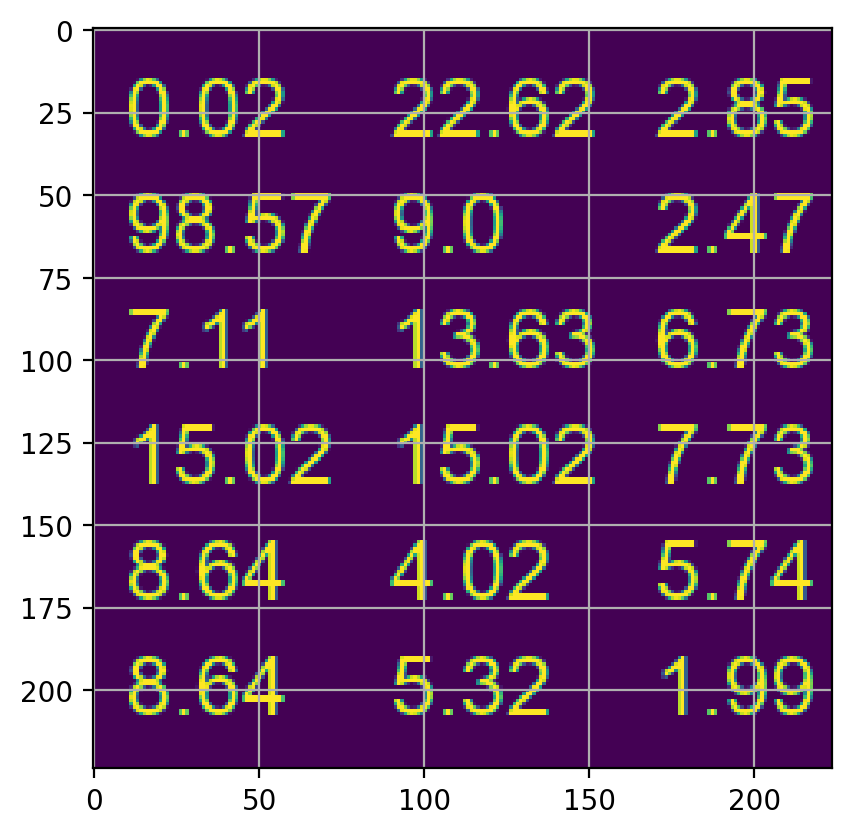

In [ ]:
train_images = data_to_image(X_train)
val_images = data_to_image(X_val)
test_images = data_to_image(X_test)

print(train_images.shape)
print(val_images.shape)
print(test_images.shape)
plt.grid()
plt.imshow(train_images[0][0, :, :])

In [ ]:
 X_train = np.asarray(train_images)

In [ ]:
X_train = np.transpose(X_train, (0, 2, 3, 1))
X_train.shape

(1418, 224, 224, 3)

In [ ]:
 X_val = np.asarray(val_images)

In [ ]:
X_val = np.transpose(X_val, (0, 2, 3, 1))
X_val.shape

(146, 224, 224, 3)

In [ ]:
 X_test = np.asarray(test_images)

In [ ]:
X_test = np.transpose(X_test, (0, 2, 3, 1))
X_test.shape

(731, 224, 224, 3)

In [ ]:
X_train_copy = X_train.reshape((1418,1,224,224,3))
X_val_copy = X_val.reshape((146,1,224,224,3))
X_test_copy = X_test.reshape((731,1,224,224,3))

In [ ]:
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

####ResNet50

In [ ]:
resnet50=tf.keras.applications.ResNet50(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in resnet50.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(resnet50, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_12 (TimeDi  (None, 1, 7, 7, 2048)    23587712  
 stributed)                                                      
                                                                 
 time_distributed_13 (TimeDi  (None, 1, 100352)        0         
 stributed)                                                      
                                                                 
 lstm_6 (LSTM)               (None, 256)               103023616 
                                                                 
 dense_12 (Dense)            (None, 64)                16448     
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
89/89 [==============================] - 21s 158ms/step - loss: 30.4942 - root_mean_squared_error: 5.5222 - val_loss: 0.0342 - val_root_mean_squared_error: 0.1850
Epoch 2/50
89/89 [==============================] - 12s 134ms/step - loss: 0.1870 - root_mean_squared_error: 0.4324 - val_loss: 0.0274 - val_root_mean_squared_error: 0.1655
Epoch 3/50
89/89 [==============================] - 12s 136ms/step - loss: 0.1850 - root_mean_squared_error: 0.4301 - val_loss: 0.0271 - val_root_mean_squared_error: 0.1646
Epoch 4/50
89/89 [==============================] - 12s 134ms/step - loss: 0.1722 - root_mean_squared_error: 0.4150 - val_loss: 0.0271 - val_root_mean_squared_error: 0.1646
Epoch 5/50
89/89 [==============================] - 12s 132ms/step - loss: 0.1618 - root_mean_squared_error: 0.4023 - val_loss: 0.0272 - val_root_mean_squared_error: 0.1648
Epoch 6/50
89/89 [==============================] - 12s 131ms/step - loss: 0.1521 - root_mean_squared_error: 0.3900 - val_loss: 0.0265

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 4s 101ms/step


predictions  actuals
0       0.499842      0.0
1       0.499842      0.0
2       0.499842      0.0
3       0.499842      0.0
4       0.499842      0.0
..           ...      ...
726     0.499842      1.0
727     0.499842      1.0
728     0.499842      1.0
729     0.499842      1.0
730     0.499842      1.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            0.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      1.0
727          0.0      1.0
728          0.0      1.0
729          0.0      1.0
730          0.0      1.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            0.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      1.0
727          0.0      1.0
728          0.0      1.0
729          0.0      1.0
730          0.0      1.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       689
         1.0       0.00      0.00      0.00        42

    accuracy                           0.94       731
   macro avg       0.47      0.50      0.49       731
weighted avg       0.89      0.94      0.91       731



<Axes: >

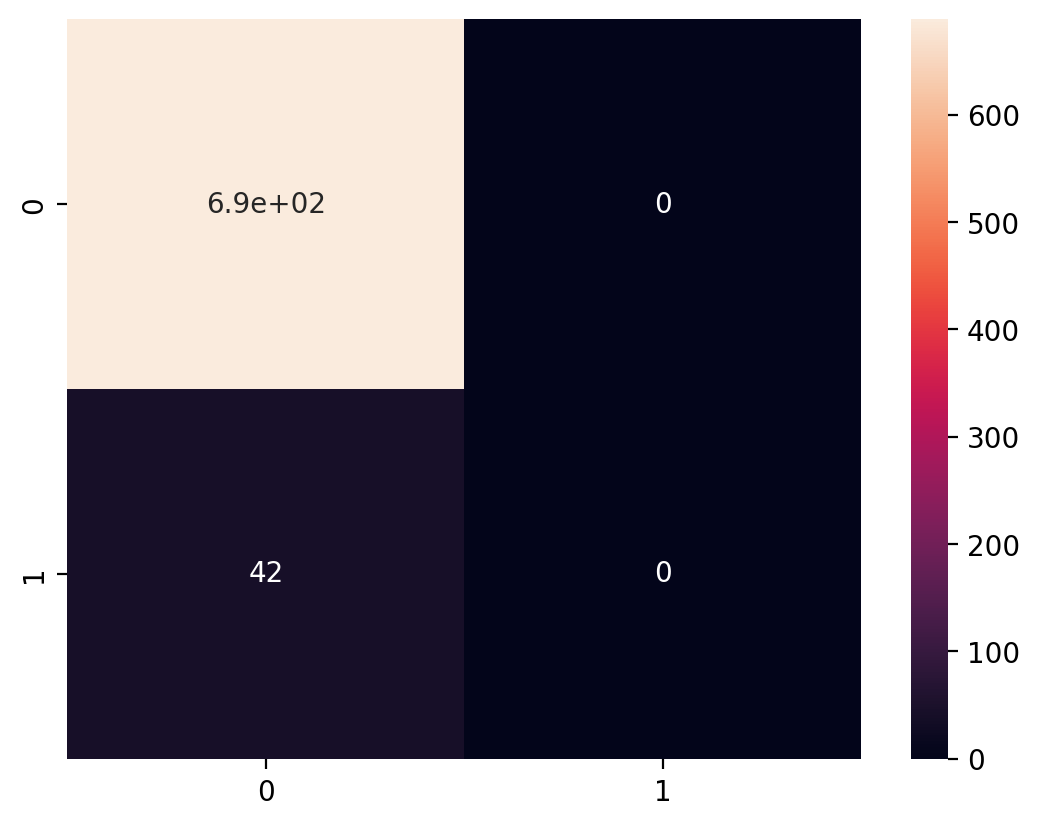

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####InceptionResNet V2

In [ ]:
inceptionresnet=tf.keras.applications.InceptionResNetV2(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in inceptionresnet.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(inceptionresnet, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_14 (TimeDi  (None, 1, 5, 5, 1536)    54336736  
 stributed)                                                      
                                                                 
 time_distributed_15 (TimeDi  (None, 1, 38400)         0         
 stributed)                                                      
                                                                 
 lstm_7 (LSTM)               (None, 256)               39584768  
                                                                 
 dense_14 (Dense)            (None, 64)                16448     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
89/89 [==============================] - 41s 277ms/step - loss: 6.1622 - root_mean_squared_error: 2.4824 - val_loss: 0.0290 - val_root_mean_squared_error: 0.1702
Epoch 2/50
89/89 [==============================] - 18s 204ms/step - loss: 0.1937 - root_mean_squared_error: 0.4402 - val_loss: 0.0278 - val_root_mean_squared_error: 0.1667
Epoch 3/50
89/89 [==============================] - 18s 202ms/step - loss: 0.1912 - root_mean_squared_error: 0.4373 - val_loss: 0.0278 - val_root_mean_squared_error: 0.1666
Epoch 4/50
89/89 [==============================] - 18s 201ms/step - loss: 0.1934 - root_mean_squared_error: 0.4398 - val_loss: 0.0277 - val_root_mean_squared_error: 0.1663
Epoch 5/50
89/89 [==============================] - 18s 201ms/step - loss: 0.1642 - root_mean_squared_error: 0.4052 - val_loss: 0.0272 - val_root_mean_squared_error: 0.1650
Epoch 6/50
89/89 [==============================] - 18s 202ms/step - loss: 0.1655 - root_mean_squared_error: 0.4069 - val_loss: 0.0273 

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 9s 164ms/step


predictions  actuals
0       0.045125      0.0
1       0.149246      0.0
2       0.098872      0.0
3       0.088427      0.0
4       0.122790      0.0
..           ...      ...
726     0.103751      1.0
727     0.119104      1.0
728     0.075514      1.0
729     0.120149      1.0
730     0.158167      1.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            0.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      1.0
727          0.0      1.0
728          0.0      1.0
729          0.0      1.0
730          0.0      1.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            0.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      1.0
727          0.0      1.0
728          0.0      1.0
729          0.0      1.0
730          0.0      1.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       689
         1.0       0.00      0.00      0.00        42

    accuracy                           0.94       731
   macro avg       0.47      0.50      0.49       731
weighted avg       0.89      0.94      0.91       731



<Axes: >

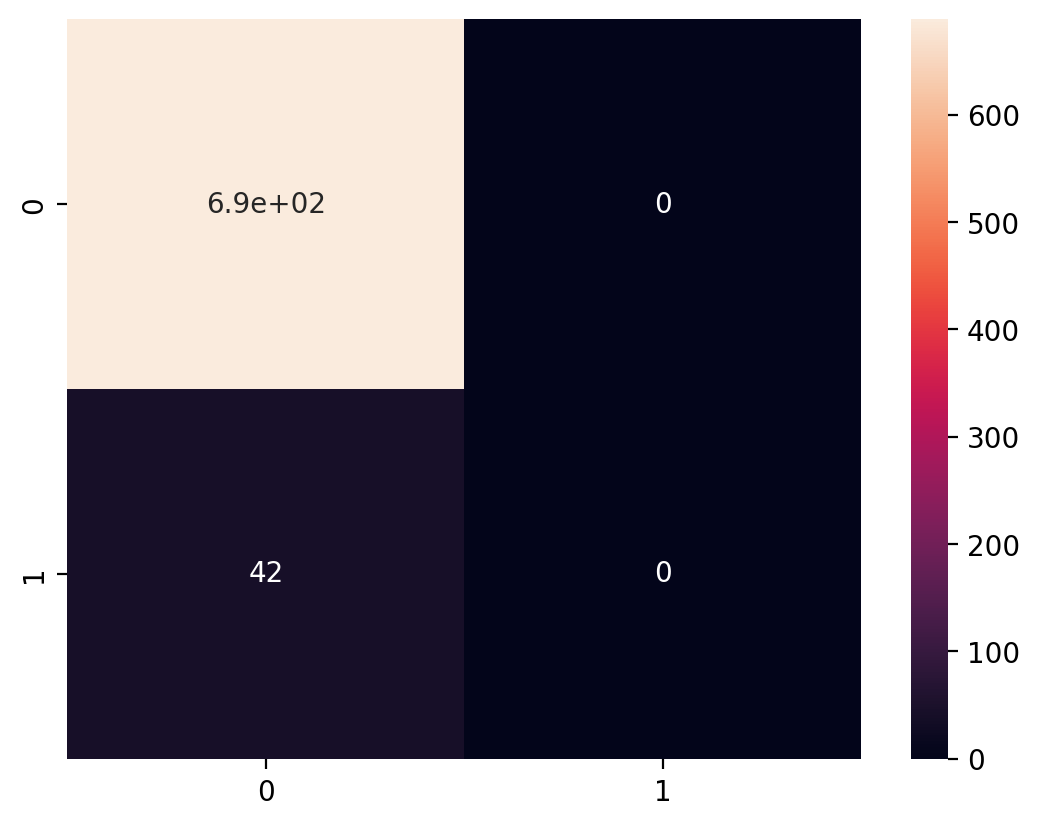

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####VGG16

In [ ]:
vgg16=tf.keras.applications.VGG16(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in vgg16.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(vgg16, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_16 (TimeDi  (None, 1, 7, 7, 512)     14714688  
 stributed)                                                      
                                                                 
 time_distributed_17 (TimeDi  (None, 1, 25088)         0         
 stributed)                                                      
                                                                 
 lstm_8 (LSTM)               (None, 256)               25953280  
                                                                 
 dense_16 (Dense)            (None, 64)                16448     
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
89/89 [==============================] - 14s 119ms/step - loss: 0.4393 - root_mean_squared_error: 0.6628 - val_loss: 0.0305 - val_root_mean_squared_error: 0.1746
Epoch 2/50
89/89 [==============================] - 8s 93ms/step - loss: 1.3800 - root_mean_squared_error: 1.1747 - val_loss: 0.0291 - val_root_mean_squared_error: 0.1707
Epoch 3/50
89/89 [==============================] - 8s 95ms/step - loss: 0.1611 - root_mean_squared_error: 0.4014 - val_loss: 0.0298 - val_root_mean_squared_error: 0.1727
Epoch 4/50
89/89 [==============================] - 8s 95ms/step - loss: 0.1267 - root_mean_squared_error: 0.3559 - val_loss: 0.0439 - val_root_mean_squared_error: 0.2096
Epoch 5/50
89/89 [==============================] - 8s 95ms/step - loss: 0.1170 - root_mean_squared_error: 0.3420 - val_loss: 0.0272 - val_root_mean_squared_error: 0.1648
Epoch 6/50
89/89 [==============================] - 8s 94ms/step - loss: 0.1008 - root_mean_squared_error: 0.3175 - val_loss: 0.0270 - val_root

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 3s 132ms/step


predictions  actuals
0       0.503795      0.0
1       0.503795      0.0
2       0.503795      0.0
3       0.503795      0.0
4       0.503795      0.0
..           ...      ...
726     0.503795      1.0
727     0.503795      1.0
728     0.503795      1.0
729     0.503795      1.0
730     0.503795      1.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results

predictions  actuals
0            1.0      0.0
1            1.0      0.0
2            1.0      0.0
3            1.0      0.0
4            1.0      0.0
..           ...      ...
726          1.0      1.0
727          1.0      1.0
728          1.0      1.0
729          1.0      1.0
730          1.0      1.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results

predictions  actuals
0            1.0      0.0
1            1.0      0.0
2            1.0      0.0
3            1.0      0.0
4            1.0      0.0
..           ...      ...
726          1.0      1.0
727          1.0      1.0
728          1.0      1.0
729          1.0      1.0
730          1.0      1.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       689
         1.0       0.06      1.00      0.11        42

    accuracy                           0.06       731
   macro avg       0.03      0.50      0.05       731
weighted avg       0.00      0.06      0.01       731



<Axes: >

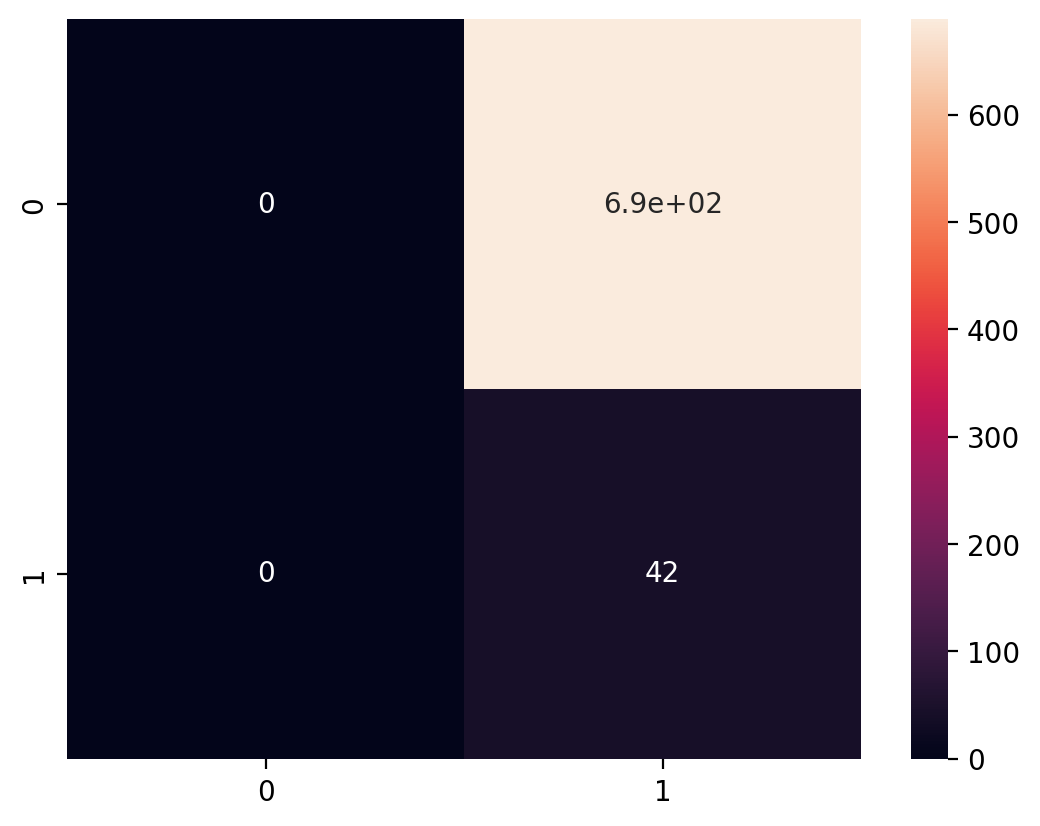

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

###with feature importance (xgboost feature importance)

In [ ]:
#Function to turn tabular data into image data
def data_to_image3(data):
    data_images = []
    font1 = ImageFont.truetype("arial.ttf", size=35)
    font2 = ImageFont.truetype("arial.ttf", size=30)
    font3 = ImageFont.truetype("arial.ttf", size=25)
    font4 = ImageFont.truetype("arial.ttf", size=20)
    font5 = ImageFont.truetype("arial.ttf", size=15)
    for dat in data:
        background = np.array([[0 for _ in range(224)] for _ in range(224)], dtype='uint8')
        image = Image.fromarray(background)
        draw = ImageDraw.Draw(image)
        draw.text((10, 10), str(dat[4]), fill='white', font=font1)
        draw.text((10, 45), str(dat[5]), fill='white', font=font2)
        draw.text((10, 80), str(dat[9]), fill='white', font=font3)
        draw.text((10, 115), str(dat[6]), fill='white', font=font4)
        draw.text((10, 150), str(dat[17]), fill='white', font=font4)
        draw.text((10, 185), str(dat[7]), fill='white', font=font4)
        draw.text((90, 10), str(dat[8]), fill='white', font=font4)
        draw.text((90, 45), str(dat[3]), fill='white', font=font4)
        draw.text((90, 80), str(dat[15]), fill='white', font=font4)
        draw.text((90, 115), str(dat[13]), fill='white', font=font4)
        draw.text((90, 150), str(dat[14]), fill='white', font=font4)
        draw.text((90, 185), str(dat[12]), fill='white', font=font4)
        draw.text((170, 10), str(dat[11]), fill='white', font=font4)
        draw.text((170, 45), str(dat[10]), fill='white', font=font4)
        draw.text((170, 80), str(dat[16]), fill='white', font=font4)
        draw.text((170, 115), str(dat[2]), fill='white', font=font4)
        draw.text((170, 150), str(dat[1]), fill='white', font=font4)
        draw.text((170, 185), str(dat[0]), fill='white', font=font5)
        rgb = [np.array(image, dtype='uint8') for _ in range(3)]
        data_images.append(rgb)
    return np.array(data_images) / 255

(584, 3, 224, 224)
(146, 3, 224, 224)


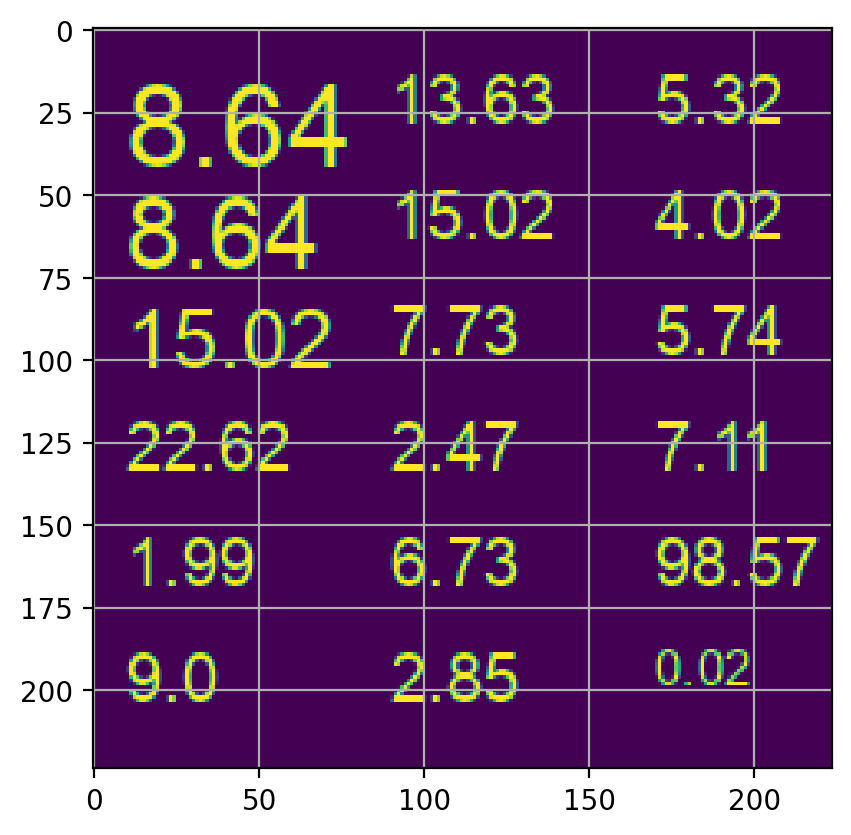

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
X_test, y_test = X_test, y_test

train_images3 = data_to_image3(X_train)
val_images3 = data_to_image3(X_val)
test_images3 = data_to_image3(X_test)

print(train_images3.shape)
print(val_images3.shape)
print(test_images3.shape)
plt.grid()
plt.imshow(train_images3[0][0, :, :])

In [ ]:
 X_train = np.asarray(train_images3)

In [ ]:
X_train = np.transpose(X_train, (0, 2, 3, 1))
X_train.shape

(584, 224, 224, 3)

In [ ]:
 X_val = np.asarray(val_images3)

In [ ]:
X_val = np.transpose(X_val, (0, 2, 3, 1))
X_val.shape

(146, 224, 224, 3)

In [ ]:
 X_test = np.asarray(test_images3)

In [ ]:
X_test = np.transpose(X_test, (0, 2, 3, 1))
X_test.shape

(731, 224, 224, 3)

In [ ]:
X_train_copy = X_train.reshape((584,1,224,224,3))
X_val_copy = X_val.reshape((146,1,224,224,3))
X_test_copy = X_test.reshape((731,1,224,224,3))

In [ ]:
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

####ResNet50

In [ ]:
resnet50=tf.keras.applications.ResNet50(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in resnet50.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(resnet50, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_6 (TimeDis  (None, 1, 7, 7, 2048)    23587712  
 tributed)                                                       
                                                                 
 time_distributed_7 (TimeDis  (None, 1, 100352)        0         
 tributed)                                                       
                                                                 
 lstm_3 (LSTM)               (None, 256)               103023616 
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 12s 195ms/step - loss: 19.1633 - root_mean_squared_error: 4.3776 - val_loss: 0.0735 - val_root_mean_squared_error: 0.2712
Epoch 2/50
37/37 [==============================] - 5s 146ms/step - loss: 0.0590 - root_mean_squared_error: 0.2429 - val_loss: 0.0284 - val_root_mean_squared_error: 0.1686
Epoch 3/50
37/37 [==============================] - 6s 149ms/step - loss: 0.0323 - root_mean_squared_error: 0.1797 - val_loss: 0.0275 - val_root_mean_squared_error: 0.1657
Epoch 4/50
37/37 [==============================] - 6s 150ms/step - loss: 0.0294 - root_mean_squared_error: 0.1714 - val_loss: 0.0267 - val_root_mean_squared_error: 0.1633
Epoch 5/50
37/37 [==============================] - 5s 147ms/step - loss: 0.0285 - root_mean_squared_error: 0.1689 - val_loss: 0.0267 - val_root_mean_squared_error: 0.1635
Epoch 6/50
37/37 [==============================] - 5s 146ms/step - loss: 0.0291 - root_mean_squared_error: 0.1705 - val_loss: 0.0266 - va

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 4s 97ms/step


predictions  actuals
0       0.005185      0.0
1       0.007339      0.0
2       0.005821      0.0
3       0.005524      0.0
4       0.004313      0.0
..           ...      ...
726     0.004505      1.0
727     0.004413      1.0
728     0.005766      1.0
729     0.009133      1.0
730     0.009017      1.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            0.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      1.0
727          0.0      1.0
728          0.0      1.0
729          0.0      1.0
730          0.0      1.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            0.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      1.0
727          0.0      1.0
728          0.0      1.0
729          0.0      1.0
730          0.0      1.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       689
         1.0       0.00      0.00      0.00        42

    accuracy                           0.94       731
   macro avg       0.47      0.50      0.49       731
weighted avg       0.89      0.94      0.91       731



<Axes: >

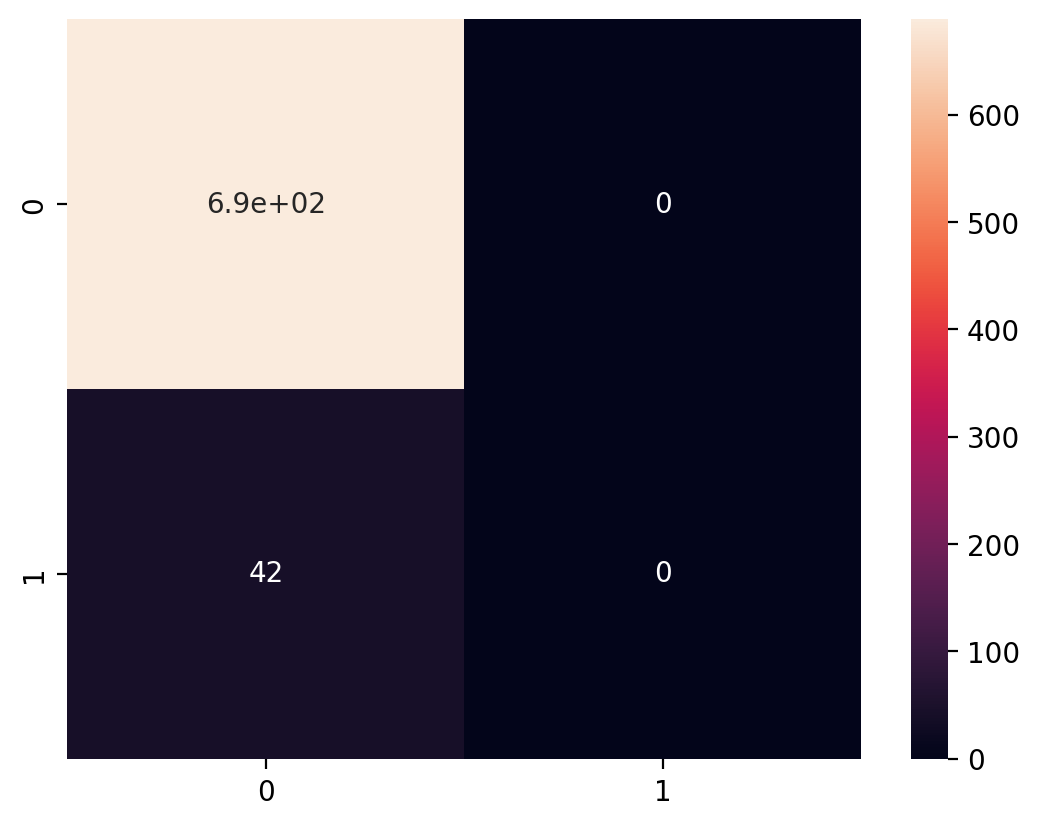

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####InceptionResNet V2

In [ ]:
inceptionresnet=tf.keras.applications.InceptionResNetV2(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in inceptionresnet.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(inceptionresnet, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_8 (TimeDis  (None, 1, 5, 5, 1536)    54336736  
 tributed)                                                       
                                                                 
 time_distributed_9 (TimeDis  (None, 1, 38400)         0         
 tributed)                                                       
                                                                 
 lstm_4 (LSTM)               (None, 256)               39584768  
                                                                 
 dense_8 (Dense)             (None, 64)                16448     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 29s 383ms/step - loss: 14.7693 - root_mean_squared_error: 3.8431 - val_loss: 0.0537 - val_root_mean_squared_error: 0.2318
Epoch 2/50
37/37 [==============================] - 8s 223ms/step - loss: 0.1177 - root_mean_squared_error: 0.3431 - val_loss: 0.0293 - val_root_mean_squared_error: 0.1710
Epoch 3/50
37/37 [==============================] - 8s 227ms/step - loss: 0.0347 - root_mean_squared_error: 0.1864 - val_loss: 0.0269 - val_root_mean_squared_error: 0.1641
Epoch 4/50
37/37 [==============================] - 8s 225ms/step - loss: 0.0294 - root_mean_squared_error: 0.1716 - val_loss: 0.0268 - val_root_mean_squared_error: 0.1636
Epoch 5/50
37/37 [==============================] - 8s 223ms/step - loss: 0.0283 - root_mean_squared_error: 0.1682 - val_loss: 0.0270 - val_root_mean_squared_error: 0.1642
Epoch 6/50
37/37 [==============================] - 8s 220ms/step - loss: 0.0289 - root_mean_squared_error: 0.1699 - val_loss: 0.0268 - va

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 10s 167ms/step


predictions  actuals
0      -0.000570      0.0
1       0.001610      0.0
2       0.010980      0.0
3       0.002911      0.0
4      -0.010486      0.0
..           ...      ...
726     0.003153      1.0
727     0.012371      1.0
728     0.005359      1.0
729    -0.000758      1.0
730    -0.001165      1.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            0.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      1.0
727          0.0      1.0
728          0.0      1.0
729          0.0      1.0
730          0.0      1.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            0.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      1.0
727          0.0      1.0
728          0.0      1.0
729          0.0      1.0
730          0.0      1.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       689
         1.0       0.00      0.00      0.00        42

    accuracy                           0.94       731
   macro avg       0.47      0.50      0.49       731
weighted avg       0.89      0.94      0.91       731



<Axes: >

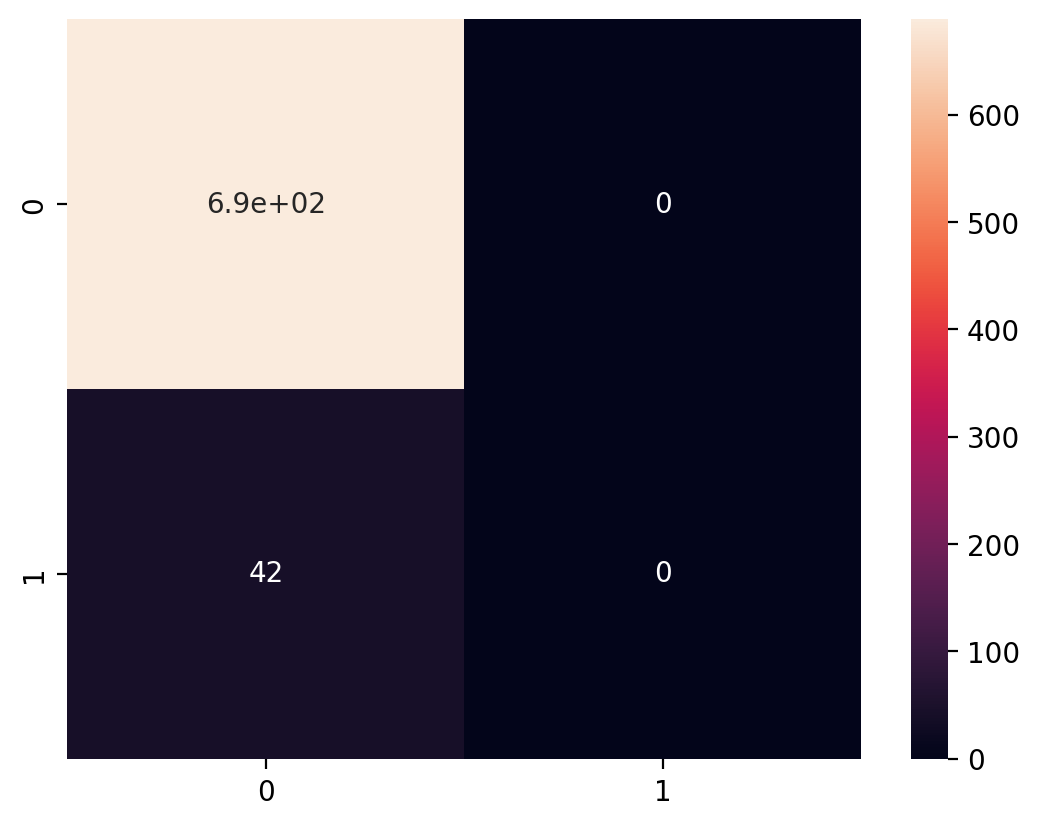

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####VGG16

In [ ]:
vgg16=tf.keras.applications.VGG16(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in vgg16.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(vgg16, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_10 (TimeDi  (None, 1, 7, 7, 512)     14714688  
 stributed)                                                      
                                                                 
 time_distributed_11 (TimeDi  (None, 1, 25088)         0         
 stributed)                                                      
                                                                 
 lstm_5 (LSTM)               (None, 256)               25953280  
                                                                 
 dense_10 (Dense)            (None, 64)                16448     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 7s 135ms/step - loss: 0.3053 - root_mean_squared_error: 0.5526 - val_loss: 0.0798 - val_root_mean_squared_error: 0.2825
Epoch 2/50
37/37 [==============================] - 4s 119ms/step - loss: 0.0308 - root_mean_squared_error: 0.1756 - val_loss: 0.0268 - val_root_mean_squared_error: 0.1636
Epoch 3/50
37/37 [==============================] - 4s 120ms/step - loss: 0.0284 - root_mean_squared_error: 0.1686 - val_loss: 0.0267 - val_root_mean_squared_error: 0.1633
Epoch 4/50
37/37 [==============================] - 4s 121ms/step - loss: 0.0285 - root_mean_squared_error: 0.1687 - val_loss: 0.0267 - val_root_mean_squared_error: 0.1633
Epoch 5/50
37/37 [==============================] - 5s 122ms/step - loss: 0.0285 - root_mean_squared_error: 0.1687 - val_loss: 0.0267 - val_root_mean_squared_error: 0.1633
Epoch 6/50
37/37 [==============================] - 4s 122ms/step - loss: 0.0286 - root_mean_squared_error: 0.1692 - val_loss: 0.0267 - val_

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 4s 155ms/step


predictions  actuals
0       0.030831      0.0
1       0.030831      0.0
2       0.030831      0.0
3       0.030831      0.0
4       0.030831      0.0
..           ...      ...
726     0.030831      1.0
727     0.030831      1.0
728     0.030831      1.0
729     0.030831      1.0
730     0.030831      1.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            0.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      1.0
727          0.0      1.0
728          0.0      1.0
729          0.0      1.0
730          0.0      1.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            0.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      1.0
727          0.0      1.0
728          0.0      1.0
729          0.0      1.0
730          0.0      1.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       689
         1.0       0.00      0.00      0.00        42

    accuracy                           0.94       731
   macro avg       0.47      0.50      0.49       731
weighted avg       0.89      0.94      0.91       731



<Axes: >

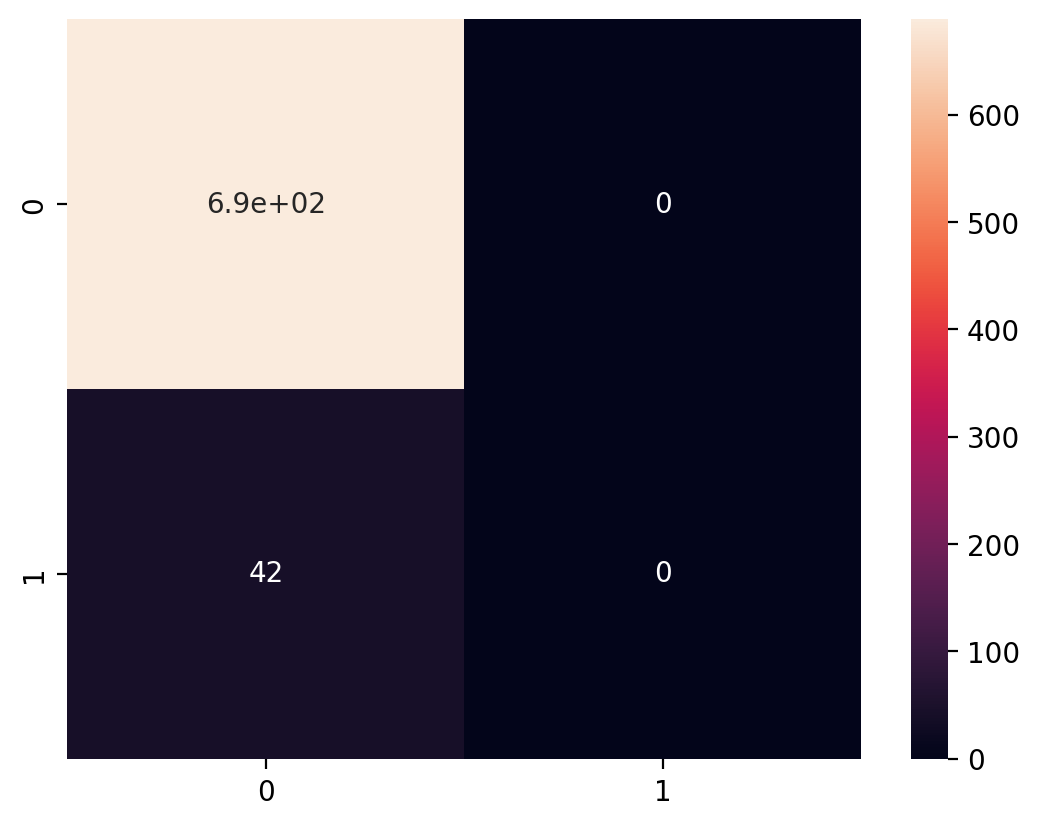

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

###Oversampling 1:1 (WITH feature importance)

In [ ]:
#Function to turn tabular data into image data
def data_to_image3(data):
    data_images = []
    font1 = ImageFont.truetype("arial.ttf", size=35)
    font2 = ImageFont.truetype("arial.ttf", size=30)
    font3 = ImageFont.truetype("arial.ttf", size=25)
    font4 = ImageFont.truetype("arial.ttf", size=20)
    font5 = ImageFont.truetype("arial.ttf", size=15)
    for dat in data:
        background = np.array([[0 for _ in range(224)] for _ in range(224)], dtype='uint8')
        image = Image.fromarray(background)
        draw = ImageDraw.Draw(image)
        draw.text((10, 10), str(dat[4]), fill='white', font=font1)
        draw.text((10, 45), str(dat[5]), fill='white', font=font2)
        draw.text((10, 80), str(dat[9]), fill='white', font=font3)
        draw.text((10, 115), str(dat[6]), fill='white', font=font4)
        draw.text((10, 150), str(dat[17]), fill='white', font=font4)
        draw.text((10, 185), str(dat[7]), fill='white', font=font4)
        draw.text((90, 10), str(dat[8]), fill='white', font=font4)
        draw.text((90, 45), str(dat[3]), fill='white', font=font4)
        draw.text((90, 80), str(dat[15]), fill='white', font=font4)
        draw.text((90, 115), str(dat[13]), fill='white', font=font4)
        draw.text((90, 150), str(dat[14]), fill='white', font=font4)
        draw.text((90, 185), str(dat[12]), fill='white', font=font4)
        draw.text((170, 10), str(dat[11]), fill='white', font=font4)
        draw.text((170, 45), str(dat[10]), fill='white', font=font4)
        draw.text((170, 80), str(dat[16]), fill='white', font=font4)
        draw.text((170, 115), str(dat[2]), fill='white', font=font4)
        draw.text((170, 150), str(dat[1]), fill='white', font=font4)
        draw.text((170, 185), str(dat[0]), fill='white', font=font5)
        rgb = [np.array(image, dtype='uint8') for _ in range(3)]
        data_images.append(rgb)
    return np.array(data_images) / 255

####oversampling

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
X_test, y_test = X_test, y_test

In [ ]:
#ratio 1 : 1 (train, val)
sm1 = SMOTE(sampling_strategy={0:709,1:709},random_state=42,k_neighbors=5)
X_train, y_train = sm1.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

After OverSampling, the shape of train_X: (1418, 18)
After OverSampling, the shape of train_y: (1418,) 



In [ ]:
X_train = X_train.round(4)
X_train

array([[2.00000e-02, 9.85700e+01, 7.11000e+00, ..., 7.73000e+00,
        5.74000e+00, 1.99000e+00],
       [5.90000e-01, 9.71600e+01, 6.80000e+00, ..., 1.26700e+01,
        7.16000e+00, 5.51000e+00],
       [0.00000e+00, 9.93000e+01, 6.98000e+00, ..., 7.27000e+00,
        2.44000e+00, 4.82000e+00],
       ...,
       [4.75200e-01, 9.78794e+01, 1.34726e+01, ..., 5.86740e+00,
        2.81260e+00, 3.05480e+00],
       [3.20000e-02, 9.82891e+01, 1.11525e+01, ..., 5.03690e+00,
        1.63500e+00, 3.40190e+00],
       [3.29600e-01, 9.83731e+01, 9.43660e+00, ..., 7.29560e+00,
        3.39630e+00, 3.89920e+00]])

(1418, 3, 224, 224)
(146, 3, 224, 224)
(731, 3, 224, 224)


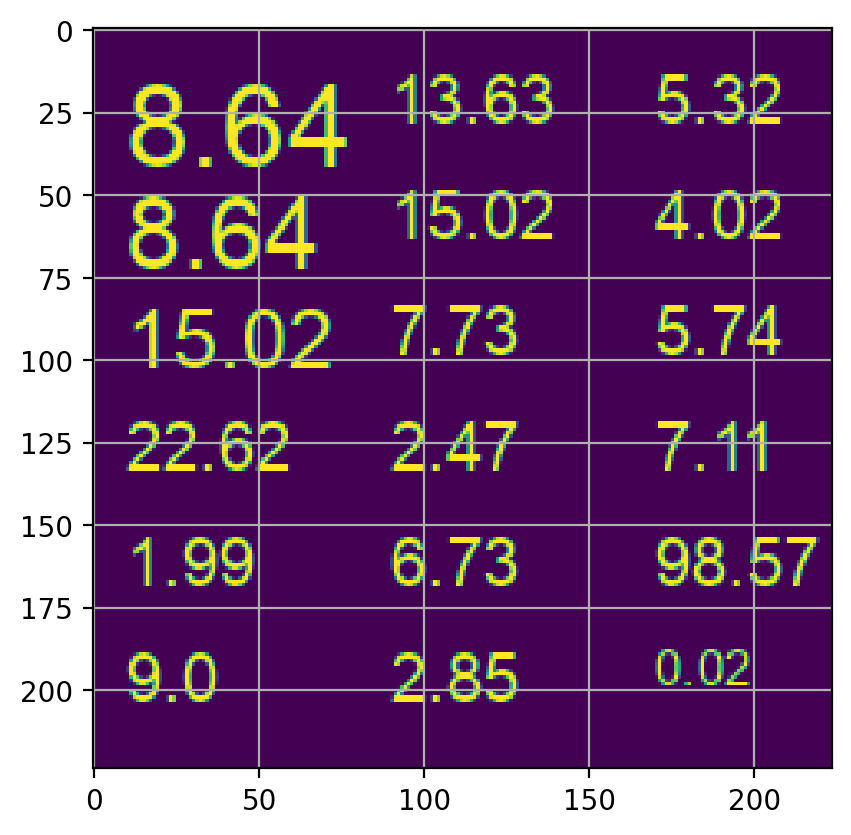

In [ ]:
train_images3 = data_to_image3(X_train)
val_images3 = data_to_image3(X_val)
test_images3 = data_to_image3(X_test)

print(train_images3.shape)
print(val_images3.shape)
print(test_images3.shape)
plt.grid()
plt.imshow(train_images3[0][0, :, :])

In [ ]:
 X_train = np.asarray(train_images3)

In [ ]:
X_train = np.transpose(X_train, (0, 2, 3, 1))
X_train.shape

(1418, 224, 224, 3)

In [ ]:
 X_val = np.asarray(val_images3)

In [ ]:
X_val = np.transpose(X_val, (0, 2, 3, 1))
X_val.shape

(146, 224, 224, 3)

In [ ]:
 X_test = np.asarray(test_images3)

In [ ]:
X_test = np.transpose(X_test, (0, 2, 3, 1))
X_test.shape

(731, 224, 224, 3)

In [ ]:
X_train_copy = X_train.reshape((1418,1,224,224,3))
X_val_copy = X_val.reshape((146,1,224,224,3))
X_test_copy = X_test.reshape((731,1,224,224,3))

In [ ]:
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

####ResNet50

In [ ]:
resnet50=tf.keras.applications.ResNet50(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in resnet50.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(resnet50, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_18 (TimeDi  (None, 1, 7, 7, 2048)    23587712  
 stributed)                                                      
                                                                 
 time_distributed_19 (TimeDi  (None, 1, 100352)        0         
 stributed)                                                      
                                                                 
 lstm_9 (LSTM)               (None, 256)               103023616 
                                                                 
 dense_18 (Dense)            (None, 64)                16448     
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
89/89 [==============================] - 21s 153ms/step - loss: 32.2390 - root_mean_squared_error: 5.6779 - val_loss: 0.0331 - val_root_mean_squared_error: 0.1818
Epoch 2/50
89/89 [==============================] - 12s 134ms/step - loss: 0.1607 - root_mean_squared_error: 0.4009 - val_loss: 0.0272 - val_root_mean_squared_error: 0.1649
Epoch 3/50
89/89 [==============================] - 12s 136ms/step - loss: 0.1535 - root_mean_squared_error: 0.3918 - val_loss: 0.0285 - val_root_mean_squared_error: 0.1687
Epoch 4/50
89/89 [==============================] - 12s 133ms/step - loss: 0.1512 - root_mean_squared_error: 0.3888 - val_loss: 0.0262 - val_root_mean_squared_error: 0.1618
Epoch 5/50
89/89 [==============================] - 12s 131ms/step - loss: 0.1292 - root_mean_squared_error: 0.3595 - val_loss: 0.0266 - val_root_mean_squared_error: 0.1632
Epoch 6/50
89/89 [==============================] - 12s 131ms/step - loss: 0.1281 - root_mean_squared_error: 0.3580 - val_loss: 0.0263

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 4s 98ms/step


predictions  actuals
0       0.149366      0.0
1       0.107658      0.0
2       0.123346      0.0
3       0.099679      0.0
4       0.094906      0.0
..           ...      ...
726     0.098858      1.0
727     0.105703      1.0
728     0.098343      1.0
729     0.094094      1.0
730     0.102090      1.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            0.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      1.0
727          0.0      1.0
728          0.0      1.0
729          0.0      1.0
730          0.0      1.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            0.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      1.0
727          0.0      1.0
728          0.0      1.0
729          0.0      1.0
730          0.0      1.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       689
         1.0       0.00      0.00      0.00        42

    accuracy                           0.94       731
   macro avg       0.47      0.50      0.49       731
weighted avg       0.89      0.94      0.91       731



<Axes: >

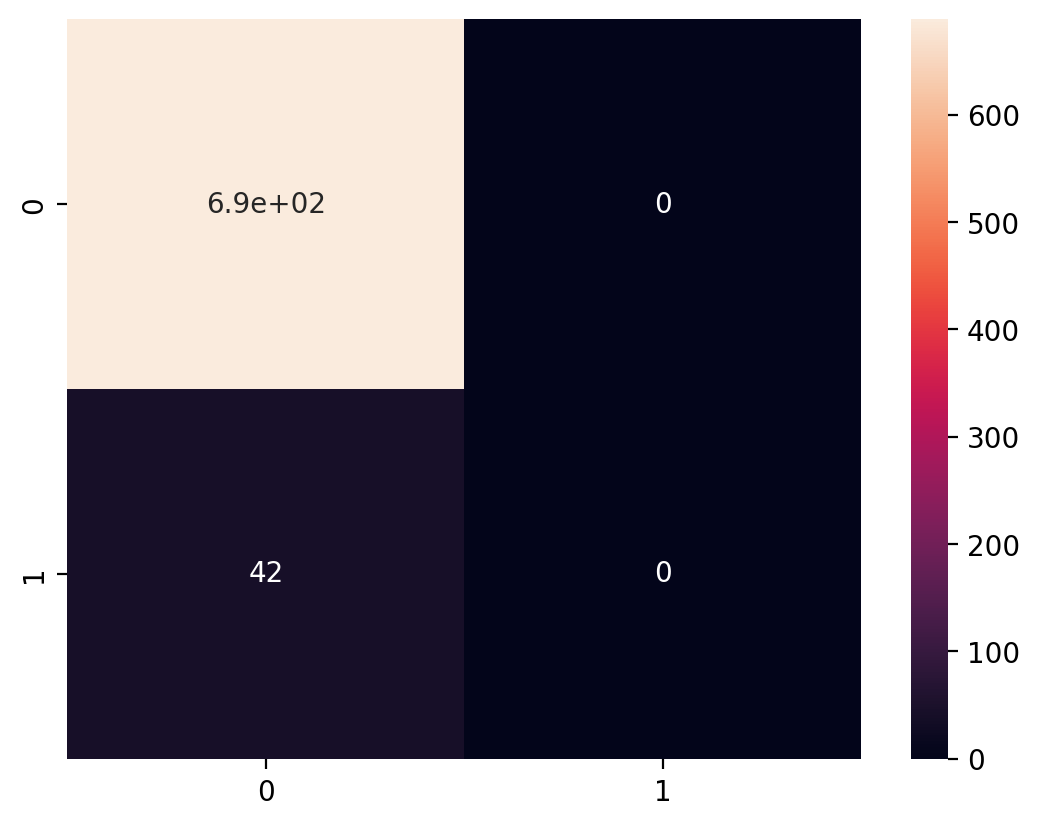

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####InceptionResNet V2

In [ ]:
inceptionresnet=tf.keras.applications.InceptionResNetV2(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in inceptionresnet.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(inceptionresnet, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_20 (TimeDi  (None, 1, 5, 5, 1536)    54336736  
 stributed)                                                      
                                                                 
 time_distributed_21 (TimeDi  (None, 1, 38400)         0         
 stributed)                                                      
                                                                 
 lstm_10 (LSTM)              (None, 256)               39584768  
                                                                 
 dense_20 (Dense)            (None, 64)                16448     
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_21 (Dense)            (None, 1)               

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
89/89 [==============================] - 41s 272ms/step - loss: 4.7469 - root_mean_squared_error: 2.1787 - val_loss: 0.0277 - val_root_mean_squared_error: 0.1666
Epoch 2/50
89/89 [==============================] - 18s 205ms/step - loss: 0.1965 - root_mean_squared_error: 0.4433 - val_loss: 0.0315 - val_root_mean_squared_error: 0.1775
Epoch 3/50
89/89 [==============================] - 18s 203ms/step - loss: 0.1908 - root_mean_squared_error: 0.4368 - val_loss: 0.0270 - val_root_mean_squared_error: 0.1643
Epoch 4/50
89/89 [==============================] - 18s 201ms/step - loss: 0.2140 - root_mean_squared_error: 0.4626 - val_loss: 0.0283 - val_root_mean_squared_error: 0.1681
Epoch 5/50
89/89 [==============================] - 18s 201ms/step - loss: 0.1911 - root_mean_squared_error: 0.4372 - val_loss: 0.0269 - val_root_mean_squared_error: 0.1640
Epoch 6/50
89/89 [==============================] - 18s 202ms/step - loss: 0.1925 - root_mean_squared_error: 0.4387 - val_loss: 0.0311 

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 9s 163ms/step


predictions  actuals
0       0.128836      0.0
1       0.179655      0.0
2       0.178717      0.0
3       0.172229      0.0
4       0.166457      0.0
..           ...      ...
726     0.159890      1.0
727     0.173833      1.0
728     0.167085      1.0
729     0.189752      1.0
730     0.202285      1.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            0.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      1.0
727          0.0      1.0
728          0.0      1.0
729          0.0      1.0
730          0.0      1.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            0.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      1.0
727          0.0      1.0
728          0.0      1.0
729          0.0      1.0
730          0.0      1.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       689
         1.0       0.00      0.00      0.00        42

    accuracy                           0.94       731
   macro avg       0.47      0.50      0.48       731
weighted avg       0.89      0.94      0.91       731



<Axes: >

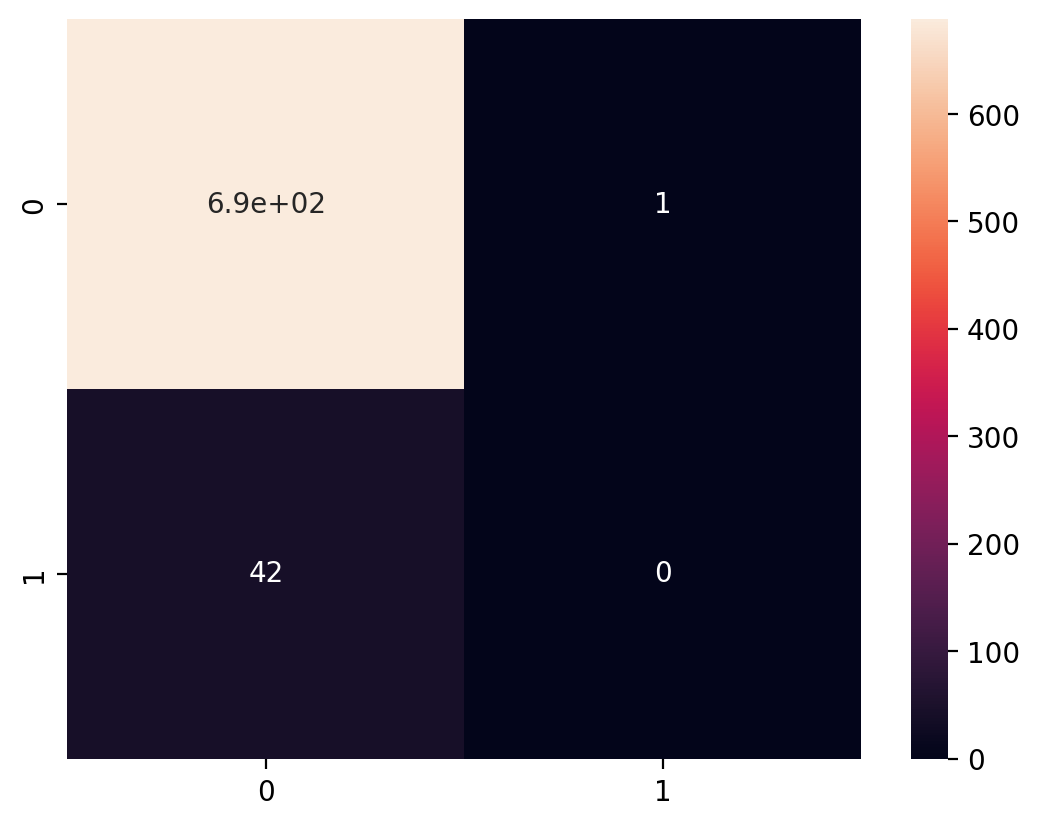

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####VGG16

In [ ]:
vgg16=tf.keras.applications.VGG16(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in vgg16.layers[:-4]:                                                       
    layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model = Sequential()
model.add(TimeDistributed(vgg16, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 7, 7, 512)     14714688  
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 25088)         0         
 tributed)                                                       
                                                                 
 lstm (LSTM)                 (None, 256)               25953280  
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
89/89 [==============================] - 16s 31ms/step - loss: 0.4961 - root_mean_squared_error: 0.7043 - val_loss: 0.0919 - val_root_mean_squared_error: 0.3031
Epoch 2/50
89/89 [==============================] - 1s 16ms/step - loss: 0.1498 - root_mean_squared_error: 0.3870 - val_loss: 0.0281 - val_root_mean_squared_error: 0.1677
Epoch 3/50
89/89 [==============================] - 1s 16ms/step - loss: 0.1190 - root_mean_squared_error: 0.3450 - val_loss: 0.0307 - val_root_mean_squared_error: 0.1752
Epoch 4/50
89/89 [==============================] - 1s 16ms/step - loss: 0.1121 - root_mean_squared_error: 0.3349 - val_loss: 0.0270 - val_root_mean_squared_error: 0.1644
Epoch 5/50
89/89 [==============================] - 1s 16ms/step - loss: 0.0918 - root_mean_squared_error: 0.3030 - val_loss: 0.0369 - val_root_mean_squared_error: 0.1921
Epoch 6/50
89/89 [==============================] - 1s 16ms/step - loss: 0.0709 - root_mean_squared_error: 0.2663 - val_loss: 0.0257 - val_root_

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 2s 53ms/step


predictions  actuals
0       0.047878      0.0
1       0.028030      0.0
2       0.016195      0.0
3       0.020835      0.0
4       0.020216      0.0
..           ...      ...
726     0.013242      1.0
727     0.043238      1.0
728     0.035833      1.0
729     0.028628      1.0
730     0.026078      1.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            0.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      1.0
727          0.0      1.0
728          0.0      1.0
729          0.0      1.0
730          0.0      1.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results

predictions  actuals
0            0.0      0.0
1            0.0      0.0
2            0.0      0.0
3            0.0      0.0
4            0.0      0.0
..           ...      ...
726          0.0      1.0
727          0.0      1.0
728          0.0      1.0
729          0.0      1.0
730          0.0      1.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       689
         1.0       0.00      0.00      0.00        42

    accuracy                           0.94       731
   macro avg       0.47      0.50      0.48       731
weighted avg       0.89      0.94      0.91       731



<Axes: >

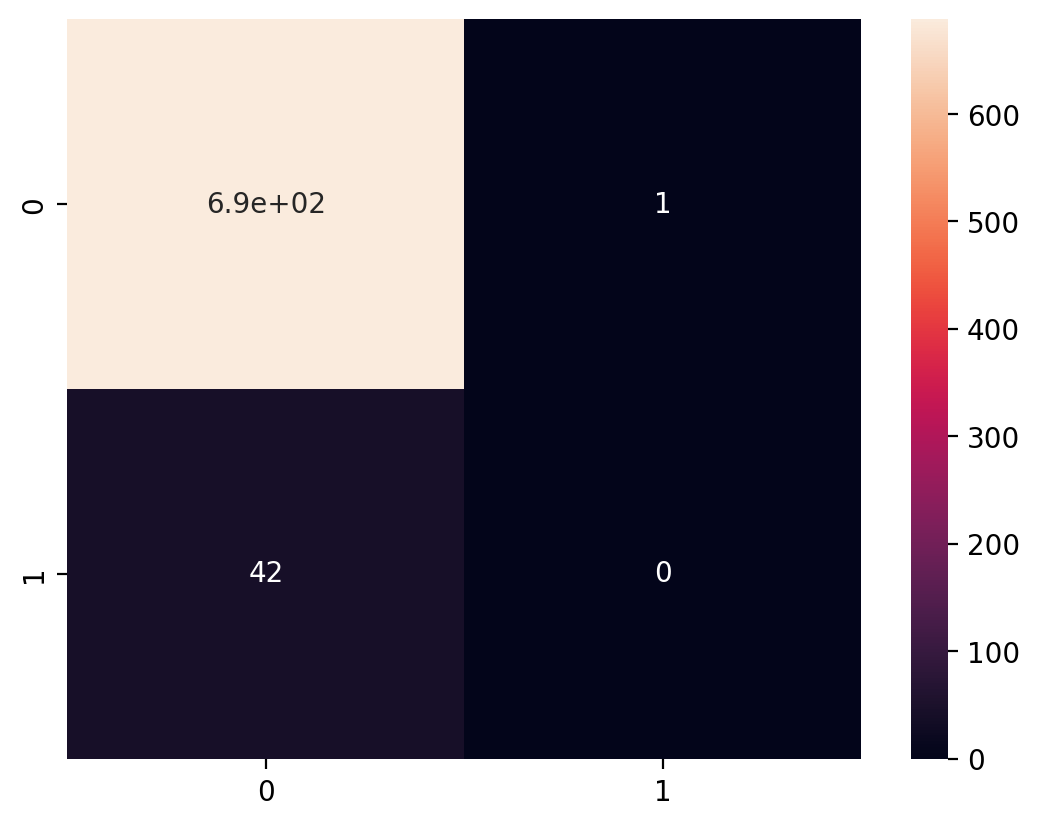

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

##Los Angeles, California

###train

In [ ]:
los_angeles = train[train['fips']==6037]

#using interpolation to fill in the NaN values
los_angeles = los_angeles.interpolate().fillna(method='bfill')
los_angeles.score[los_angeles.score <0.5] = 0
los_angeles.score[(los_angeles.score >=0.5)&(los_angeles.score<1.5)] = 1
los_angeles.score[(los_angeles.score >=1.5)&(los_angeles.score<2.5)] = 2
los_angeles.score[(los_angeles.score >=2.5)&(los_angeles.score<3.5)] = 3
los_angeles.score[(los_angeles.score >=3.5)&(los_angeles.score<4.5)] = 4
los_angeles.score[(los_angeles.score >=4.5)&(los_angeles.score<5.5)] = 5
los_angeles

fips        date  PRECTOT     PS  QV2M   T2M  T2MDEW  T2MWET  \
9296370  29097  2000-01-01     0.24  97.47  5.89  7.79    5.52    5.52   
9296371  29097  2000-01-02     0.42  97.23  6.46  9.61    6.66    6.66   
9296372  29097  2000-01-03    12.93  97.14  4.46  3.04    1.67    1.67   
9296373  29097  2000-01-04     0.06  98.74  2.05 -3.87   -8.21   -8.07   
9296374  29097  2000-01-05     0.03  98.39  2.64 -0.08   -5.03   -4.96   
...        ...         ...      ...    ...   ...   ...     ...     ...   
9302575  29097  2016-12-27     0.05  98.69  2.74  2.19   -4.59   -4.49   
9302576  29097  2016-12-28     0.00  97.84  4.42  5.33    1.52    1.53   
9302577  29097  2016-12-29     0.00  99.01  2.48  1.81   -5.74   -5.60   
9302578  29097  2016-12-30     0.00  98.26  2.27  3.27   -6.87   -6.67   
9302579  29097  2016-12-31     0.00  97.32  3.55  4.49   -1.44   -1.40   

         T2M_MAX  T2M_MIN  T2M_RANGE    TS  WS10M  WS10M_MAX  WS10M_MIN  \
9296370    15.11     1.73      13.38  7.07   5.90       7.69       4.22   
9296371    12.44     2.34      10.10  8.21   5.48       9.26       1.41   
9296372     7.67    -0.41       8.07  3.06   5.35       7.68       3.36   
9296373    -0.71    -6.73       6.01 -3.59   5.67       8.69       1.57   
9296374     6.38    -5.13      11.51 -0.48   6.50      10.02       2.20   
...          ...      ...        ...   ...    ...        ...        ...   
9302575     9.52    -2.46      11.97  1.14   2.17       4.65       0.12   
9302576    13.14     0.61      12.53  4.79   5.10       7.48       3.25   
9302577     9.15    -2.86      12.01  1.20   5.71       8.90       3.80   
9302578    11.76    -4.07      15.82  2.59   6.45       9.99       2.87   
9302579    10.78    -1.69      12.47  4.10   4.90       8.84       2.67   

         WS10M_RANGE  WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE  score  
9296370         3.47   9.28      11.41       6.46         4.95    0.0  
9296371         7.85   7.90      13.20       2.03        11.17    0.0  
9296372         4.31   7.21      10.04       5.32         4.72    0.0  
9296373         7.13   7.52      11.26       2.52         8.73    0.0  
9296374         7.83   9.53      12.73       4.10         8.63    0.0  
...              ...    ...        ...        ...          ...    ...  
9302575         4.53   3.70       9.51       0.27         9.25    1.0  
9302576         4.24   8.51      10.07       5.98         4.10    1.0  
9302577         5.11   9.46      11.10       6.98         4.13    1.0  
9302578         7.12   9.84      13.87       5.59         8.29    1.0  
9302579         6.17   7.93      13.15       4.49         8.66    1.0  

[6210 rows x 21 columns]

###validation

In [ ]:
la_val = validation[validation['fips']==6037]

#using interpolation to fill in the NaN values
la_val = la_val.interpolate().fillna(method='bfill')
la_val.score[la_val.score <0.5] = 0
la_val.score[(la_val.score >=0.5)&(la_val.score<1.5)] = 1
la_val.score[(la_val.score >=1.5)&(la_val.score<2.5)] = 2
la_val.score[(la_val.score >=2.5)&(la_val.score<3.5)] = 3
la_val.score[(la_val.score >=3.5)&(la_val.score<4.5)] = 4
la_val.score[(la_val.score >=4.5)&(la_val.score<5.5)] = 5

la_val.head()

fips        date  PRECTOT     PS  QV2M    T2M  T2MDEW  T2MWET  \
127750  6037  2017-01-01     0.16  94.61  5.28   7.08    3.64    3.65   
127751  6037  2017-01-02     0.54  95.05  6.03   7.52    5.70    5.70   
127752  6037  2017-01-03     0.06  95.36  6.06   8.26    5.81    5.81   
127753  6037  2017-01-04     3.74  95.22  7.04   9.07    7.92    7.92   
127754  6037  2017-01-05     8.11  94.87  8.17  10.95   10.02   10.02   

        T2M_MAX  T2M_MIN  T2M_RANGE     TS  WS10M  WS10M_MAX  WS10M_MIN  \
127750    12.71     3.14       9.57   7.82   3.51       4.56       2.56   
127751     9.03     6.51       2.52   7.78   2.80       4.60       1.37   
127752    11.57     6.51       5.06   7.98   1.36       2.93       0.52   
127753    11.64     6.58       5.07   8.85   2.46       4.68       0.33   
127754    14.79     6.86       7.93  10.95   3.99       6.35       2.31   

        WS10M_RANGE  WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE  score  
127750         1.99   4.74       5.88       2.89         2.99    5.0  
127751         3.23   3.68       5.20       2.24         2.97    5.0  
127752         2.41   1.82       3.28       0.83         2.45    5.0  
127753         4.35   3.27       5.41       0.46         4.95    5.0  
127754         4.04   5.74       7.76       3.66         4.10    4.0

In [ ]:
la_val['score'].value_counts()

2.0    357
3.0    352
4.0     17
5.0      4
Name: score, dtype: int64

In [ ]:
la_val = la_val.round(4)

In [ ]:
X = la_val[['PRECTOT', 'PS','QV2M','T2M','T2MDEW','T2MWET', 'T2M_MAX', 'T2M_MIN','T2M_RANGE','TS',
        'WS10M','WS10M_MAX','WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 
        'WS50M_RANGE']]
y = la_val['score']

###xgboost feature importance

In [ ]:
X_train = los_angeles[['PRECTOT', 'PS','QV2M','T2M','T2MDEW','T2MWET', 'T2M_MAX', 'T2M_MIN','T2M_RANGE','TS',
        'WS10M','WS10M_MAX','WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 
        'WS50M_RANGE']]
y_train = los_angeles['score']

In [ ]:
X_val = la_val[['PRECTOT', 'PS','QV2M','T2M','T2MDEW','T2MWET', 'T2M_MAX', 'T2M_MIN','T2M_RANGE','TS',
        'WS10M','WS10M_MAX','WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 
        'WS50M_RANGE']]
y_val = la_val['score']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [ ]:
model = xgboost.XGBRegressor()
model.fit(X_train_scaled,y_train)

In [ ]:
predicted_y = model.predict(X_val_scaled)

In [ ]:
predicted_y_train = model.predict(X_train_scaled)

In [ ]:
print(metrics.r2_score(y_val, predicted_y))
print(metrics.mean_squared_error(y_train,predicted_y_train))
print(metrics.mean_squared_error(y_val, predicted_y))

In [ ]:
model.get_booster().get_score(importance_type='gain')

In [ ]:
import pandas as pd
f_importance = model.get_booster().get_score(importance_type='gain')

importance_df = pd.DataFrame.from_dict(data=f_importance, 
                                       orient='index')

In [ ]:
f_importance

In [ ]:
importance_df

In [ ]:
importance_df = importance_df.sort_values(0, ascending=False)
importance_df.plot.bar()

From the highest to the lowest of the xgoost feature importance rank:
1. T2M_MIN
2. TS
3. T2MDEW
4. T2MWET
5. WS10M_RANGE
6. T2M_RANGE
7. WS50M_RANGE
8. T2M_MAX
9. T2M
10. WS50M
11. WS10M_MIN
12. WS10M_MAX
13. WS50M_MIN
14. WS50M_MAX
15. WS10M
16. QV2M
17. PS
18. PRECTOT

###test

In [ ]:
la_test = test[test['fips']==6037]

#using interpolation to fill in the NaN values
la_test = la_test.interpolate().fillna(method='bfill')
la_test.score[la_test.score <0.5] = 0
la_test.score[(la_test.score >=0.5)&(la_test.score<1.5)] = 1
la_test.score[(la_test.score >=1.5)&(la_test.score<2.5)] = 2
la_test.score[(la_test.score >=2.5)&(la_test.score<3.5)] = 3
la_test.score[(la_test.score >=3.5)&(la_test.score<4.5)] = 4
la_test.score[(la_test.score >=4.5)&(la_test.score<5.5)] = 5

la_test.head()

fips        date  PRECTOT     PS  QV2M   T2M  T2MDEW  T2MWET  T2M_MAX  \
127925  6037  2019-01-01      0.0  95.39  2.08  4.26   -8.80   -8.41    10.08   
127926  6037  2019-01-02      0.0  95.63  2.43  6.56   -6.78   -6.64    13.79   
127927  6037  2019-01-03      0.0  95.50  2.96  7.56   -4.14   -4.32    15.95   
127928  6037  2019-01-04      0.0  95.04  3.86  9.08   -0.54   -1.18    17.67   
127929  6037  2019-01-05     11.5  94.75  6.66  9.07    7.10    6.61    10.85   

        T2M_MIN  T2M_RANGE    TS  WS10M  WS10M_MAX  WS10M_MIN  WS10M_RANGE  \
127925     0.50       9.58  4.13   6.04       9.34       3.35         6.00   
127926     2.02      11.77  5.52   3.04       5.49       0.67         4.81   
127927     2.11      13.84  6.70   2.88       5.36       0.51         4.85   
127928     3.25      14.42  7.88   2.49       3.55       0.68         2.88   
127929     7.14       3.71  8.52   3.91       6.12       2.01         4.11   

        WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE  score  
127925   8.80      11.52       5.53         5.99    3.0  
127926   4.57       6.97       1.43         5.54    3.0  
127927   4.47       7.82       1.21         6.61    3.0  
127928   3.57       6.15       1.00         5.15    3.0  
127929   5.31       7.52       2.84         4.69    3.0

In [ ]:
la_test = la_test.round(4)
la_test

fips        date  PRECTOT     PS  QV2M   T2M  T2MDEW  T2MWET  T2M_MAX  \
127925  6037  2019-01-01     0.00  95.39  2.08  4.26   -8.80   -8.41    10.08   
127926  6037  2019-01-02     0.00  95.63  2.43  6.56   -6.78   -6.64    13.79   
127927  6037  2019-01-03     0.00  95.50  2.96  7.56   -4.14   -4.32    15.95   
127928  6037  2019-01-04     0.00  95.04  3.86  9.08   -0.54   -1.18    17.67   
127929  6037  2019-01-05    11.50  94.75  6.66  9.07    7.10    6.61    10.85   
...      ...         ...      ...    ...   ...   ...     ...     ...      ...   
128651  6037  2020-12-27     0.66  94.87  5.64  9.73    4.79    7.26    15.81   
128652  6037  2020-12-28    19.01  94.48  6.01  7.49    5.57    6.53     9.19   
128653  6037  2020-12-29     0.02  95.32  4.09  7.28    0.35    3.81    14.42   
128654  6037  2020-12-30     0.00  95.65  2.66  8.54   -5.59    1.48    17.11   
128655  6037  2020-12-31     0.00  94.97  4.17  8.53    0.54    4.54    15.48   

        T2M_MIN  T2M_RANGE    TS  WS10M  WS10M_MAX  WS10M_MIN  WS10M_RANGE  \
127925     0.50       9.58  4.13   6.04       9.34       3.35         6.00   
127926     2.02      11.77  5.52   3.04       5.49       0.67         4.81   
127927     2.11      13.84  6.70   2.88       5.36       0.51         4.85   
127928     3.25      14.42  7.88   2.49       3.55       0.68         2.88   
127929     7.14       3.71  8.52   3.91       6.12       2.01         4.11   
...         ...        ...   ...    ...        ...        ...          ...   
128651     7.18       8.63  9.63   2.58       3.49       1.46         2.02   
128652     5.57       3.62  7.85   4.42       7.36       0.44         6.92   
128653     3.45      10.96  7.18   4.60       6.97       3.34         3.64   
128654     2.72      14.40  7.25   3.11       4.09       1.70         2.38   
128655     3.25      12.23  8.00   5.20       8.58       2.40         6.17   

        WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE  score  
127925   8.80      11.52       5.53         5.99    3.0  
127926   4.57       6.97       1.43         5.54    3.0  
127927   4.47       7.82       1.21         6.61    3.0  
127928   3.57       6.15       1.00         5.15    3.0  
127929   5.31       7.52       2.84         4.69    3.0  
...       ...        ...        ...          ...    ...  
128651   3.87       5.03       1.99         3.04    2.0  
128652   5.67       8.79       0.69         8.10    2.0  
128653   6.60       8.73       4.69         4.04    2.0  
128654   4.68       6.87       2.05         4.82    2.0  
128655   7.59      10.30       4.03         6.27    2.0  

[731 rows x 21 columns]

In [ ]:
la_test['score'].value_counts()

0.0    559
1.0    105
2.0     57
3.0     10
Name: score, dtype: int64

In [ ]:
X_test = la_test[['PRECTOT', 'PS','QV2M','T2M','T2MDEW','T2MWET', 'T2M_MAX', 'T2M_MIN','T2M_RANGE','TS',
        'WS10M','WS10M_MAX','WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 
        'WS50M_RANGE']]
y_test = la_test['score']

In [ ]:
X = np.array(X)
X_test = np.array(X_test)

In [ ]:
y = np.array(y)
y_test = np.array(y_test)

###CNN-LSTM With SuperTML Method 

###with no feature importance

In [ ]:
#Function to turn tabular data into image data
def data_to_image(data):
    data_images = []
    font = ImageFont.truetype("arial.ttf", size=25)
    for dat in data:
        background = np.array([[0 for _ in range(224)] for _ in range(224)], dtype='uint8')
        image = Image.fromarray(background)
        draw = ImageDraw.Draw(image)
        draw.text((10, 10), str(dat[0]), fill='white', font=font)
        draw.text((10, 45), str(dat[1]), fill='white', font=font)
        draw.text((10, 80), str(dat[2]), fill='white', font=font)
        draw.text((10, 115), str(dat[3]), fill='white', font=font)
        draw.text((10, 150), str(dat[4]), fill='white', font=font)
        draw.text((10, 185), str(dat[5]), fill='white', font=font)
        draw.text((90, 10), str(dat[6]), fill='white', font=font)
        draw.text((90, 45), str(dat[7]), fill='white', font=font)
        draw.text((90, 80), str(dat[8]), fill='white', font=font)
        draw.text((90, 115), str(dat[9]), fill='white', font=font)
        draw.text((90, 150), str(dat[10]), fill='white', font=font)
        draw.text((90, 185), str(dat[11]), fill='white', font=font)
        draw.text((170, 10), str(dat[12]), fill='white', font=font)
        draw.text((170, 45), str(dat[13]), fill='white', font=font)
        draw.text((170, 80), str(dat[14]), fill='white', font=font)
        draw.text((170, 115), str(dat[15]), fill='white', font=font)
        draw.text((170, 150), str(dat[16]), fill='white', font=font)
        draw.text((170, 185), str(dat[17]), fill='white', font=font) 
        rgb = [np.array(image, dtype='uint8') for _ in range(3)]
        data_images.append(rgb)
    return np.array(data_images) / 255

(584, 3, 224, 224)
(146, 3, 224, 224)
(731, 3, 224, 224)


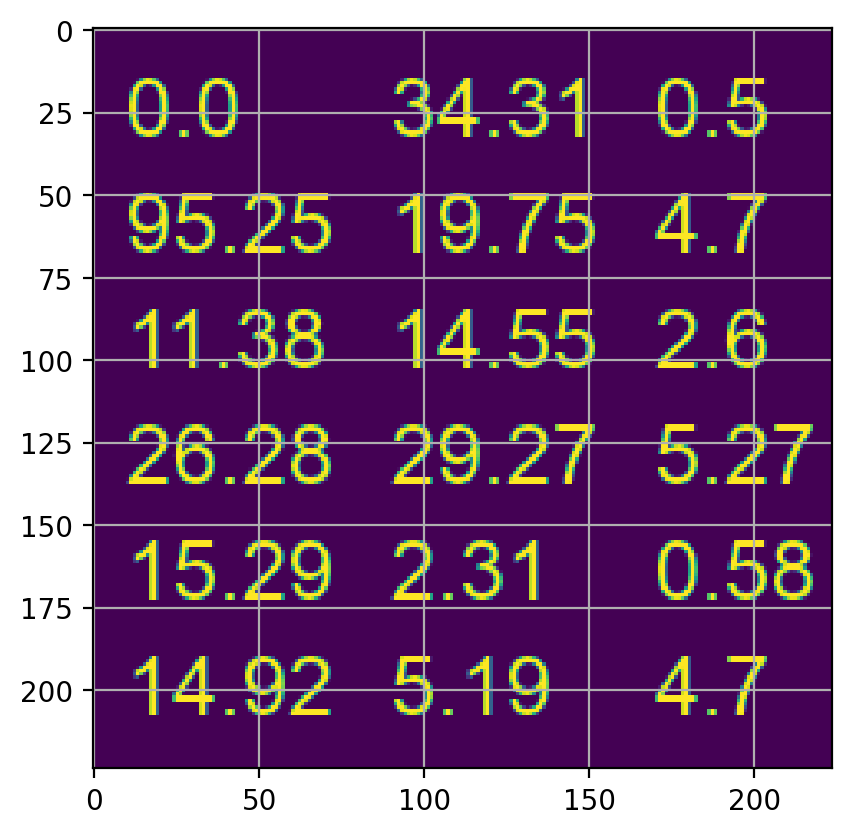

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
X_test, y_test = X_test, y_test

train_images = data_to_image(X_train)
val_images = data_to_image(X_val)
test_images = data_to_image(X_test)

print(train_images.shape)
print(val_images.shape)
print(test_images.shape)
plt.grid()
plt.imshow(train_images[0][0, :, :])

In [ ]:
 X_train = np.asarray(train_images)

In [ ]:
X_train = np.transpose(X_train, (0, 2, 3, 1))
X_train.shape

(584, 224, 224, 3)

In [ ]:
 X_val = np.asarray(val_images)

In [ ]:
X_val = np.transpose(X_val, (0, 2, 3, 1))
X_val.shape

(146, 224, 224, 3)

In [ ]:
 X_test = np.asarray(test_images)

In [ ]:
X_test = np.transpose(X_test, (0, 2, 3, 1))
X_test.shape

(731, 224, 224, 3)

In [ ]:
X_train_copy = X_train.reshape((584,1,224,224,3))
X_val_copy = X_val.reshape((146,1,224,224,3))
X_test_copy = X_test.reshape((731,1,224,224,3))

In [ ]:
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

####ResNet50

In [ ]:
resnet50=tf.keras.applications.ResNet50(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in resnet50.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(resnet50, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 7, 7, 2048)    23587712  
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 100352)        0         
 tributed)                                                       
                                                                 
 lstm (LSTM)                 (None, 256)               103023616 
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 28s 213ms/step - loss: 138.7759 - root_mean_squared_error: 11.7803 - val_loss: 0.6493 - val_root_mean_squared_error: 0.8058
Epoch 2/50
37/37 [==============================] - 5s 140ms/step - loss: 1.4689 - root_mean_squared_error: 1.2120 - val_loss: 0.5737 - val_root_mean_squared_error: 0.7574
Epoch 3/50
37/37 [==============================] - 5s 145ms/step - loss: 1.1235 - root_mean_squared_error: 1.0600 - val_loss: 0.3405 - val_root_mean_squared_error: 0.5835
Epoch 4/50
37/37 [==============================] - 5s 139ms/step - loss: 1.1677 - root_mean_squared_error: 1.0806 - val_loss: 0.5145 - val_root_mean_squared_error: 0.7173
Epoch 5/50
37/37 [==============================] - 5s 140ms/step - loss: 0.9630 - root_mean_squared_error: 0.9813 - val_loss: 0.4386 - val_root_mean_squared_error: 0.6623
Epoch 6/50
37/37 [==============================] - 5s 148ms/step - loss: 1.0365 - root_mean_squared_error: 1.0181 - val_loss: 0.7346 - 

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 3s 109ms/step


predictions  actuals
0       2.575050      3.0
1       2.416492      3.0
2       2.204138      3.0
3       2.536101      3.0
4       2.843611      3.0
..           ...      ...
726     2.806683      2.0
727     2.671745      2.0
728     2.343302      2.0
729     2.631088      2.0
730     2.639126      2.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            3.0      3.0
1            2.0      3.0
2            2.0      3.0
3            3.0      3.0
4            3.0      3.0
..           ...      ...
726          3.0      2.0
727          3.0      2.0
728          2.0      2.0
729          3.0      2.0
730          3.0      2.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            3.0      3.0
1            2.0      3.0
2            2.0      3.0
3            3.0      3.0
4            3.0      3.0
..           ...      ...
726          3.0      2.0
727          3.0      2.0
728          2.0      2.0
729          3.0      2.0
730          3.0      2.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       559
         1.0       0.00      0.00      0.00       105
         2.0       0.06      0.39      0.11        57
         3.0       0.02      0.80      0.04        10

    accuracy                           0.04       731
   macro avg       0.02      0.30      0.04       731
weighted avg       0.01      0.04      0.01       731



<AxesSubplot:>

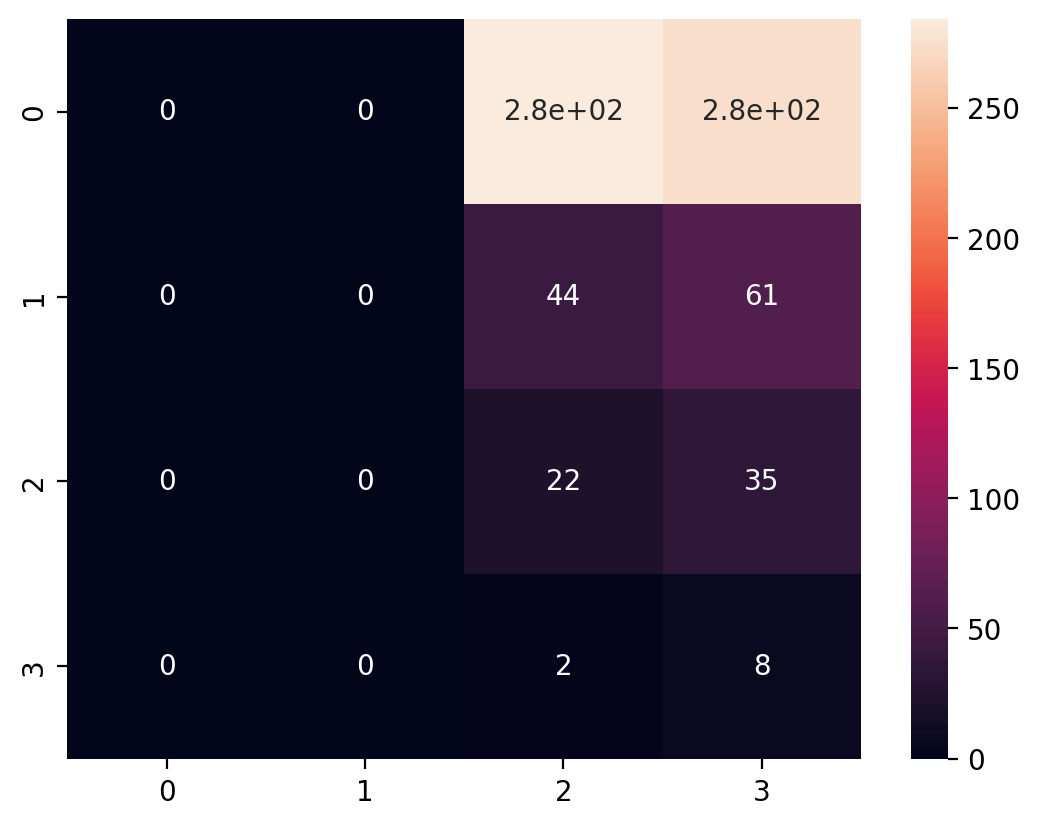

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####InceptionResNet V2

In [ ]:
inceptionresnet=tf.keras.applications.InceptionResNetV2(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in inceptionresnet.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(inceptionresnet, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_2 (TimeDis  (None, 1, 5, 5, 1536)    54336736  
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 38400)         0         
 tributed)                                                       
                                                                 
 lstm_1 (LSTM)               (None, 256)               39584768  
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 34s 439ms/step - loss: 52.9007 - root_mean_squared_error: 7.2733 - val_loss: 0.9002 - val_root_mean_squared_error: 0.9488
Epoch 2/50
37/37 [==============================] - 8s 220ms/step - loss: 1.4018 - root_mean_squared_error: 1.1840 - val_loss: 0.6397 - val_root_mean_squared_error: 0.7998
Epoch 3/50
37/37 [==============================] - 8s 214ms/step - loss: 1.0686 - root_mean_squared_error: 1.0337 - val_loss: 0.4522 - val_root_mean_squared_error: 0.6725
Epoch 4/50
37/37 [==============================] - 8s 225ms/step - loss: 0.9945 - root_mean_squared_error: 0.9972 - val_loss: 0.4355 - val_root_mean_squared_error: 0.6599
Epoch 5/50
37/37 [==============================] - 8s 227ms/step - loss: 1.0337 - root_mean_squared_error: 1.0167 - val_loss: 0.4899 - val_root_mean_squared_error: 0.7000
Epoch 6/50
37/37 [==============================] - 9s 245ms/step - loss: 1.0167 - root_mean_squared_error: 1.0083 - val_loss: 0.3861 - va

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 5s 234ms/step


predictions  actuals
0       2.171096      3.0
1       2.619931      3.0
2       2.669946      3.0
3       2.591164      3.0
4       2.581853      3.0
..           ...      ...
726     2.467464      2.0
727     2.599086      2.0
728     2.423096      2.0
729     2.380130      2.0
730     2.448345      2.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            2.0      3.0
1            3.0      3.0
2            3.0      3.0
3            3.0      3.0
4            3.0      3.0
..           ...      ...
726          2.0      2.0
727          3.0      2.0
728          2.0      2.0
729          2.0      2.0
730          2.0      2.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            2.0      3.0
1            3.0      3.0
2            3.0      3.0
3            3.0      3.0
4            3.0      3.0
..           ...      ...
726          2.0      2.0
727          3.0      2.0
728          2.0      2.0
729          2.0      2.0
730          2.0      2.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       559
         1.0       0.00      0.00      0.00       105
         2.0       0.07      0.72      0.13        57
         3.0       0.03      0.50      0.06        10

    accuracy                           0.06       731
   macro avg       0.03      0.30      0.05       731
weighted avg       0.01      0.06      0.01       731



<AxesSubplot:>

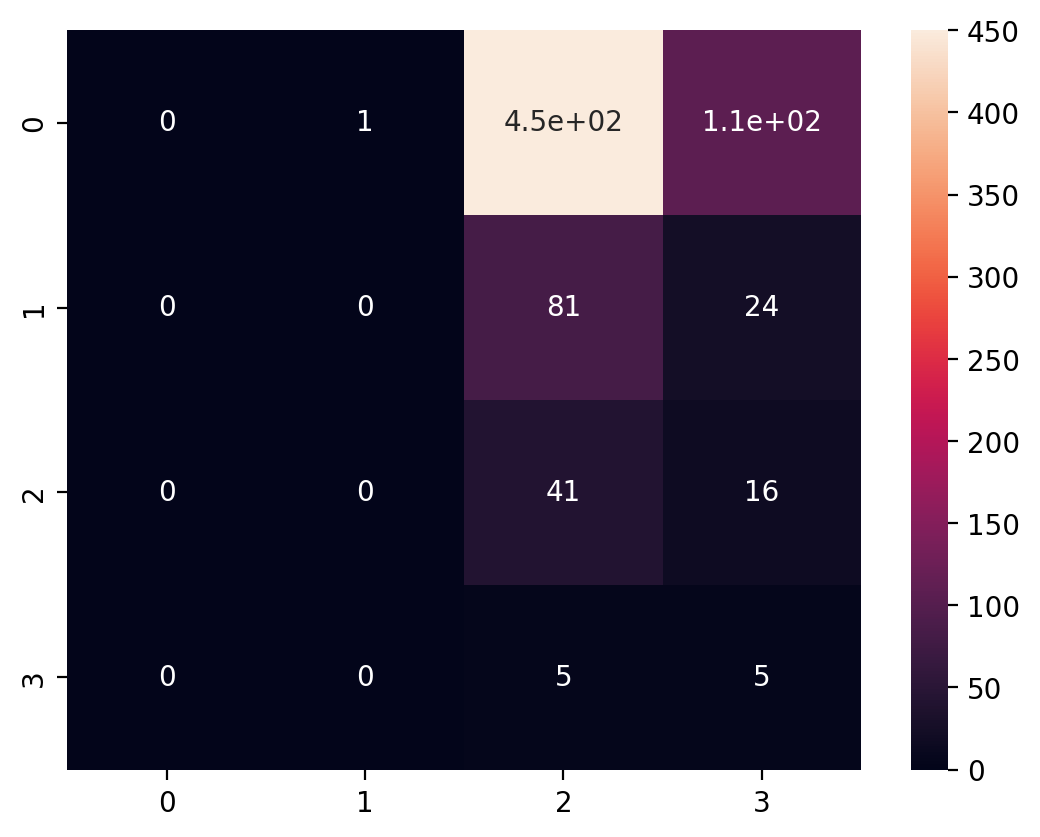

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####VGG16

In [ ]:
vgg16=tf.keras.applications.VGG16(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in vgg16.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(vgg16, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_4 (TimeDis  (None, 1, 7, 7, 512)     14714688  
 tributed)                                                       
                                                                 
 time_distributed_5 (TimeDis  (None, 1, 25088)         0         
 tributed)                                                       
                                                                 
 lstm_2 (LSTM)               (None, 256)               25953280  
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 14s 217ms/step - loss: 18.3596 - root_mean_squared_error: 4.2848 - val_loss: 0.4174 - val_root_mean_squared_error: 0.6460
Epoch 2/50
37/37 [==============================] - 5s 124ms/step - loss: 0.8534 - root_mean_squared_error: 0.9238 - val_loss: 0.4561 - val_root_mean_squared_error: 0.6754
Epoch 3/50
37/37 [==============================] - 4s 121ms/step - loss: 0.7037 - root_mean_squared_error: 0.8388 - val_loss: 0.3709 - val_root_mean_squared_error: 0.6090
Epoch 4/50
37/37 [==============================] - 4s 120ms/step - loss: 0.7133 - root_mean_squared_error: 0.8446 - val_loss: 0.3611 - val_root_mean_squared_error: 0.6009
Epoch 5/50
37/37 [==============================] - 5s 136ms/step - loss: 0.6860 - root_mean_squared_error: 0.8283 - val_loss: 0.3288 - val_root_mean_squared_error: 0.5734
Epoch 6/50
37/37 [==============================] - 5s 123ms/step - loss: 0.7641 - root_mean_squared_error: 0.8741 - val_loss: 0.4431 - va

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 9s 276ms/step


predictions  actuals
0       2.413059      3.0
1       2.587658      3.0
2       2.842456      3.0
3       2.538234      3.0
4       2.978727      3.0
..           ...      ...
726     2.923490      2.0
727     3.037754      2.0
728     2.817628      2.0
729     2.784711      2.0
730     2.968105      2.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            2.0      3.0
1            3.0      3.0
2            3.0      3.0
3            3.0      3.0
4            3.0      3.0
..           ...      ...
726          3.0      2.0
727          3.0      2.0
728          3.0      2.0
729          3.0      2.0
730          3.0      2.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            2.0      3.0
1            3.0      3.0
2            3.0      3.0
3            3.0      3.0
4            3.0      3.0
..           ...      ...
726          3.0      2.0
727          3.0      2.0
728          3.0      2.0
729          3.0      2.0
730          3.0      2.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels = np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       559
         1.0       0.00      0.00      0.00       105
         2.0       0.04      0.11      0.06        57
         3.0       0.01      0.70      0.02        10

   micro avg       0.02      0.02      0.02       731
   macro avg       0.01      0.20      0.02       731
weighted avg       0.00      0.02      0.00       731



<AxesSubplot:>

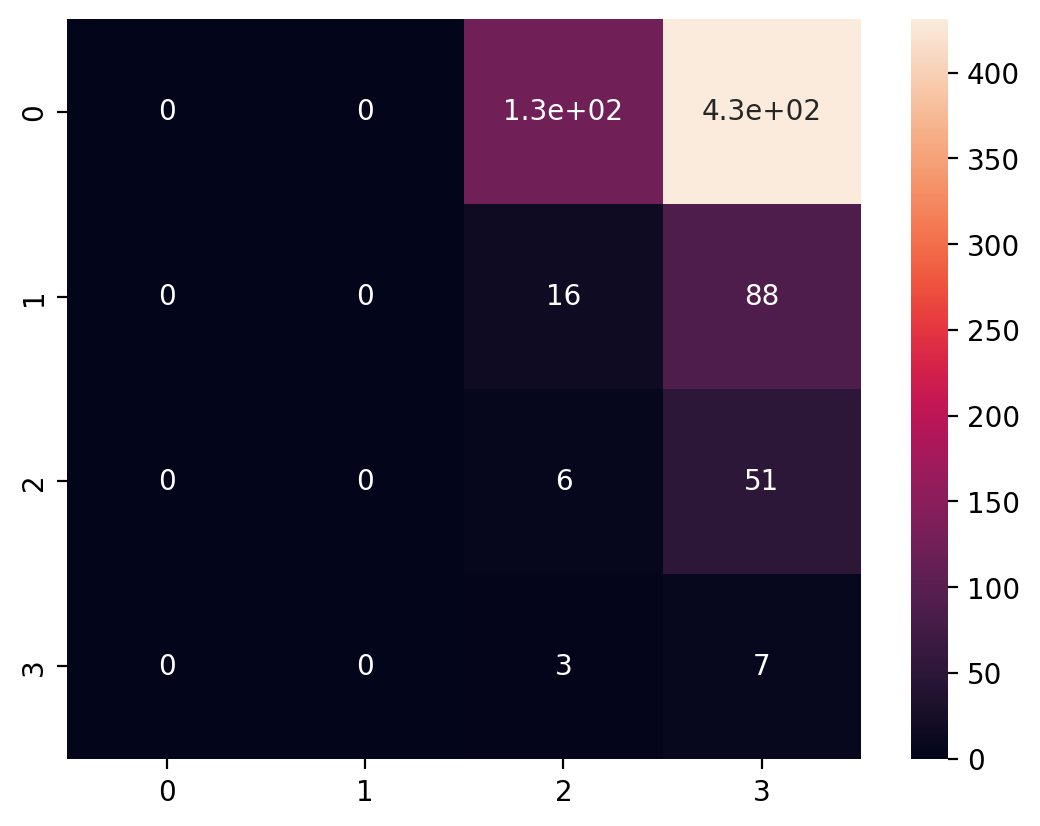

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions'], labels=np.unique(test_results['actuals'])))

sns.heatmap(confusion_matrix_df, annot=True)

###Oversampling 1 : 1 (no feature importance)

In [ ]:
#Function to turn tabular data into image data
def data_to_image(data):
    data_images = []
    font = ImageFont.truetype("arial.ttf", size=25)
    for dat in data:
        background = np.array([[0 for _ in range(224)] for _ in range(224)], dtype='uint8')
        image = Image.fromarray(background)
        draw = ImageDraw.Draw(image)
        draw.text((10, 10), str(dat[0]), fill='white', font=font)
        draw.text((10, 45), str(dat[1]), fill='white', font=font)
        draw.text((10, 80), str(dat[2]), fill='white', font=font)
        draw.text((10, 115), str(dat[3]), fill='white', font=font)
        draw.text((10, 150), str(dat[4]), fill='white', font=font)
        draw.text((10, 185), str(dat[5]), fill='white', font=font)
        draw.text((90, 10), str(dat[6]), fill='white', font=font)
        draw.text((90, 45), str(dat[7]), fill='white', font=font)
        draw.text((90, 80), str(dat[8]), fill='white', font=font)
        draw.text((90, 115), str(dat[9]), fill='white', font=font)
        draw.text((90, 150), str(dat[10]), fill='white', font=font)
        draw.text((90, 185), str(dat[11]), fill='white', font=font)
        draw.text((170, 10), str(dat[12]), fill='white', font=font)
        draw.text((170, 45), str(dat[13]), fill='white', font=font)
        draw.text((170, 80), str(dat[14]), fill='white', font=font)
        draw.text((170, 115), str(dat[15]), fill='white', font=font)
        draw.text((170, 150), str(dat[16]), fill='white', font=font)
        draw.text((170, 185), str(dat[17]), fill='white', font=font) 
        rgb = [np.array(image, dtype='uint8') for _ in range(3)]
        data_images.append(rgb)
    return np.array(data_images) / 255

####oversampling

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
X_test, y_test = X_test, y_test

In [ ]:
#rasio 1 : 1 (train, val)
sm1 = SMOTE(sampling_strategy={2:357,3:357,4:357,5:357},random_state=42,k_neighbors=2)
X_train, y_train = sm1.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

After OverSampling, the shape of train_X: (1428, 18)
After OverSampling, the shape of train_y: (1428,) 



In [ ]:
X_train = X_train.round(4)
X_train

array([[ 0.    , 95.25  , 11.38  , ...,  5.27  ,  0.58  ,  4.7   ],
       [ 0.    , 95.05  ,  7.19  , ...,  6.11  ,  0.54  ,  5.57  ],
       [ 0.    , 95.38  ,  2.93  , ...,  6.32  ,  1.97  ,  4.35  ],
       ...,
       [ 3.158 , 95.1891,  6.8563, ...,  5.3718,  0.7837,  4.5899],
       [ 2.6339, 95.1612,  6.6909, ...,  5.3374,  1.0753,  4.2656],
       [ 3.3602, 95.2344,  6.9389, ...,  5.1902,  0.4982,  4.692 ]])

(1428, 3, 224, 224)
(146, 3, 224, 224)
(731, 3, 224, 224)


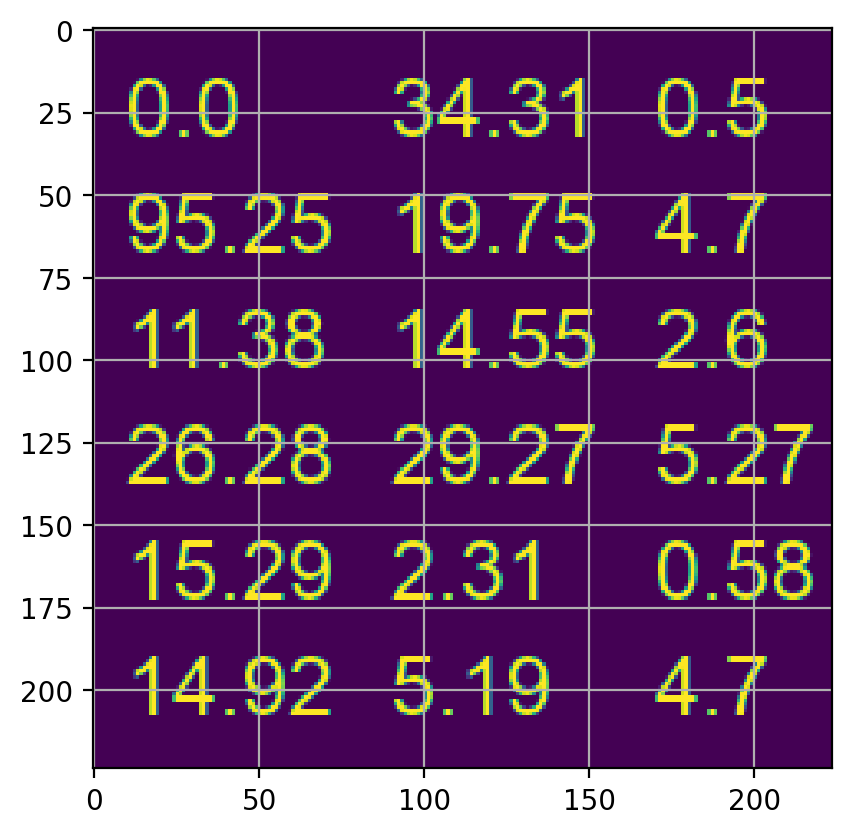

In [ ]:
train_images = data_to_image(X_train)
val_images = data_to_image(X_val)
test_images = data_to_image(X_test)

print(train_images.shape)
print(val_images.shape)
print(test_images.shape)
plt.grid()
plt.imshow(train_images[0][0, :, :])

In [ ]:
 X_train = np.asarray(train_images)

In [ ]:
X_train = np.transpose(X_train, (0, 2, 3, 1))
X_train.shape

(1428, 224, 224, 3)

In [ ]:
 X_val = np.asarray(val_images)

In [ ]:
X_val = np.transpose(X_val, (0, 2, 3, 1))
X_val.shape

(146, 224, 224, 3)

In [ ]:
 X_test = np.asarray(test_images)

In [ ]:
X_test = np.transpose(X_test, (0, 2, 3, 1))
X_test.shape

(731, 224, 224, 3)

In [ ]:
X_train_copy = X_train.reshape((1428,1,224,224,3))
X_val_copy = X_val.reshape((146,1,224,224,3))
X_test_copy = X_test.reshape((731,1,224,224,3))

In [ ]:
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

####ResNet50

In [ ]:
resnet50=tf.keras.applications.ResNet50(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in resnet50.layers[:-4]:                                                       
    layer.trainable = False

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
model = Sequential()
model.add(TimeDistributed(resnet50, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_2 (TimeDis  (None, 1, 7, 7, 2048)    23587712  
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 100352)        0         
 tributed)                                                       
                                                                 
 lstm_1 (LSTM)               (None, 256)               103023616 
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
90/90 [==============================] - 13s 59ms/step - loss: 57.0217 - root_mean_squared_error: 7.5513 - val_loss: 0.4340 - val_root_mean_squared_error: 0.6588
Epoch 2/50
90/90 [==============================] - 3s 28ms/step - loss: 1.4688 - root_mean_squared_error: 1.2119 - val_loss: 0.3292 - val_root_mean_squared_error: 0.5737
Epoch 3/50
90/90 [==============================] - 3s 28ms/step - loss: 1.2458 - root_mean_squared_error: 1.1162 - val_loss: 0.4158 - val_root_mean_squared_error: 0.6448
Epoch 4/50
90/90 [==============================] - 3s 28ms/step - loss: 1.2201 - root_mean_squared_error: 1.1046 - val_loss: 0.8416 - val_root_mean_squared_error: 0.9174
Epoch 5/50
90/90 [==============================] - 3s 29ms/step - loss: 1.3989 - root_mean_squared_error: 1.1827 - val_loss: 0.3376 - val_root_mean_squared_error: 0.5810
Epoch 6/50
90/90 [==============================] - 3s 29ms/step - loss: 1.2294 - root_mean_squared_error: 1.1088 - val_loss: 0.3212 - val_root

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 3s 32ms/step


predictions  actuals
0       3.261635      3.0
1       2.846958      3.0
2       2.535508      3.0
3       2.875382      3.0
4       3.607756      3.0
..           ...      ...
726     3.231544      2.0
727     3.646738      2.0
728     3.083113      2.0
729     3.162367      2.0
730     3.090433      2.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            3.0      3.0
1            3.0      3.0
2            3.0      3.0
3            3.0      3.0
4            4.0      3.0
..           ...      ...
726          3.0      2.0
727          4.0      2.0
728          3.0      2.0
729          3.0      2.0
730          3.0      2.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            3.0      3.0
1            3.0      3.0
2            3.0      3.0
3            3.0      3.0
4            4.0      3.0
..           ...      ...
726          3.0      2.0
727          4.0      2.0
728          3.0      2.0
729          3.0      2.0
730          3.0      2.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       559
         1.0       0.00      0.00      0.00       105
         2.0       0.02      0.04      0.03        57
         3.0       0.01      0.90      0.03        10
         4.0       0.00      0.00      0.00         0

    accuracy                           0.02       731
   macro avg       0.01      0.19      0.01       731
weighted avg       0.00      0.02      0.00       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels = np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       559
         1.0       0.00      0.00      0.00       105
         2.0       0.02      0.04      0.03        57
         3.0       0.01      0.90      0.03        10

   micro avg       0.02      0.02      0.02       731
   macro avg       0.01      0.23      0.01       731
weighted avg       0.00      0.02      0.00       731



<Axes: >

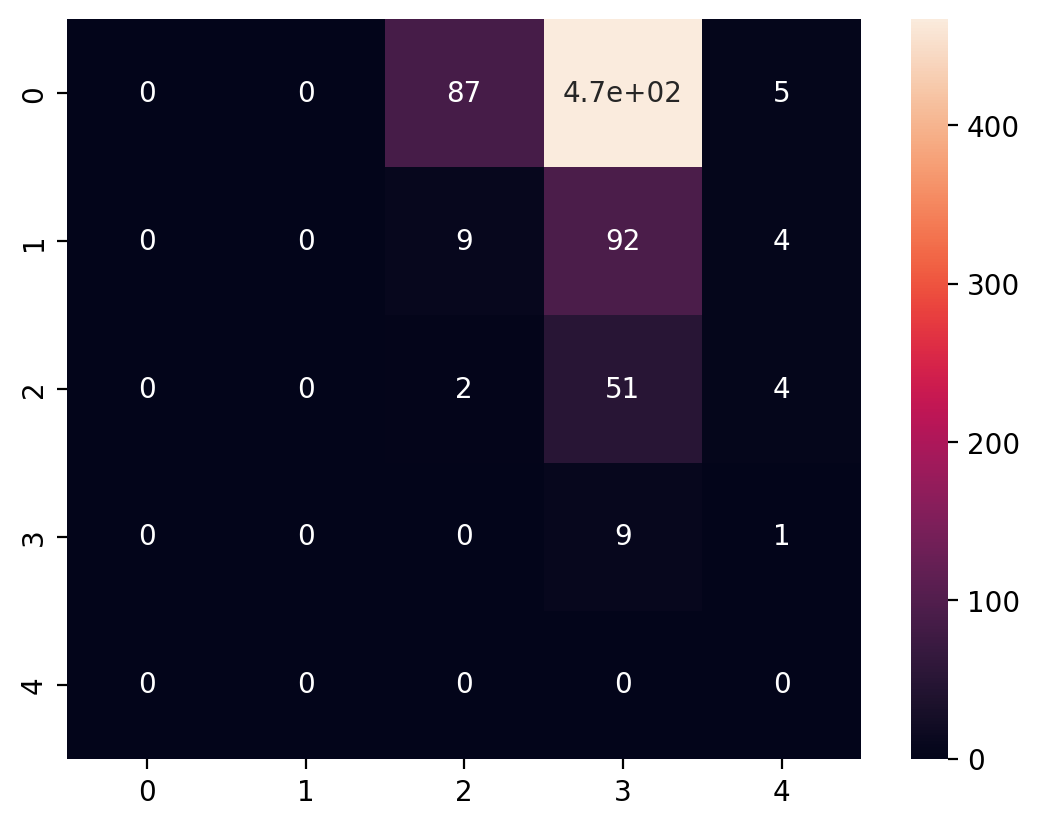

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####InceptionResNet V2

In [ ]:
inceptionresnet=tf.keras.applications.InceptionResNetV2(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in inceptionresnet.layers[:-4]:                                                       
    layer.trainable = False

219055592/219055592 [==============================] - 1s 0us/step


In [ ]:
model = Sequential()
model.add(TimeDistributed(inceptionresnet, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_4 (TimeDis  (None, 1, 5, 5, 1536)    54336736  
 tributed)                                                       
                                                                 
 time_distributed_5 (TimeDis  (None, 1, 38400)         0         
 tributed)                                                       
                                                                 
 lstm_2 (LSTM)               (None, 256)               39584768  
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
90/90 [==============================] - 30s 132ms/step - loss: 16.3813 - root_mean_squared_error: 4.0474 - val_loss: 0.5290 - val_root_mean_squared_error: 0.7273
Epoch 2/50
90/90 [==============================] - 5s 52ms/step - loss: 1.9932 - root_mean_squared_error: 1.4118 - val_loss: 0.6213 - val_root_mean_squared_error: 0.7882
Epoch 3/50
90/90 [==============================] - 5s 53ms/step - loss: 1.8560 - root_mean_squared_error: 1.3624 - val_loss: 0.7520 - val_root_mean_squared_error: 0.8672
Epoch 4/50
90/90 [==============================] - 5s 53ms/step - loss: 1.7169 - root_mean_squared_error: 1.3103 - val_loss: 0.3549 - val_root_mean_squared_error: 0.5958
Epoch 5/50
90/90 [==============================] - 5s 53ms/step - loss: 1.7092 - root_mean_squared_error: 1.3074 - val_loss: 0.4021 - val_root_mean_squared_error: 0.6341
Epoch 6/50
90/90 [==============================] - 5s 52ms/step - loss: 1.5593 - root_mean_squared_error: 1.2487 - val_loss: 0.7640 - val_roo

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 8s 54ms/step


predictions  actuals
0       2.673662      3.0
1       3.027423      3.0
2       2.656315      3.0
3       3.191854      3.0
4       3.405810      3.0
..           ...      ...
726     2.968551      2.0
727     3.737581      2.0
728     3.131112      2.0
729     3.177787      2.0
730     2.948501      2.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            3.0      3.0
1            3.0      3.0
2            3.0      3.0
3            3.0      3.0
4            3.0      3.0
..           ...      ...
726          3.0      2.0
727          4.0      2.0
728          3.0      2.0
729          3.0      2.0
730          3.0      2.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            3.0      3.0
1            3.0      3.0
2            3.0      3.0
3            3.0      3.0
4            3.0      3.0
..           ...      ...
726          3.0      2.0
727          4.0      2.0
728          3.0      2.0
729          3.0      2.0
730          3.0      2.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       559
         1.0       0.00      0.00      0.00       105
         2.0       0.02      0.05      0.03        57
         3.0       0.02      1.00      0.03        10
         4.0       0.00      0.00      0.00         0

    accuracy                           0.02       731
   macro avg       0.01      0.21      0.01       731
weighted avg       0.00      0.02      0.00       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels = np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       559
         1.0       0.00      0.00      0.00       105
         2.0       0.02      0.05      0.03        57
         3.0       0.02      1.00      0.03        10

   micro avg       0.02      0.02      0.02       731
   macro avg       0.01      0.26      0.02       731
weighted avg       0.00      0.02      0.00       731



<Axes: >

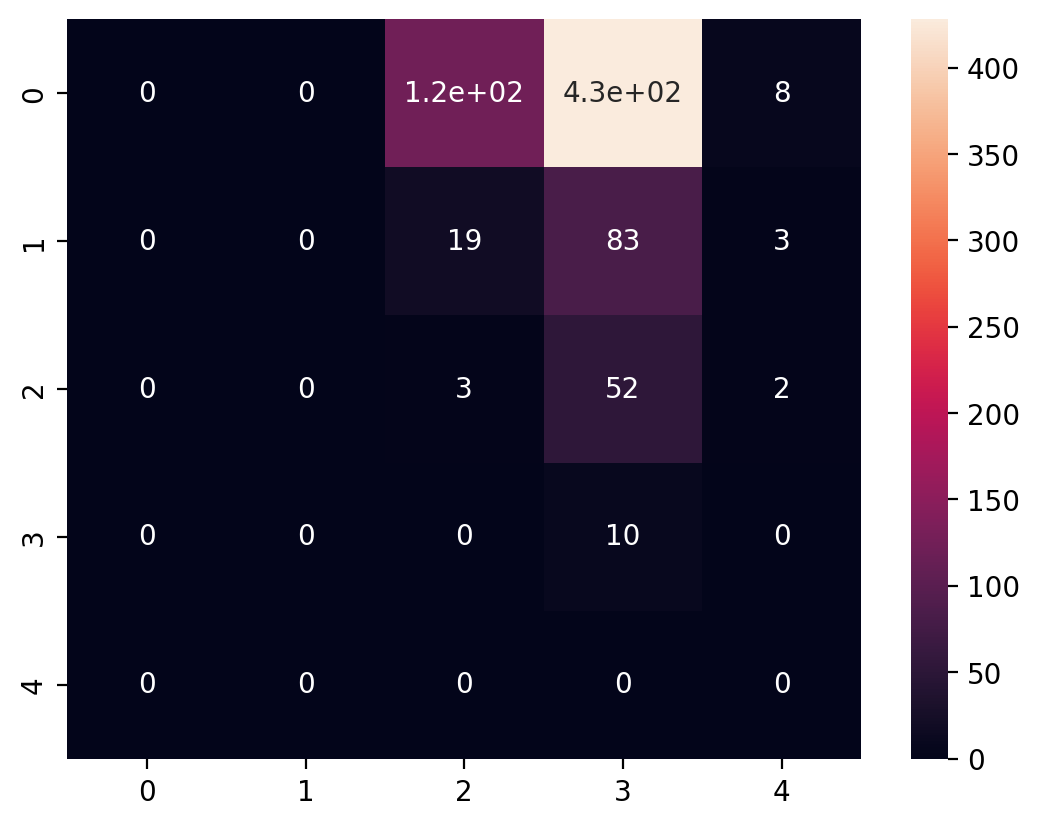

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####VGG16

In [ ]:
vgg16=tf.keras.applications.VGG16(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in vgg16.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(vgg16, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_6 (TimeDis  (None, 1, 7, 7, 512)     14714688  
 tributed)                                                       
                                                                 
 time_distributed_7 (TimeDis  (None, 1, 25088)         0         
 tributed)                                                       
                                                                 
 lstm_3 (LSTM)               (None, 256)               25953280  
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
90/90 [==============================] - 6s 26ms/step - loss: 3.5371 - root_mean_squared_error: 1.8807 - val_loss: 0.3331 - val_root_mean_squared_error: 0.5771
Epoch 2/50
90/90 [==============================] - 1s 16ms/step - loss: 1.3738 - root_mean_squared_error: 1.1721 - val_loss: 0.4105 - val_root_mean_squared_error: 0.6407
Epoch 3/50
90/90 [==============================] - 1s 16ms/step - loss: 1.2188 - root_mean_squared_error: 1.1040 - val_loss: 0.3056 - val_root_mean_squared_error: 0.5528
Epoch 4/50
90/90 [==============================] - 1s 16ms/step - loss: 1.1216 - root_mean_squared_error: 1.0591 - val_loss: 0.3197 - val_root_mean_squared_error: 0.5655
Epoch 5/50
90/90 [==============================] - 1s 16ms/step - loss: 0.9146 - root_mean_squared_error: 0.9564 - val_loss: 0.3388 - val_root_mean_squared_error: 0.5821
Epoch 6/50
90/90 [==============================] - 1s 16ms/step - loss: 0.9340 - root_mean_squared_error: 0.9665 - val_loss: 0.3585 - val_root_m

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 1s 21ms/step


predictions  actuals
0       2.378382      3.0
1       2.115116      3.0
2       2.350410      3.0
3       2.397083      3.0
4       2.409966      3.0
..           ...      ...
726     2.719396      2.0
727     4.574250      2.0
728     2.772625      2.0
729     2.605474      2.0
730     3.003562      2.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            2.0      3.0
1            2.0      3.0
2            2.0      3.0
3            2.0      3.0
4            2.0      3.0
..           ...      ...
726          3.0      2.0
727          5.0      2.0
728          3.0      2.0
729          3.0      2.0
730          3.0      2.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            2.0      3.0
1            2.0      3.0
2            2.0      3.0
3            2.0      3.0
4            2.0      3.0
..           ...      ...
726          3.0      2.0
727          5.0      2.0
728          3.0      2.0
729          3.0      2.0
730          3.0      2.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       559
         1.0       0.00      0.00      0.00       105
         2.0       0.06      0.44      0.10        57
         3.0       0.01      0.20      0.01        10
         4.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         0

    accuracy                           0.04       731
   macro avg       0.01      0.11      0.02       731
weighted avg       0.00      0.04      0.01       731



In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions'], labels = np.unique(test_results['actuals'])))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       559
         1.0       0.00      0.00      0.00       105
         2.0       0.06      0.44      0.10        57
         3.0       0.01      0.20      0.01        10

   micro avg       0.04      0.04      0.04       731
   macro avg       0.02      0.16      0.03       731
weighted avg       0.00      0.04      0.01       731



<Axes: >

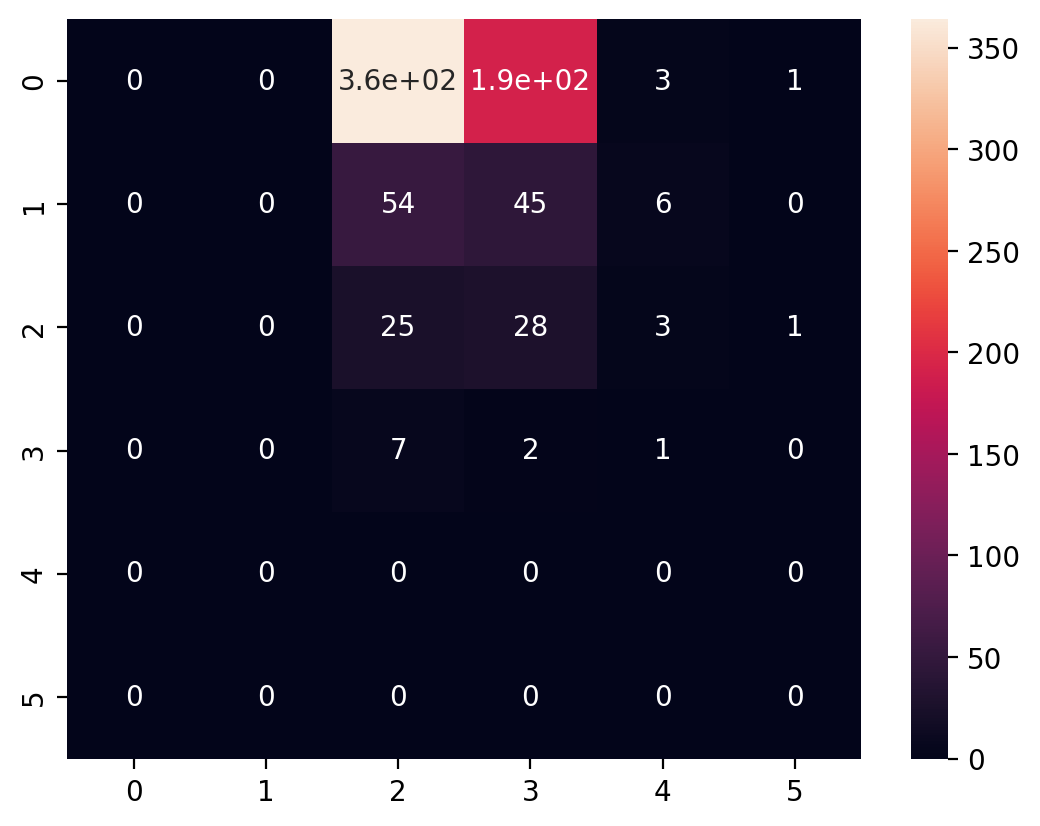

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

###with feature importance (xgboost feature importance)

In [ ]:
#Function to turn tabular data into image data
def data_to_image3(data):
    data_images = []
    font1 = ImageFont.truetype("arial.ttf", size=35)
    font2 = ImageFont.truetype("arial.ttf", size=30)
    font3 = ImageFont.truetype("arial.ttf", size=25)
    font4 = ImageFont.truetype("arial.ttf", size=20)
    font5 = ImageFont.truetype("arial.ttf", size=15)
    for dat in data:
        background = np.array([[0 for _ in range(224)] for _ in range(224)], dtype='uint8')
        image = Image.fromarray(background)
        draw = ImageDraw.Draw(image)
        draw.text((10, 10), str(dat[7]), fill='white', font=font1)
        draw.text((10, 45), str(dat[9]), fill='white', font=font1)
        draw.text((10, 80), str(dat[4]), fill='white', font=font1)
        draw.text((10, 115), str(dat[5]), fill='white', font=font2)
        draw.text((10, 150), str(dat[13]), fill='white', font=font3)
        draw.text((10, 185), str(dat[8]), fill='white', font=font3)
        draw.text((90, 10), str(dat[17]), fill='white', font=font3)
        draw.text((90, 45), str(dat[6]), fill='white', font=font3)
        draw.text((90, 80), str(dat[3]), fill='white', font=font3)
        draw.text((90, 115), str(dat[14]), fill='white', font=font3)
        draw.text((90, 150), str(dat[12]), fill='white', font=font3)
        draw.text((90, 185), str(dat[11]), fill='white', font=font3)
        draw.text((170, 10), str(dat[16]), fill='white', font=font3)
        draw.text((170, 45), str(dat[15]), fill='white', font=font3)
        draw.text((170, 80), str(dat[10]), fill='white', font=font3)
        draw.text((170, 115), str(dat[2]), fill='white', font=font3)
        draw.text((170, 150), str(dat[1]), fill='white', font=font4)
        draw.text((170, 185), str(dat[0]), fill='white', font=font5)
        rgb = [np.array(image, dtype='uint8') for _ in range(3)]
        data_images.append(rgb)
    return np.array(data_images) / 255

(584, 3, 224, 224)
(146, 3, 224, 224)
(731, 3, 224, 224)


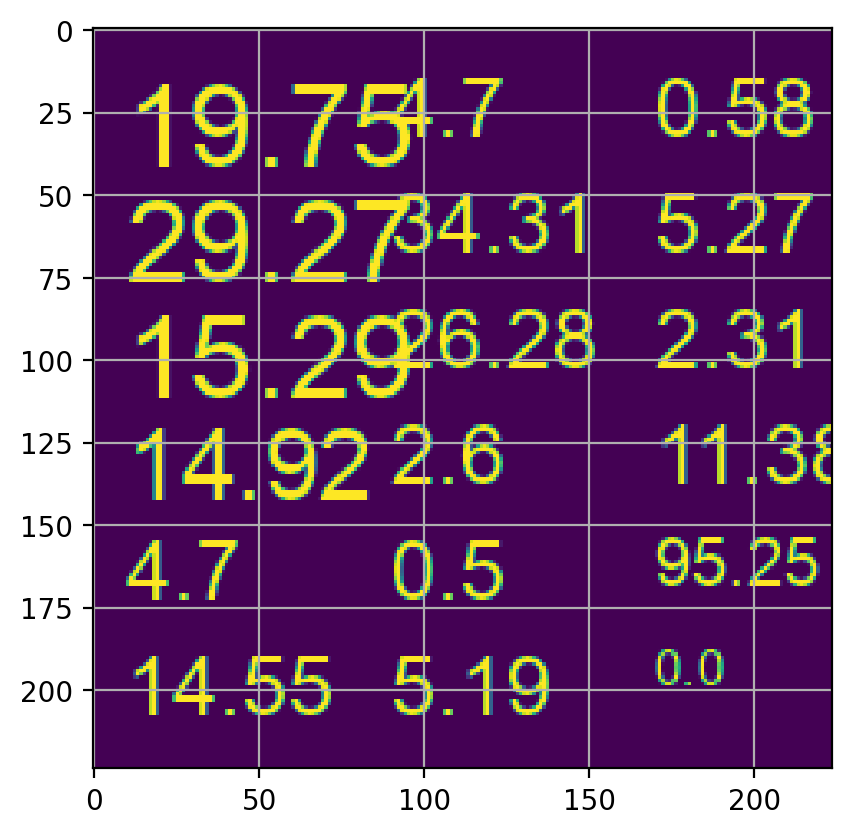

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
X_test, y_test = X_test, y_test

train_images3 = data_to_image3(X_train)
val_images3 = data_to_image3(X_val)
test_images3 = data_to_image3(X_test)

print(train_images3.shape)
print(val_images3.shape)
print(test_images3.shape)
plt.grid()
plt.imshow(train_images3[0][0, :, :])

In [ ]:
 X_train = np.asarray(train_images3)

In [ ]:
X_train = np.transpose(X_train, (0, 2, 3, 1))
X_train.shape

(584, 224, 224, 3)

In [ ]:
 X_val = np.asarray(val_images3)

In [ ]:
X_val = np.transpose(X_val, (0, 2, 3, 1))
X_val.shape

(146, 224, 224, 3)

In [ ]:
 X_test = np.asarray(test_images3)

In [ ]:
X_test = np.transpose(X_test, (0, 2, 3, 1))
X_test.shape

(731, 224, 224, 3)

In [ ]:
X_train_copy = X_train.reshape((584,1,224,224,3))
X_val_copy = X_val.reshape((146,1,224,224,3))
X_test_copy = X_test.reshape((731,1,224,224,3))

In [ ]:
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

####ResNet50

In [ ]:
resnet50=tf.keras.applications.ResNet50(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in resnet50.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(resnet50, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_12 (TimeDi  (None, 1, 7, 7, 2048)    23587712  
 stributed)                                                      
                                                                 
 time_distributed_13 (TimeDi  (None, 1, 100352)        0         
 stributed)                                                      
                                                                 
 lstm_6 (LSTM)               (None, 256)               103023616 
                                                                 
 dense_12 (Dense)            (None, 64)                16448     
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 12s 192ms/step - loss: 65.6745 - root_mean_squared_error: 8.1040 - val_loss: 0.6593 - val_root_mean_squared_error: 0.8120
Epoch 2/50
37/37 [==============================] - 5s 143ms/step - loss: 1.4623 - root_mean_squared_error: 1.2093 - val_loss: 0.6830 - val_root_mean_squared_error: 0.8264
Epoch 3/50
37/37 [==============================] - 5s 146ms/step - loss: 1.6114 - root_mean_squared_error: 1.2694 - val_loss: 0.4102 - val_root_mean_squared_error: 0.6404
Epoch 4/50
37/37 [==============================] - 5s 147ms/step - loss: 1.4385 - root_mean_squared_error: 1.1994 - val_loss: 0.3590 - val_root_mean_squared_error: 0.5992
Epoch 5/50
37/37 [==============================] - 6s 150ms/step - loss: 1.3283 - root_mean_squared_error: 1.1525 - val_loss: 0.4783 - val_root_mean_squared_error: 0.6916
Epoch 6/50
37/37 [==============================] - 6s 153ms/step - loss: 1.4444 - root_mean_squared_error: 1.2018 - val_loss: 0.4520 - va

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 2s 98ms/step


predictions  actuals
0       2.385335      3.0
1       2.517276      3.0
2       2.944822      3.0
3       2.464761      3.0
4       2.788607      3.0
..           ...      ...
726     2.793556      2.0
727     2.324853      2.0
728     2.305693      2.0
729     2.684496      2.0
730     2.317417      2.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            2.0      3.0
1            3.0      3.0
2            3.0      3.0
3            2.0      3.0
4            3.0      3.0
..           ...      ...
726          3.0      2.0
727          2.0      2.0
728          2.0      2.0
729          3.0      2.0
730          2.0      2.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            2.0      3.0
1            3.0      3.0
2            3.0      3.0
3            2.0      3.0
4            3.0      3.0
..           ...      ...
726          3.0      2.0
727          2.0      2.0
728          2.0      2.0
729          3.0      2.0
730          2.0      2.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       559
         1.0       0.00      0.00      0.00       105
         2.0       0.07      0.72      0.13        57
         3.0       0.04      0.50      0.07        10

    accuracy                           0.06       731
   macro avg       0.03      0.30      0.05       731
weighted avg       0.01      0.06      0.01       731



<Axes: >

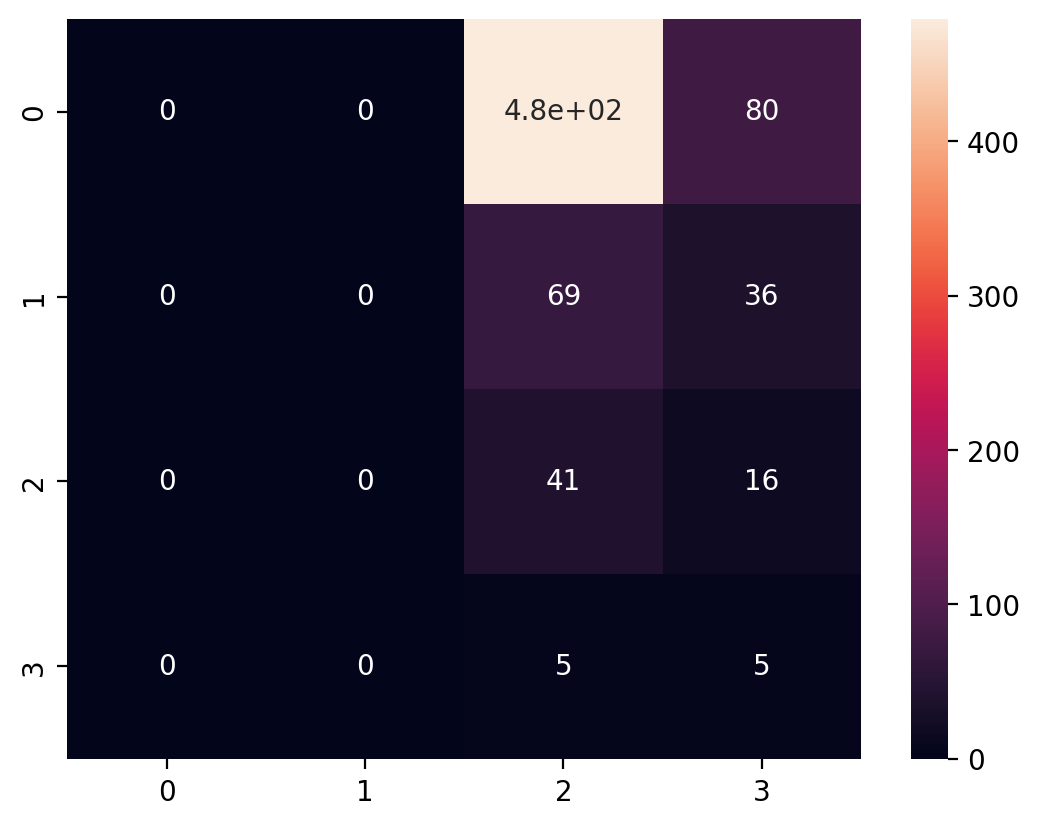

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####InceptionResNet V2

In [ ]:
inceptionresnet=tf.keras.applications.InceptionResNetV2(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in inceptionresnet.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(inceptionresnet, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_14 (TimeDi  (None, 1, 5, 5, 1536)    54336736  
 stributed)                                                      
                                                                 
 time_distributed_15 (TimeDi  (None, 1, 38400)         0         
 stributed)                                                      
                                                                 
 lstm_7 (LSTM)               (None, 256)               39584768  
                                                                 
 dense_14 (Dense)            (None, 64)                16448     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 30s 370ms/step - loss: 32.2315 - root_mean_squared_error: 5.6773 - val_loss: 0.6778 - val_root_mean_squared_error: 0.8233
Epoch 2/50
37/37 [==============================] - 8s 212ms/step - loss: 1.6323 - root_mean_squared_error: 1.2776 - val_loss: 0.4908 - val_root_mean_squared_error: 0.7006
Epoch 3/50
37/37 [==============================] - 8s 219ms/step - loss: 1.7462 - root_mean_squared_error: 1.3214 - val_loss: 0.7122 - val_root_mean_squared_error: 0.8439
Epoch 4/50
37/37 [==============================] - 8s 219ms/step - loss: 1.7143 - root_mean_squared_error: 1.3093 - val_loss: 0.6298 - val_root_mean_squared_error: 0.7936
Epoch 5/50
37/37 [==============================] - 8s 216ms/step - loss: 1.5506 - root_mean_squared_error: 1.2452 - val_loss: 0.6662 - val_root_mean_squared_error: 0.8162
Epoch 6/50
37/37 [==============================] - 8s 215ms/step - loss: 1.6988 - root_mean_squared_error: 1.3034 - val_loss: 0.9146 - va

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 9s 169ms/step


predictions  actuals
0       1.936158      3.0
1       2.187619      3.0
2       2.051072      3.0
3       2.194055      3.0
4       2.365777      3.0
..           ...      ...
726     2.714242      2.0
727     2.442512      2.0
728     2.250592      2.0
729     1.900033      2.0
730     2.386151      2.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            2.0      3.0
1            2.0      3.0
2            2.0      3.0
3            2.0      3.0
4            2.0      3.0
..           ...      ...
726          3.0      2.0
727          2.0      2.0
728          2.0      2.0
729          2.0      2.0
730          2.0      2.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            2.0      3.0
1            2.0      3.0
2            2.0      3.0
3            2.0      3.0
4            2.0      3.0
..           ...      ...
726          3.0      2.0
727          2.0      2.0
728          2.0      2.0
729          2.0      2.0
730          2.0      2.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       559
         1.0       0.00      0.00      0.00       105
         2.0       0.08      0.96      0.15        57
         3.0       0.00      0.00      0.00        10

    accuracy                           0.08       731
   macro avg       0.02      0.24      0.04       731
weighted avg       0.01      0.08      0.01       731



<Axes: >

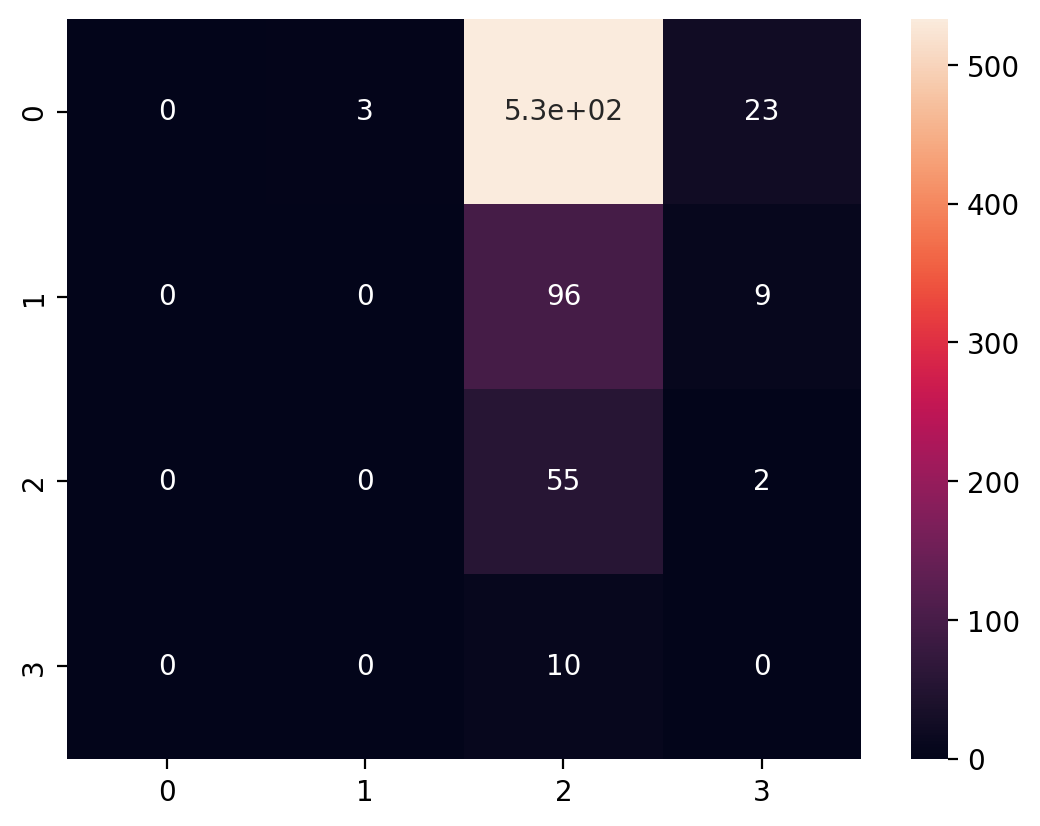

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####VGG16

In [ ]:
vgg16=tf.keras.applications.VGG16(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in vgg16.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(vgg16, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_16 (TimeDi  (None, 1, 7, 7, 512)     14714688  
 stributed)                                                      
                                                                 
 time_distributed_17 (TimeDi  (None, 1, 25088)         0         
 stributed)                                                      
                                                                 
 lstm_8 (LSTM)               (None, 256)               25953280  
                                                                 
 dense_16 (Dense)            (None, 64)                16448     
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
37/37 [==============================] - 7s 150ms/step - loss: 145.6823 - root_mean_squared_error: 12.0699 - val_loss: 1.5382 - val_root_mean_squared_error: 1.2402
Epoch 2/50
37/37 [==============================] - 4s 119ms/step - loss: 1.1938 - root_mean_squared_error: 1.0926 - val_loss: 0.7404 - val_root_mean_squared_error: 0.8604
Epoch 3/50
37/37 [==============================] - 4s 118ms/step - loss: 1.0010 - root_mean_squared_error: 1.0005 - val_loss: 0.9674 - val_root_mean_squared_error: 0.9836
Epoch 4/50
37/37 [==============================] - 4s 119ms/step - loss: 0.8082 - root_mean_squared_error: 0.8990 - val_loss: 0.3466 - val_root_mean_squared_error: 0.5887
Epoch 5/50
37/37 [==============================] - 4s 120ms/step - loss: 0.8251 - root_mean_squared_error: 0.9083 - val_loss: 0.5695 - val_root_mean_squared_error: 0.7546
Epoch 6/50
37/37 [==============================] - 4s 119ms/step - loss: 0.8218 - root_mean_squared_error: 0.9065 - val_loss: 0.4816 - v

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 4s 158ms/step


predictions  actuals
0       2.414676      3.0
1       2.501855      3.0
2       2.162734      3.0
3       2.330923      3.0
4       2.834794      3.0
..           ...      ...
726     2.508496      2.0
727     2.655633      2.0
728     2.460236      2.0
729     2.698774      2.0
730     2.658734      2.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            2.0      3.0
1            3.0      3.0
2            2.0      3.0
3            2.0      3.0
4            3.0      3.0
..           ...      ...
726          3.0      2.0
727          3.0      2.0
728          2.0      2.0
729          3.0      2.0
730          3.0      2.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            2.0      3.0
1            3.0      3.0
2            2.0      3.0
3            2.0      3.0
4            3.0      3.0
..           ...      ...
726          3.0      2.0
727          3.0      2.0
728          2.0      2.0
729          3.0      2.0
730          3.0      2.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       559
         1.0       0.00      0.00      0.00       105
         2.0       0.06      0.72      0.12        57
         3.0       0.04      0.40      0.08        10

    accuracy                           0.06       731
   macro avg       0.03      0.28      0.05       731
weighted avg       0.01      0.06      0.01       731



<Axes: >

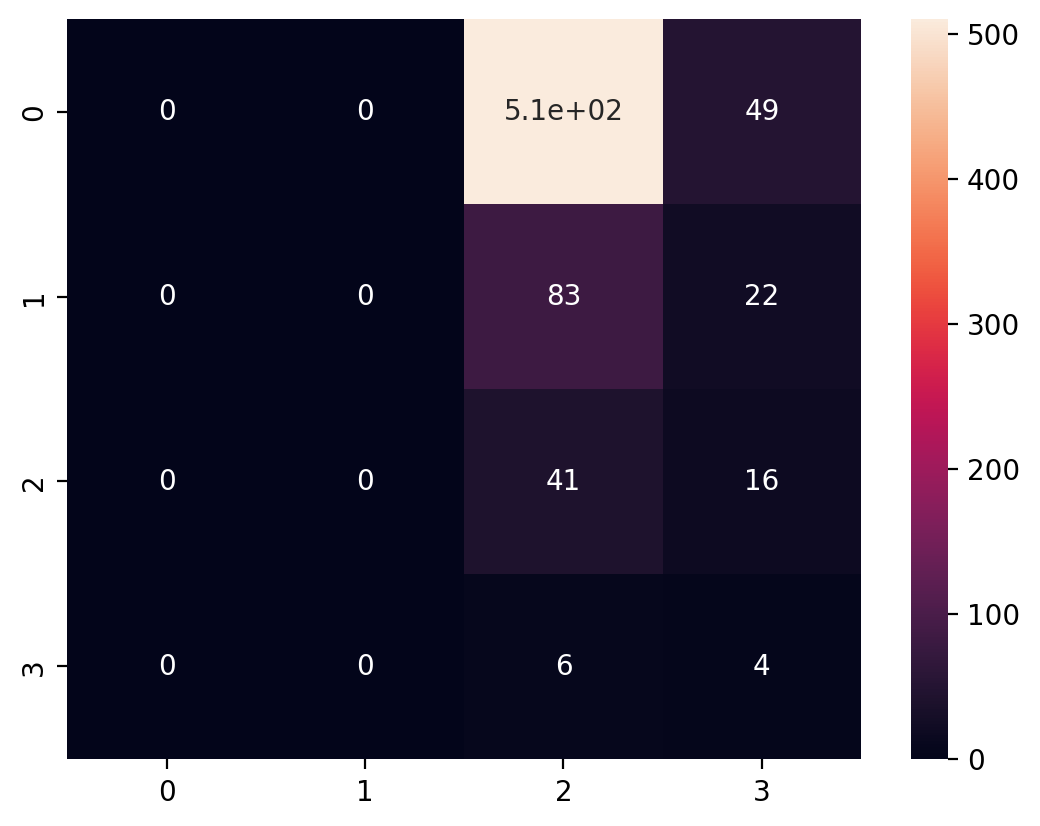

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

###Oversampling 1:1 (WITH feature importance)

In [ ]:
#Function to turn tabular data into image data
def data_to_image3(data):
    data_images = []
    font1 = ImageFont.truetype("arial.ttf", size=35)
    font2 = ImageFont.truetype("arial.ttf", size=30)
    font3 = ImageFont.truetype("arial.ttf", size=25)
    font4 = ImageFont.truetype("arial.ttf", size=20)
    font5 = ImageFont.truetype("arial.ttf", size=15)
    for dat in data:
        background = np.array([[0 for _ in range(224)] for _ in range(224)], dtype='uint8')
        image = Image.fromarray(background)
        draw = ImageDraw.Draw(image)
        draw.text((10, 10), str(dat[7]), fill='white', font=font1)
        draw.text((10, 45), str(dat[9]), fill='white', font=font1)
        draw.text((10, 80), str(dat[4]), fill='white', font=font1)
        draw.text((10, 115), str(dat[5]), fill='white', font=font2)
        draw.text((10, 150), str(dat[13]), fill='white', font=font3)
        draw.text((10, 185), str(dat[8]), fill='white', font=font3)
        draw.text((90, 10), str(dat[17]), fill='white', font=font3)
        draw.text((90, 45), str(dat[6]), fill='white', font=font3)
        draw.text((90, 80), str(dat[3]), fill='white', font=font3)
        draw.text((90, 115), str(dat[14]), fill='white', font=font3)
        draw.text((90, 150), str(dat[12]), fill='white', font=font3)
        draw.text((90, 185), str(dat[11]), fill='white', font=font3)
        draw.text((170, 10), str(dat[16]), fill='white', font=font3)
        draw.text((170, 45), str(dat[15]), fill='white', font=font3)
        draw.text((170, 80), str(dat[10]), fill='white', font=font3)
        draw.text((170, 115), str(dat[2]), fill='white', font=font3)
        draw.text((170, 150), str(dat[1]), fill='white', font=font4)
        draw.text((170, 185), str(dat[0]), fill='white', font=font5)
        rgb = [np.array(image, dtype='uint8') for _ in range(3)]
        data_images.append(rgb)
    return np.array(data_images) / 255

####oversampling

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
X_test, y_test = X_test, y_test

In [ ]:
#rasio 1 : 1 (train, val)
sm1 = SMOTE(sampling_strategy={2:357,3:357,4:357,5:357},random_state=42,k_neighbors=2)
X_train, y_train = sm1.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

After OverSampling, the shape of train_X: (1428, 18)
After OverSampling, the shape of train_y: (1428,) 



In [ ]:
X_train = X_train.round(4)
X_train

array([[ 0.    , 95.25  , 11.38  , ...,  5.27  ,  0.58  ,  4.7   ],
       [ 0.    , 95.05  ,  7.19  , ...,  6.11  ,  0.54  ,  5.57  ],
       [ 0.    , 95.38  ,  2.93  , ...,  6.32  ,  1.97  ,  4.35  ],
       ...,
       [ 3.158 , 95.1891,  6.8563, ...,  5.3718,  0.7837,  4.5899],
       [ 2.6339, 95.1612,  6.6909, ...,  5.3374,  1.0753,  4.2656],
       [ 3.3602, 95.2344,  6.9389, ...,  5.1902,  0.4982,  4.692 ]])

(1428, 3, 224, 224)
(146, 3, 224, 224)
(731, 3, 224, 224)


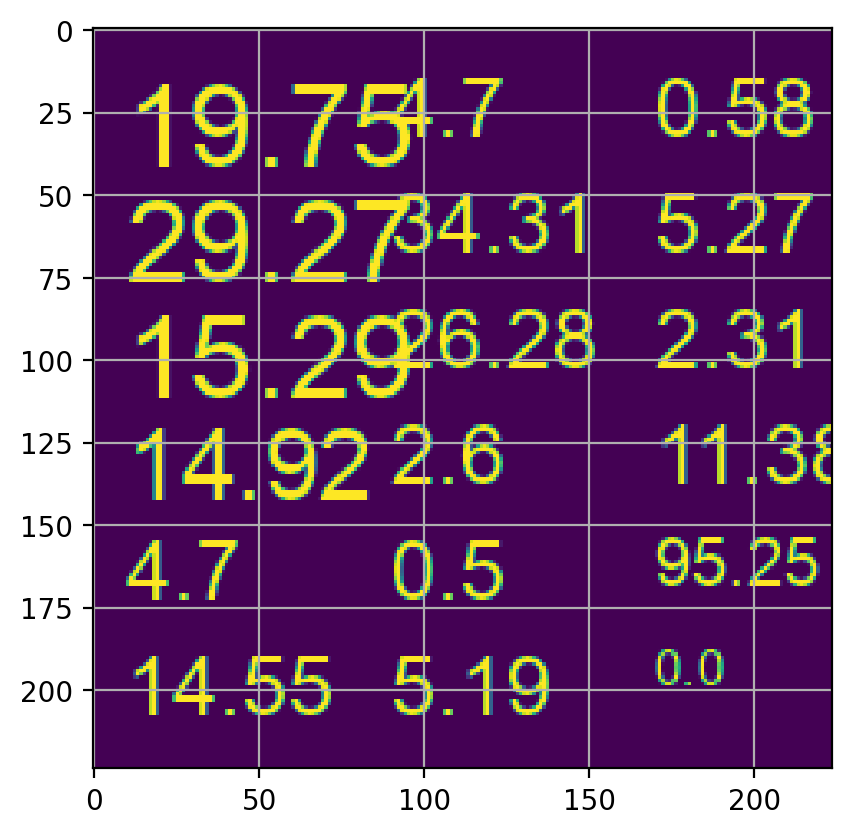

In [ ]:
train_images3 = data_to_image3(X_train)
val_images3 = data_to_image3(X_val)
test_images3 = data_to_image3(X_test)

print(train_images3.shape)
print(val_images3.shape)
print(test_images3.shape)
plt.grid()
plt.imshow(train_images3[0][0, :, :])

In [ ]:
 X_train = np.asarray(train_images3)

In [ ]:
X_train = np.transpose(X_train, (0, 2, 3, 1))
X_train.shape

(1428, 224, 224, 3)

In [ ]:
 X_val = np.asarray(val_images3)

In [ ]:
X_val = np.transpose(X_val, (0, 2, 3, 1))
X_val.shape

(146, 224, 224, 3)

In [ ]:
 X_test = np.asarray(test_images3)

In [ ]:
X_test = np.transpose(X_test, (0, 2, 3, 1))
X_test.shape

(731, 224, 224, 3)

In [ ]:
X_train_copy = X_train.reshape((1428,1,224,224,3))
X_val_copy = X_val.reshape((146,1,224,224,3))
X_test_copy = X_test.reshape((731,1,224,224,3))

In [ ]:
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

####ResNet50

In [ ]:
resnet50=tf.keras.applications.ResNet50(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in resnet50.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(resnet50, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_8 (TimeDis  (None, 1, 7, 7, 2048)    23587712  
 tributed)                                                       
                                                                 
 time_distributed_9 (TimeDis  (None, 1, 100352)        0         
 tributed)                                                       
                                                                 
 lstm_4 (LSTM)               (None, 256)               103023616 
                                                                 
 dense_8 (Dense)             (None, 64)                16448     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
90/90 [==============================] - 11s 48ms/step - loss: 162.5422 - root_mean_squared_error: 12.7492 - val_loss: 2.6905 - val_root_mean_squared_error: 1.6403
Epoch 2/50
90/90 [==============================] - 3s 28ms/step - loss: 2.4291 - root_mean_squared_error: 1.5586 - val_loss: 0.4961 - val_root_mean_squared_error: 0.7043
Epoch 3/50
90/90 [==============================] - 2s 28ms/step - loss: 2.1763 - root_mean_squared_error: 1.4752 - val_loss: 0.4778 - val_root_mean_squared_error: 0.6912
Epoch 4/50
90/90 [==============================] - 2s 28ms/step - loss: 2.1170 - root_mean_squared_error: 1.4550 - val_loss: 0.6158 - val_root_mean_squared_error: 0.7847
Epoch 5/50
90/90 [==============================] - 2s 28ms/step - loss: 1.8519 - root_mean_squared_error: 1.3609 - val_loss: 0.8387 - val_root_mean_squared_error: 0.9158
Epoch 6/50
90/90 [==============================] - 2s 28ms/step - loss: 1.5415 - root_mean_squared_error: 1.2416 - val_loss: 0.4214 - val_ro

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 2s 18ms/step


predictions  actuals
0       2.571322      3.0
1       2.367961      3.0
2       2.776907      3.0
3       2.823095      3.0
4       2.990757      3.0
..           ...      ...
726     2.881031      2.0
727     2.867233      2.0
728     2.804331      2.0
729     2.553575      2.0
730     2.688491      2.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            3.0      3.0
1            2.0      3.0
2            3.0      3.0
3            3.0      3.0
4            3.0      3.0
..           ...      ...
726          3.0      2.0
727          3.0      2.0
728          3.0      2.0
729          3.0      2.0
730          3.0      2.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            3.0      3.0
1            2.0      3.0
2            3.0      3.0
3            3.0      3.0
4            3.0      3.0
..           ...      ...
726          3.0      2.0
727          3.0      2.0
728          3.0      2.0
729          3.0      2.0
730          3.0      2.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       559
         1.0       0.00      0.00      0.00       105
         2.0       0.06      0.51      0.10        57
         3.0       0.03      0.70      0.06        10
         4.0       0.00      0.00      0.00         0

    accuracy                           0.05       731
   macro avg       0.02      0.24      0.03       731
weighted avg       0.00      0.05      0.01       731



<Axes: >

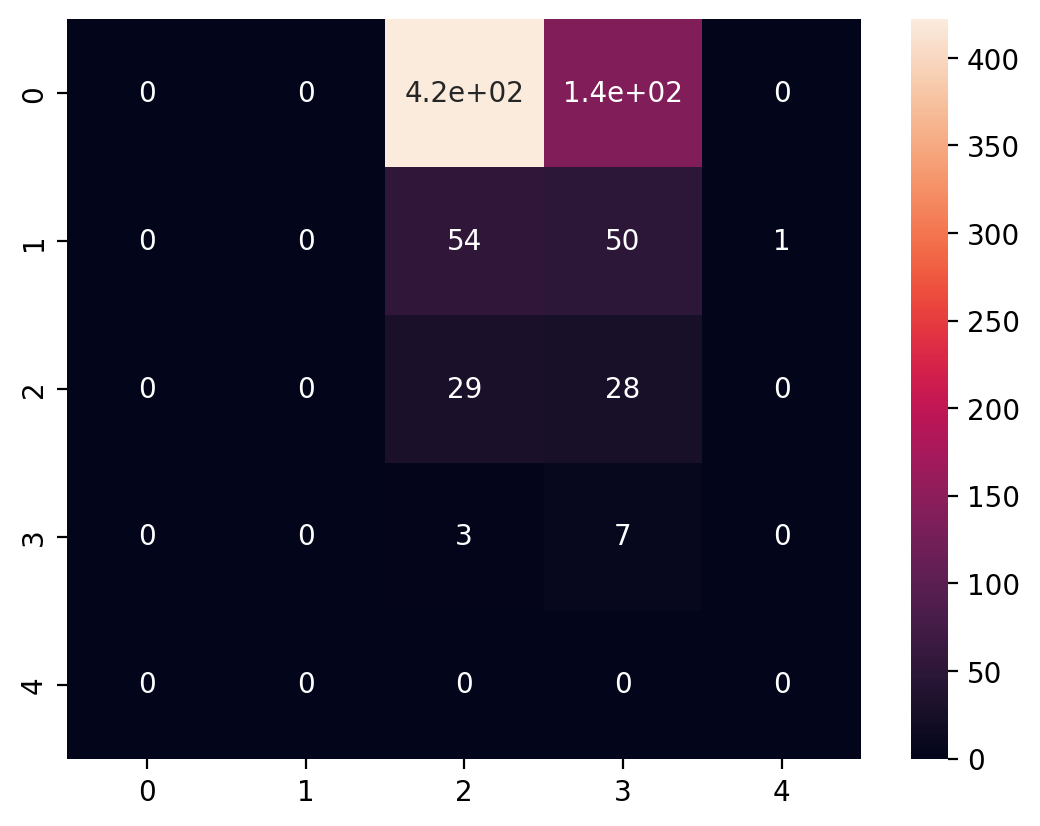

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####InceptionResNet V2

In [ ]:
inceptionresnet=tf.keras.applications.InceptionResNetV2(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in inceptionresnet.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(inceptionresnet, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_10 (TimeDi  (None, 1, 5, 5, 1536)    54336736  
 stributed)                                                      
                                                                 
 time_distributed_11 (TimeDi  (None, 1, 38400)         0         
 stributed)                                                      
                                                                 
 lstm_5 (LSTM)               (None, 256)               39584768  
                                                                 
 dense_10 (Dense)            (None, 64)                16448     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
90/90 [==============================] - 29s 117ms/step - loss: 10.3594 - root_mean_squared_error: 3.2186 - val_loss: 0.4976 - val_root_mean_squared_error: 0.7054
Epoch 2/50
90/90 [==============================] - 5s 52ms/step - loss: 1.7070 - root_mean_squared_error: 1.3065 - val_loss: 0.6431 - val_root_mean_squared_error: 0.8019
Epoch 3/50
90/90 [==============================] - 5s 52ms/step - loss: 1.8472 - root_mean_squared_error: 1.3591 - val_loss: 0.4615 - val_root_mean_squared_error: 0.6794
Epoch 4/50
90/90 [==============================] - 5s 52ms/step - loss: 1.6286 - root_mean_squared_error: 1.2762 - val_loss: 0.3744 - val_root_mean_squared_error: 0.6119
Epoch 5/50
90/90 [==============================] - 5s 53ms/step - loss: 1.2907 - root_mean_squared_error: 1.1361 - val_loss: 0.4165 - val_root_mean_squared_error: 0.6454
Epoch 6/50
90/90 [==============================] - 5s 52ms/step - loss: 1.2156 - root_mean_squared_error: 1.1026 - val_loss: 0.3906 - val_roo

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 7s 30ms/step


predictions  actuals
0       2.333550      3.0
1       2.506787      3.0
2       2.132127      3.0
3       3.261295      3.0
4       3.102310      3.0
..           ...      ...
726     3.446631      2.0
727     3.265238      2.0
728     3.114784      2.0
729     2.539170      2.0
730     2.933710      2.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            2.0      3.0
1            3.0      3.0
2            2.0      3.0
3            3.0      3.0
4            3.0      3.0
..           ...      ...
726          3.0      2.0
727          3.0      2.0
728          3.0      2.0
729          3.0      2.0
730          3.0      2.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            2.0      3.0
1            3.0      3.0
2            2.0      3.0
3            3.0      3.0
4            3.0      3.0
..           ...      ...
726          3.0      2.0
727          3.0      2.0
728          3.0      2.0
729          3.0      2.0
730          3.0      2.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       559
         1.0       0.00      0.00      0.00       105
         2.0       0.05      0.37      0.09        57
         3.0       0.02      0.60      0.03        10
         4.0       0.00      0.00      0.00         0

    accuracy                           0.04       731
   macro avg       0.01      0.19      0.03       731
weighted avg       0.00      0.04      0.01       731



<Axes: >

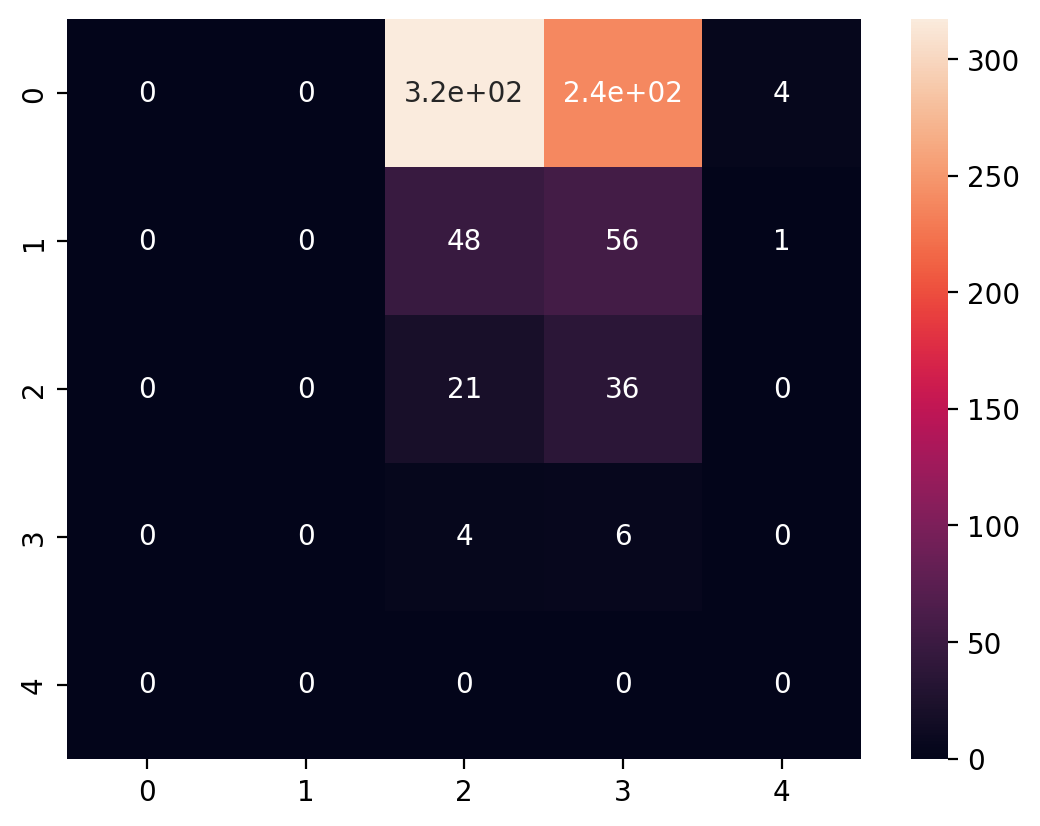

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)

####VGG16

In [ ]:
vgg16=tf.keras.applications.VGG16(                                       
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3))

for layer in vgg16.layers[:-4]:                                                       
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(TimeDistributed(vgg16, input_shape=(1, 224, 224, 3)))     

model.add(TimeDistributed(Flatten()))
model.add(LSTM (256, activation='relu', return_sequences=False))
model.add(Dense (64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error', metrics=tf.keras.metrics.RootMeanSquaredError())
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_12 (TimeDi  (None, 1, 7, 7, 512)     14714688  
 stributed)                                                      
                                                                 
 time_distributed_13 (TimeDi  (None, 1, 25088)         0         
 stributed)                                                      
                                                                 
 lstm_6 (LSTM)               (None, 256)               25953280  
                                                                 
 dense_12 (Dense)            (None, 64)                16448     
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                

In [ ]:
#fit the model
model.fit(X_train_copy, y_train, validation_data = (X_val_copy, y_val), epochs = 50, batch_size=16)

Epoch 1/50
90/90 [==============================] - 6s 24ms/step - loss: 2.3436 - root_mean_squared_error: 1.5309 - val_loss: 0.3712 - val_root_mean_squared_error: 0.6093
Epoch 2/50
90/90 [==============================] - 1s 16ms/step - loss: 1.0353 - root_mean_squared_error: 1.0175 - val_loss: 0.3882 - val_root_mean_squared_error: 0.6230
Epoch 3/50
90/90 [==============================] - 1s 16ms/step - loss: 1.0043 - root_mean_squared_error: 1.0022 - val_loss: 0.3169 - val_root_mean_squared_error: 0.5629
Epoch 4/50
90/90 [==============================] - 1s 16ms/step - loss: 2.1815 - root_mean_squared_error: 1.4770 - val_loss: 0.3360 - val_root_mean_squared_error: 0.5796
Epoch 5/50
90/90 [==============================] - 1s 16ms/step - loss: 1.2360 - root_mean_squared_error: 1.1118 - val_loss: 0.5190 - val_root_mean_squared_error: 0.7204
Epoch 6/50
90/90 [==============================] - 1s 16ms/step - loss: 0.8958 - root_mean_squared_error: 0.9465 - val_loss: 0.3183 - val_root_m

In [ ]:
#predict using the model
test_prediction = model.predict(X_test_copy).flatten()
test_results = pd.DataFrame(data={'predictions':test_prediction, 'actuals':y_test})
test_results

23/23 [==============================] - 1s 22ms/step


predictions  actuals
0       2.456908      3.0
1       2.650589      3.0
2       3.194084      3.0
3       3.094254      3.0
4       2.903425      3.0
..           ...      ...
726     3.090978      2.0
727     3.357361      2.0
728     3.241972      2.0
729     2.427061      2.0
730     3.243418      2.0

[731 rows x 2 columns]

In [ ]:
test_results.predictions[test_results.predictions <0.5] = 0
test_results.predictions[(test_results.predictions >=0.5)&(test_results.predictions<1.5)] = 1
test_results.predictions[(test_results.predictions >=1.5)&(test_results.predictions<2.5)] = 2
test_results.predictions[(test_results.predictions >=2.5)&(test_results.predictions<3.5)] = 3
test_results.predictions[(test_results.predictions >=3.5)&(test_results.predictions<4.5)] = 4
test_results.predictions[(test_results.predictions >=4.5)&(test_results.predictions<5.5)] = 5
test_results

predictions  actuals
0            2.0      3.0
1            3.0      3.0
2            3.0      3.0
3            3.0      3.0
4            3.0      3.0
..           ...      ...
726          3.0      2.0
727          3.0      2.0
728          3.0      2.0
729          2.0      2.0
730          3.0      2.0

[731 rows x 2 columns]

In [ ]:
test_results.actuals[test_results.actuals <0.5] = 0
test_results.actuals[(test_results.actuals >=0.5)&(test_results.actuals<1.5)] = 1
test_results.actuals[(test_results.actuals >=1.5)&(test_results.actuals<2.5)] = 2
test_results.actuals[(test_results.actuals >=2.5)&(test_results.actuals<3.5)] = 3
test_results.actuals[(test_results.actuals >=3.5)&(test_results.actuals<4.5)] = 4
test_results.actuals[(test_results.actuals >=4.5)&(test_results.actuals<5.5)] = 5
test_results

predictions  actuals
0            2.0      3.0
1            3.0      3.0
2            3.0      3.0
3            3.0      3.0
4            3.0      3.0
..           ...      ...
726          3.0      2.0
727          3.0      2.0
728          3.0      2.0
729          2.0      2.0
730          3.0      2.0

[731 rows x 2 columns]

In [ ]:
print(classification_report(test_results['actuals'], test_results['predictions']))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       559
         1.0       0.00      0.00      0.00       105
         2.0       0.04      0.23      0.07        57
         3.0       0.02      0.80      0.04        10
         4.0       0.00      0.00      0.00         0

    accuracy                           0.03       731
   macro avg       0.01      0.21      0.02       731
weighted avg       0.00      0.03      0.01       731



<Axes: >

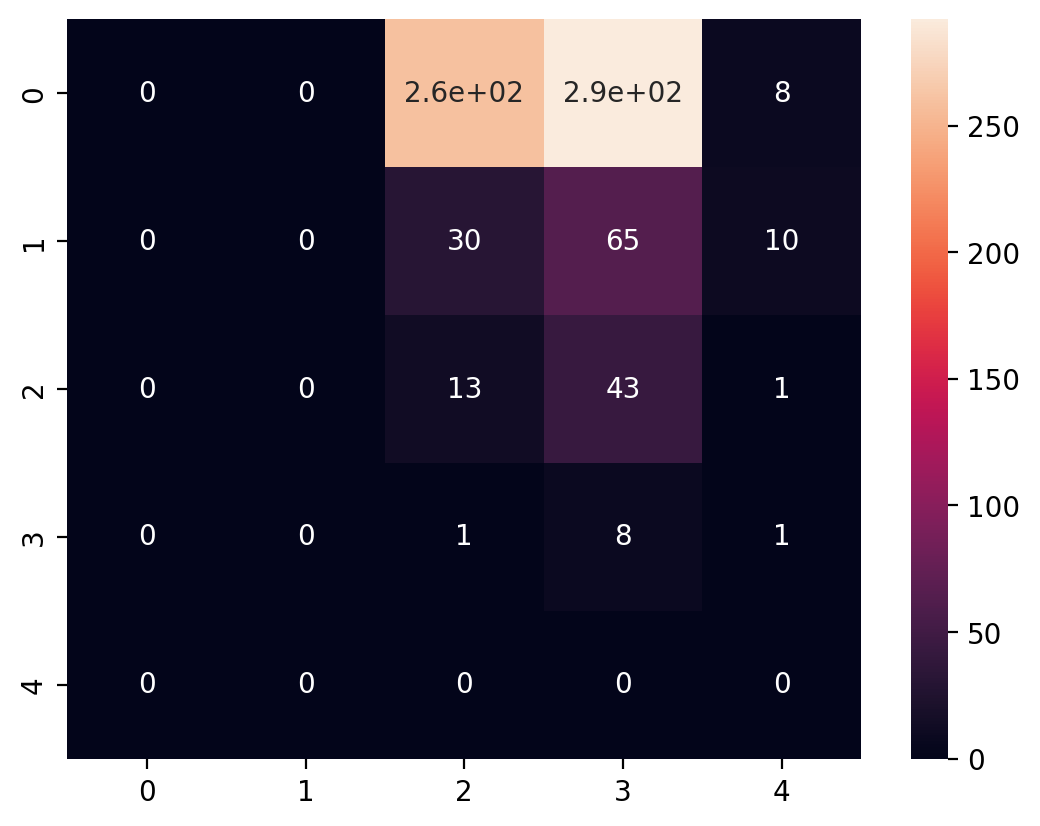

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_results['actuals'], test_results['predictions']))

sns.heatmap(confusion_matrix_df, annot=True)